**PAMPA2-HAR dataset**
---

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
# Define the paths to your datasets in Google Drive
import numpy as np
df= pd.read_csv("/content/drive/My Drive/Early Drift Detection/pamap2_final.csv")
df

Mounted at /content/drive


Unnamed: 0  accelerometer_x  accelerometer_y  accelerometer_z  \
0               49         2.021410          9.35812          3.04082   
1               50         2.058940          9.31989          3.04151   
2               51         2.056530          9.16780          3.00350   
3               52         2.130510          9.12894          2.96625   
4               53         2.056530          9.16780          3.00350   
...            ...              ...              ...              ...   
746350      876674         0.489770          2.82383          9.23639   
746351      876675         0.370253          2.70955          9.08103   
746352      876676         0.644139          2.70986          9.35454   
746353      876677         0.566153          2.74771          9.27627   
746354      876678         0.492452          2.44578          9.39165   

        gyroscope_x  gyroscope_y  gyroscope_z  activity  accelerometer_x_mean  \
0          0.431367    -0.015620    -0.035577         2              2.149858   
1          0.338133    -0.016064     0.007478         2              2.148545   
2          0.304415    -0.051594     0.014247         2              2.142910   
3          0.267546    -0.024152    -0.027965         2              2.140975   
4          0.254874     0.011192    -0.042030         2              2.138305   
...             ...          ...          ...       ...                   ...   
746350    -0.017195     0.006944     0.007758         4              0.555574   
746351    -0.032333    -0.044224     0.011758         4              0.547796   
746352    -0.004483    -0.001148     0.039415         4              0.545582   
746353    -0.022839     0.045628     0.049042         4              0.545481   
746354    -0.007376     0.002379     0.017766         4              0.545604   

        accelerometer_x_std  ...  gyroscope_y_mad  gyroscope_y_max  \
0                  0.125227  ...         0.031028         0.065358   
1                  0.125828  ...         0.028083         0.065358   
2                  0.123493  ...         0.028870         0.065358   
3                  0.122912  ...         0.028597         0.065358   
4                  0.123267  ...         0.029001         0.065358   
...                     ...  ...              ...              ...   
746350             0.179076  ...         0.020872         0.098473   
746351             0.178511  ...         0.020872         0.098473   
746352             0.176606  ...         0.020872         0.098473   
746353             0.176592  ...         0.020872         0.098473   
746354             0.176553  ...         0.020872         0.098473   

        gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  gyroscope_z_std  \
0             -0.068942         1.547971         -0.009330         0.030435   
1             -0.068942         1.539219         -0.008860         0.030509   
2             -0.068942         1.579466         -0.008765         0.030574   
3             -0.068942         1.586518         -0.009189         0.030690   
4             -0.068942         1.590529         -0.010143         0.030953   
...                 ...              ...               ...              ...   
746350        -0.038071         1.524133          0.010320         0.029036   
746351        -0.044224         1.565673          0.011493         0.027862   
746352        -0.044224         1.560528          0.012877         0.027494   
746353        -0.044224         1.575995          0.014334         0.027442   
746354        -0.044224         1.568896          0.015244         0.026777   

        gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  gyroscope_z_sma  
0              0.017855         0.056646        -0.081657         1.185657  
1              0.015752         0.056646        -0.081657         1.177122  
2              0.016262         0.056646        -0.081657         1.181885  
3              0.017087         0.056646        -0.081657   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# Step 1: Normalize activity labels to 0-based classes
unique_labels = sorted(df['activity'].unique())
label_map = {label: i for i, label in enumerate(unique_labels)}
df['activity'] = df['activity'].map(label_map)

# Step 2: Select features and target
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']
target = 'activity'

# Step 3: Train-test split
X = df[features].values
y = df[target].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#joblib.dump(scaler, '/content/drive/My Drive/Early Drift Detection/scaler.pkl')

# Reshape for CNN: (samples, time_steps=6, channels=1)
X = X.reshape(-1, len(features), 1)

# One-hot encode target
num_classes = len(unique_labels)
y_cat = to_categorical(y, num_classes)

#joblib.dump(label_encoder, 'label_encoder.pkl')
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# Step 4: Build CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(len(features), 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train
model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=64)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
7464/7464 ━━━━━━━━━━━━━━━━━━━━ 103s 14ms/step - accuracy: 0.9052 - loss: 0.3075 - val_accuracy: 0.9469 - val_loss: 0.1528
Epoch 2/3
7464/7464 ━━━━━━━━━━━━━━━━━━━━ 135s 13ms/step - accuracy: 0.9428 - loss: 0.1688 - val_accuracy: 0.9607 - val_loss: 0.1070
Epoch 3/3
7464/7464 ━━━━━━━━━━━━━━━━━━━━ 134s 12ms/step - accuracy: 0.9526 - loss: 0.1306 - val_accuracy: 0.9679 - val_loss: 0.0838


In [ ]:
X_test.shape

(149271, 42, 1)

In [ ]:
X_test = X_test.reshape(-1, len(features))
X_test

array([[ 0.63227286,  0.11316655,  1.07063848, ..., -0.16677234,
         0.13756265, -0.33259813],
       [ 0.1025947 ,  0.20419797, -0.44861997, ...,  0.33457356,
        -0.74239442,  0.38400535],
       [-0.59020824, -0.17956834, -0.28744394, ..., -0.48071543,
         0.62129132, -0.56368103],
       ...,
       [-0.59183273, -0.66928049, -0.45963464, ..., -0.63763567,
         0.52879418, -0.64318012],
       [ 1.24180469, -0.17839752,  1.40696121, ..., -0.60799207,
         0.56918225, -0.68923146],
       [-1.00567152, -0.93548008, -2.89176563, ...,  1.36231238,
        -1.1918308 ,  0.79627387]])

In [ ]:
y_test

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
import pandas as pd
import numpy as np

# Your array (example: X)
# X = np.array([...])  # already exists in your case

# Column names
columns = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
           'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
           'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
           'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
           'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
           'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
           'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
           'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
           'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
           'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
           'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
           'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
           'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
           'gyroscope_z_min', 'gyroscope_z_sma']

# Convert to DataFrame
X_test = pd.DataFrame(X_test, columns=columns)
X_test

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0              0.632273         0.113167         1.070638     0.068443   
1              0.102595         0.204198        -0.448620     0.754935   
2             -0.590208        -0.179568        -0.287444    -0.046240   
3              0.767089         0.447318         0.762271    -0.004866   
4              0.722482         1.167935         1.911720     1.441861   
...                 ...              ...              ...          ...   
149266         1.230003        -0.214883         1.458489    -0.094311   
149267        -0.767501        -0.522236         0.391282     0.217969   
149268        -0.591833        -0.669280        -0.459635    -0.095525   
149269         1.241805        -0.178398         1.406961    -0.050406   
149270        -1.005672        -0.935480        -2.891766     7.674320   

        gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0          0.039268     0.043322              1.050819            -0.354403   
1         -0.415463    -0.321437             -0.616925             0.158008   
2          0.014415     0.208760             -0.800506            -0.572780   
3         -0.027680     0.063454              1.085591            -0.614619   
4         -0.800401    -1.123865             -0.381495             0.273547   
...             ...          ...                   ...                  ...   
149266    -0.078026     0.034909              1.716107            -0.592499   
149267    -0.156153     0.009096             -0.750409            -0.047186   
149268    -0.005855     0.023626             -0.842558            -0.614970   
149269    -0.046511     0.038002              1.740258            -0.618015   
149270    -2.543810     2.334851             -1.536449            -0.180590   

        accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_mad  \
0                 -0.250459             0.411127  ...         0.054686   
1                  0.474052            -0.469792  ...        -0.121992   
2                 -0.572016            -1.100826  ...        -0.558631   
3                 -0.606898             0.182246  ...        -0.599129   
4                  0.278313             0.321368  ...         0.734039   
...                     ...                  ...  ...              ...   
149266            -0.588989             0.653644  ...        -0.572651   
149267             0.017436            -0.558365  ...         0.005041   
149268            -0.615664            -1.153700  ...        -0.600377   
149269            -0.621808             0.646729  ...        -0.596477   
149270            -0.072982            -1.189556  ...         1.848803   

        gyroscope_y_max  gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  \
0             -0.247389         0.170432        -0.202567          0.076388   
1             -0.200906         0.351205        -0.371879         -1.098341   
2             -0.583859         0.586431        -0.653617          0.166852   
3             -0.596209         0.632900        -0.691789         -0.015456   
4              0.526735        -0.200200         0.445321          0.703966   
...                 ...              ...              ...               ...   
149266        -0.655693         0.526771        -0.572281         -0.058183   
149267        -0.222377        -0.345906        -0.230263          0.071687   
149268        -0.595046         0.632087        -0.688911         -0.097199   
149269        -0.583032         0.679355        -0.681116         -0.001979   
149270         0.983851        -1.907950         1.096070          0.508788   

        gyroscope_z_std  gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  \
0             -0.188675        -0.174203        -0.166772         0.137563   
1              0.433458         0.273789         0.334574        -0.742394   
2             -0.603367        -0.558113        -0.480715         0.621291   
3             -0.615

In [ ]:
X_test

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0              0.632273         0.113167         1.070638     0.068443   
1              0.102595         0.204198        -0.448620     0.754935   
2             -0.590208        -0.179568        -0.287444    -0.046240   
3              0.767089         0.447318         0.762271    -0.004866   
4              0.722482         1.167935         1.911720     1.441861   
...                 ...              ...              ...          ...   
149266         1.230003        -0.214883         1.458489    -0.094311   
149267        -0.767501        -0.522236         0.391282     0.217969   
149268        -0.591833        -0.669280        -0.459635    -0.095525   
149269         1.241805        -0.178398         1.406961    -0.050406   
149270        -1.005672        -0.935480        -2.891766     7.674320   

        gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0          0.039268     0.043322              1.050819            -0.354403   
1         -0.415463    -0.321437             -0.616925             0.158008   
2          0.014415     0.208760             -0.800506            -0.572780   
3         -0.027680     0.063454              1.085591            -0.614619   
4         -0.800401    -1.123865             -0.381495             0.273547   
...             ...          ...                   ...                  ...   
149266    -0.078026     0.034909              1.716107            -0.592499   
149267    -0.156153     0.009096             -0.750409            -0.047186   
149268    -0.005855     0.023626             -0.842558            -0.614970   
149269    -0.046511     0.038002              1.740258            -0.618015   
149270    -2.543810     2.334851             -1.536449            -0.180590   

        accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_mad  \
0                 -0.250459             0.411127  ...         0.054686   
1                  0.474052            -0.469792  ...        -0.121992   
2                 -0.572016            -1.100826  ...        -0.558631   
3                 -0.606898             0.182246  ...        -0.599129   
4                  0.278313             0.321368  ...         0.734039   
...                     ...                  ...  ...              ...   
149266            -0.588989             0.653644  ...        -0.572651   
149267             0.017436            -0.558365  ...         0.005041   
149268            -0.615664            -1.153700  ...        -0.600377   
149269            -0.621808             0.646729  ...        -0.596477   
149270            -0.072982            -1.189556  ...         1.848803   

        gyroscope_y_max  gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  \
0             -0.247389         0.170432        -0.202567          0.076388   
1             -0.200906         0.351205        -0.371879         -1.098341   
2             -0.583859         0.586431        -0.653617          0.166852   
3             -0.596209         0.632900        -0.691789         -0.015456   
4              0.526735        -0.200200         0.445321          0.703966   
...                 ...              ...              ...               ...   
149266        -0.655693         0.526771        -0.572281         -0.058183   
149267        -0.222377        -0.345906        -0.230263          0.071687   
149268        -0.595046         0.632087        -0.688911         -0.097199   
149269        -0.583032         0.679355        -0.681116         -0.001979   
149270         0.983851        -1.907950         1.096070          0.508788   

        gyroscope_z_std  gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  \
0             -0.188675        -0.174203        -0.166772         0.137563   
1              0.433458         0.273789         0.334574        -0.742394   
2             -0.603367        -0.558113        -0.480715         0.621291   
3             -0.615

Dataset Type	        Description	Purpose

*   Original Dataset (O)	Original HAR dataset	Baseline signature (PAMAP)
*   Pseudo Change (P)	   Slight change in statistical signature but no new activitie (mhealth)
*   Real Change (R)	      Inject new activities or alter class distributions(UCI)
*   Hidden Change (H)	 Signature stays the same, but some activities silently altered

**Psedo drif Ground Truth**
---

In [ ]:
import numpy as np
import pandas as pd
# Step 1: Reload original data
XTest = X_test.copy()
activity_labels = np.argmax(y_test, axis=1)
# Add to XTest DataFrame
XTest['activity'] = activity_labels

In [ ]:
XTest

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0              0.632273         0.113167         1.070638     0.068443   
1              0.102595         0.204198        -0.448620     0.754935   
2             -0.590208        -0.179568        -0.287444    -0.046240   
3              0.767089         0.447318         0.762271    -0.004866   
4              0.722482         1.167935         1.911720     1.441861   
...                 ...              ...              ...          ...   
149266         1.230003        -0.214883         1.458489    -0.094311   
149267        -0.767501        -0.522236         0.391282     0.217969   
149268        -0.591833        -0.669280        -0.459635    -0.095525   
149269         1.241805        -0.178398         1.406961    -0.050406   
149270        -1.005672        -0.935480        -2.891766     7.674320   

        gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0          0.039268     0.043322              1.050819            -0.354403   
1         -0.415463    -0.321437             -0.616925             0.158008   
2          0.014415     0.208760             -0.800506            -0.572780   
3         -0.027680     0.063454              1.085591            -0.614619   
4         -0.800401    -1.123865             -0.381495             0.273547   
...             ...          ...                   ...                  ...   
149266    -0.078026     0.034909              1.716107            -0.592499   
149267    -0.156153     0.009096             -0.750409            -0.047186   
149268    -0.005855     0.023626             -0.842558            -0.614970   
149269    -0.046511     0.038002              1.740258            -0.618015   
149270    -2.543810     2.334851             -1.536449            -0.180590   

        accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_max  \
0                 -0.250459             0.411127  ...        -0.247389   
1                  0.474052            -0.469792  ...        -0.200906   
2                 -0.572016            -1.100826  ...        -0.583859   
3                 -0.606898             0.182246  ...        -0.596209   
4                  0.278313             0.321368  ...         0.526735   
...                     ...                  ...  ...              ...   
149266            -0.588989             0.653644  ...        -0.655693   
149267             0.017436            -0.558365  ...        -0.222377   
149268            -0.615664            -1.153700  ...        -0.595046   
149269            -0.621808             0.646729  ...        -0.583032   
149270            -0.072982            -1.189556  ...         0.983851   

        gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  gyroscope_z_std  \
0              0.170432        -0.202567          0.076388        -0.188675   
1              0.351205        -0.371879         -1.098341         0.433458   
2              0.586431        -0.653617          0.166852        -0.603367   
3              0.632900        -0.691789         -0.015456        -0.615845   
4             -0.200200         0.445321          0.703966         1.616209   
...                 ...              ...               ...              ...   
149266         0.526771        -0.572281         -0.058183        -0.605220   
149267        -0.345906        -0.230263          0.071687        -0.522865   
149268         0.632087        -0.688911         -0.097199        -0.612485   
149269         0.679355        -0.681116         -0.001979        -0.622393   
149270        -1.907950         1.096070          0.508788         1.128215   

        gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  gyroscope_z_sma  \
0             -0.174203        -0.166772         0.137563        -0.332598   
1              0.273789         0.334574        -0.742394         0.384005   
2             -0.558113        -0.480715         0.621291        -0.563681   
3             -0.563

In [ ]:
import numpy as np
import pandas as pd

# Step 2: Expand XTest to make it 4x larger → XTestUpdated
XTestUpdated = pd.concat([XTest] * 10, ignore_index=True)

# Step 3: Add a new 'drift_type' column, default as 'normal'
XTestUpdated['drift_type'] = 'normal'

# Step 4: Identify numeric columns (exclude 'activity' and 'drift_type')
exclude_cols = {'activity', 'drift_type'}
numeric_cols = [col for col in XTestUpdated.select_dtypes(include=[np.number]).columns if col not in exclude_cols]

# Step 5: Create 50 pseudo drift segments (each 3000 rows), randomly placed
segment_size = 3000
total_rows = len(XTestUpdated)
max_start_index = total_rows - segment_size

np.random.seed(42)  # For reproducibility
pseudo_blocks = set()
while len(pseudo_blocks) < 400:
    start = np.random.randint(0, max_start_index)
    pseudo_blocks.add(start)

# Step 6: Apply Gaussian noise to pseudo drift segments (excluding activity)
for start in pseudo_blocks:
    end = start + segment_size
    noise = np.random.normal(loc=0, scale=3.0, size=(segment_size, len(numeric_cols)))
    XTestUpdated.iloc[start:end, XTestUpdated.columns.get_indexer(numeric_cols)] += noise
    XTestUpdated.iloc[start:end, XTestUpdated.columns.get_loc('drift_type')] = 'pseudo'

# Step 7: Drift distribution summary
drift_distribution = XTestUpdated['drift_type'].value_counts()
print("Drift Distribution:\n", drift_distribution)

Drift Distribution:
 drift_type
pseudo    814905
normal    677805
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd

# Step 1: Expand XTest to make it 5x larger → XTestUpdated
XTestUpdated = pd.concat([XTest] * 10, ignore_index=True)

# Step 2: Add a new 'drift_type' column, default as 'normal'
XTestUpdated['drift_type'] = 'normal'

# Step 3: Identify numeric columns (excluding 'activity' and 'drift_type')
exclude_cols = {'activity', 'drift_type'}
numeric_cols = [col for col in XTestUpdated.select_dtypes(include=[np.number]).columns if col not in exclude_cols]

# Step 4: Generate random positions for pseudo drift segments
segment_size = 3000
total_rows = len(XTestUpdated)
max_start_index = total_rows - segment_size

np.random.seed(42)  # Reproducibility

# 100 pseudo drift blocks
pseudo_blocks = set()
while len(pseudo_blocks) < 500:
    start = np.random.randint(0, max_start_index)
    pseudo_blocks.add(start)

# Apply Gaussian noise (pseudo)
for start in pseudo_blocks:
    end = start + segment_size
    noise = np.random.normal(loc=0, scale=3.0, size=(segment_size, len(numeric_cols)))
    XTestUpdated.iloc[start:end, XTestUpdated.columns.get_indexer(numeric_cols)] += noise
    XTestUpdated.iloc[start:end, XTestUpdated.columns.get_loc('drift_type')] = 'pseudo'

# Step 5: Add 10 highly similar "identical" segments
identical_blocks = set()
base_segment = XTestUpdated.sample(n=segment_size, random_state=1)[numeric_cols].reset_index(drop=True)

while len(identical_blocks) < 10:
    start = np.random.randint(0, max_start_index)
    if all(start not in b for b in [pseudo_blocks, identical_blocks]):
        end = start + segment_size
        XTestUpdated.loc[start:end-1, numeric_cols] = base_segment.values
        XTestUpdated.iloc[start:end, XTestUpdated.columns.get_loc('drift_type')] = 'identical'
        identical_blocks.add(start)

# Step 6: Add 10 "opposite" segments (e.g., multiply by -1 and scale)
opposite_blocks = set()
while len(opposite_blocks) < 10:
    start = np.random.randint(0, max_start_index)
    if all(start not in b for b in [pseudo_blocks, identical_blocks, opposite_blocks]):
        end = start + segment_size
        original_values = XTestUpdated.loc[start:end-1, numeric_cols].values
        inverted_values = -1.5 * original_values + np.random.normal(loc=0, scale=0.5, size=original_values.shape)
        XTestUpdated.loc[start:end-1, numeric_cols] = inverted_values
        XTestUpdated.iloc[start:end, XTestUpdated.columns.get_loc('drift_type')] = 'opposite'
        opposite_blocks.add(start)

# Step 7: Print drift distribution summary
drift_distribution = XTestUpdated['drift_type'].value_counts()
print("✅ Drift Distribution:\n", drift_distribution)

✅ Drift Distribution:
 drift_type
pseudo       900580
normal       532875
identical     30000
opposite      29255
Name: count, dtype: int64


In [ ]:
df_modified=XTestUpdated
df_modified

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0               0.632273         0.113167         1.070638     0.068443   
1               0.102595         0.204198        -0.448620     0.754935   
2              -0.590208        -0.179568        -0.287444    -0.046240   
3               0.767089         0.447318         0.762271    -0.004866   
4               0.722482         1.167935         1.911720     1.441861   
...                  ...              ...              ...          ...   
1492705         1.230003        -0.214883         1.458489    -0.094311   
1492706        -0.767501        -0.522236         0.391282     0.217969   
1492707        -0.591833        -0.669280        -0.459635    -0.095525   
1492708         1.241805        -0.178398         1.406961    -0.050406   
1492709        -1.005672        -0.935480        -2.891766     7.674320   

         gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0           0.039268     0.043322              1.050819            -0.354403   
1          -0.415463    -0.321437             -0.616925             0.158008   
2           0.014415     0.208760             -0.800506            -0.572780   
3          -0.027680     0.063454              1.085591            -0.614619   
4          -0.800401    -1.123865             -0.381495             0.273547   
...              ...          ...                   ...                  ...   
1492705    -0.078026     0.034909              1.716107            -0.592499   
1492706    -0.156153     0.009096             -0.750409            -0.047186   
1492707    -0.005855     0.023626             -0.842558            -0.614970   
1492708    -0.046511     0.038002              1.740258            -0.618015   
1492709    -2.543810     2.334851             -1.536449            -0.180590   

         accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_min  \
0                  -0.250459             0.411127  ...         0.170432   
1                   0.474052            -0.469792  ...         0.351205   
2                  -0.572016            -1.100826  ...         0.586431   
3                  -0.606898             0.182246  ...         0.632900   
4                   0.278313             0.321368  ...        -0.200200   
...                      ...                  ...  ...              ...   
1492705            -0.588989             0.653644  ...         0.526771   
1492706             0.017436            -0.558365  ...        -0.345906   
1492707            -0.615664            -1.153700  ...         0.632087   
1492708            -0.621808             0.646729  ...         0.679355   
1492709            -0.072982            -1.189556  ...        -1.907950   

         gyroscope_y_sma  gyroscope_z_mean  gyroscope_z_std  gyroscope_z_mad  \
0              -0.202567          0.076388        -0.188675        -0.174203   
1              -0.371879         -1.098341         0.433458         0.273789   
2              -0.653617          0.166852        -0.603367        -0.558113   
3              -0.691789         -0.015456        -0.615845        -0.563926   
4               0.445321          0.703966         1.616209         1.783383   
...                  ...               ...              ...              ...   
1492705        -0.572281         -0.058183        -0.605220        -0.558868   
1492706        -0.230263          0.071687        -0.522865        -0.495597   
1492707        -0.688911         -0.097199        -0.612485        -0.558345   
1492708        -0.681116         -0.001979        -0.622393        -0.572291   
1492709         1.096070          0.508788         1.128215         1.406762   

         gyroscope_z_max  gyroscope_z_min  gyroscope_z_sma  activity  \
0              -0.166772         0.137563        -0.332598         2   
1               0.334574        -0.742394         0.384005         0   
2              -0.480715         0.621291        -0.563681         1 

In [ ]:
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']
target = 'activity'

# Step 3: Train-test split
X = df_modified[features].values
y= df_modified[target].values

# Normalize features
X = scaler.fit_transform(X)
#joblib.dump(scaler, '/content/drive/My Drive/Early Drift Detection/scaler.pkl')
# Reshape for CNN: (samples, time_steps=6, channels=1)
X = X.reshape(-1, len(features), 1)
# One-hot encode target
#num_classes = len(unique_labels)
#y_cat = to_categorical(y, num_classes)

In [ ]:
y = y.reshape(-1, 1)
y_categorical = to_categorical(y, num_classes=5)

In [ ]:
loss, accuracy = model.evaluate(X, y_categorical)
print(f"Test Accuracy: {accuracy:.4f}")

46648/46648 ━━━━━━━━━━━━━━━━━━━━ 174s 4ms/step - accuracy: 0.4173 - loss: 6.0727
Test Accuracy: 0.4237


In [ ]:
X_test

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0              0.632273         0.113167         1.070638     0.068443   
1              0.102595         0.204198        -0.448620     0.754935   
2             -0.590208        -0.179568        -0.287444    -0.046240   
3              0.767089         0.447318         0.762271    -0.004866   
4              0.722482         1.167935         1.911720     1.441861   
...                 ...              ...              ...          ...   
149266         1.230003        -0.214883         1.458489    -0.094311   
149267        -0.767501        -0.522236         0.391282     0.217969   
149268        -0.591833        -0.669280        -0.459635    -0.095525   
149269         1.241805        -0.178398         1.406961    -0.050406   
149270        -1.005672        -0.935480        -2.891766     7.674320   

        gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0          0.039268     0.043322              1.050819            -0.354403   
1         -0.415463    -0.321437             -0.616925             0.158008   
2          0.014415     0.208760             -0.800506            -0.572780   
3         -0.027680     0.063454              1.085591            -0.614619   
4         -0.800401    -1.123865             -0.381495             0.273547   
...             ...          ...                   ...                  ...   
149266    -0.078026     0.034909              1.716107            -0.592499   
149267    -0.156153     0.009096             -0.750409            -0.047186   
149268    -0.005855     0.023626             -0.842558            -0.614970   
149269    -0.046511     0.038002              1.740258            -0.618015   
149270    -2.543810     2.334851             -1.536449            -0.180590   

        accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_mad  \
0                 -0.250459             0.411127  ...         0.054686   
1                  0.474052            -0.469792  ...        -0.121992   
2                 -0.572016            -1.100826  ...        -0.558631   
3                 -0.606898             0.182246  ...        -0.599129   
4                  0.278313             0.321368  ...         0.734039   
...                     ...                  ...  ...              ...   
149266            -0.588989             0.653644  ...        -0.572651   
149267             0.017436            -0.558365  ...         0.005041   
149268            -0.615664            -1.153700  ...        -0.600377   
149269            -0.621808             0.646729  ...        -0.596477   
149270            -0.072982            -1.189556  ...         1.848803   

        gyroscope_y_max  gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  \
0             -0.247389         0.170432        -0.202567          0.076388   
1             -0.200906         0.351205        -0.371879         -1.098341   
2             -0.583859         0.586431        -0.653617          0.166852   
3             -0.596209         0.632900        -0.691789         -0.015456   
4              0.526735        -0.200200         0.445321          0.703966   
...                 ...              ...              ...               ...   
149266        -0.655693         0.526771        -0.572281         -0.058183   
149267        -0.222377        -0.345906        -0.230263          0.071687   
149268        -0.595046         0.632087        -0.688911         -0.097199   
149269        -0.583032         0.679355        -0.681116         -0.001979   
149270         0.983851        -1.907950         1.096070          0.508788   

        gyroscope_z_std  gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  \
0             -0.188675        -0.174203        -0.166772         0.137563   
1              0.433458         0.273789         0.334574        -0.742394   
2             -0.603367        -0.558113        -0.480715         0.621291   
3             -0.615

In [ ]:
df_modified

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0               0.632273         0.113167         1.070638     0.068443   
1               0.102595         0.204198        -0.448620     0.754935   
2              -0.590208        -0.179568        -0.287444    -0.046240   
3               0.767089         0.447318         0.762271    -0.004866   
4               0.722482         1.167935         1.911720     1.441861   
...                  ...              ...              ...          ...   
1492705         1.230003        -0.214883         1.458489    -0.094311   
1492706        -0.767501        -0.522236         0.391282     0.217969   
1492707        -0.591833        -0.669280        -0.459635    -0.095525   
1492708         1.241805        -0.178398         1.406961    -0.050406   
1492709        -1.005672        -0.935480        -2.891766     7.674320   

         gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0           0.039268     0.043322              1.050819            -0.354403   
1          -0.415463    -0.321437             -0.616925             0.158008   
2           0.014415     0.208760             -0.800506            -0.572780   
3          -0.027680     0.063454              1.085591            -0.614619   
4          -0.800401    -1.123865             -0.381495             0.273547   
...              ...          ...                   ...                  ...   
1492705    -0.078026     0.034909              1.716107            -0.592499   
1492706    -0.156153     0.009096             -0.750409            -0.047186   
1492707    -0.005855     0.023626             -0.842558            -0.614970   
1492708    -0.046511     0.038002              1.740258            -0.618015   
1492709    -2.543810     2.334851             -1.536449            -0.180590   

         accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_min  \
0                  -0.250459             0.411127  ...         0.170432   
1                   0.474052            -0.469792  ...         0.351205   
2                  -0.572016            -1.100826  ...         0.586431   
3                  -0.606898             0.182246  ...         0.632900   
4                   0.278313             0.321368  ...        -0.200200   
...                      ...                  ...  ...              ...   
1492705            -0.588989             0.653644  ...         0.526771   
1492706             0.017436            -0.558365  ...        -0.345906   
1492707            -0.615664            -1.153700  ...         0.632087   
1492708            -0.621808             0.646729  ...         0.679355   
1492709            -0.072982            -1.189556  ...        -1.907950   

         gyroscope_y_sma  gyroscope_z_mean  gyroscope_z_std  gyroscope_z_mad  \
0              -0.202567          0.076388        -0.188675        -0.174203   
1              -0.371879         -1.098341         0.433458         0.273789   
2              -0.653617          0.166852        -0.603367        -0.558113   
3              -0.691789         -0.015456        -0.615845        -0.563926   
4               0.445321          0.703966         1.616209         1.783383   
...                  ...               ...              ...              ...   
1492705        -0.572281         -0.058183        -0.605220        -0.558868   
1492706        -0.230263          0.071687        -0.522865        -0.495597   
1492707        -0.688911         -0.097199        -0.612485        -0.558345   
1492708        -0.681116         -0.001979        -0.622393        -0.572291   
1492709         1.096070          0.508788         1.128215         1.406762   

         gyroscope_z_max  gyroscope_z_min  gyroscope_z_sma  activity  \
0              -0.166772         0.137563        -0.332598         2   
1               0.334574        -0.742394         0.384005         0   
2              -0.480715         0.621291        -0.563681         1 

dont run

In [ ]:
activity_labels = np.argmax(y_test, axis=1)
# Add to XTest DataFrame
X_test['activity'] = activity_labels

In [ ]:
X_test.columns

Index(['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma', 'drift_type', 'activity'],
      dtype

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy, skew, kurtosis

df =df_modified  # Your input DataFrame
# Function to compute the signature of one segment  ── unchanged ──
def compute_signature(segment):
    signature = {}
    exclude_cols = {'drift_type', 'activity'}
    feature_cols = [col for col in segment.columns if col.lower() not in exclude_cols]

    for col in feature_cols:
        x = segment[col].values

        # Skip non-numeric columns
        try:
            x = x.astype(float)
        except ValueError:
            continue

        if np.isnan(x).all():
            signature[f'{col}_mean'] = np.nan
            signature[f'{col}_var'] = np.nan
            signature[f'{col}_entropy'] = np.nan
            signature[f'{col}_skew'] = np.nan
            signature[f'{col}_kurt'] = np.nan
            continue

        clean_x = x[~np.isnan(x)]
        hist, _ = np.histogram(clean_x, bins=10, density=True)
        hist += 1e-12
        H = entropy(hist, base=2)

        signature[f'{col}_mean'] = np.nanmean(x)
        signature[f'{col}_var'] = np.nanvar(x)
        signature[f'{col}_entropy'] = H
        signature[f'{col}_skew'] = skew(clean_x)
        signature[f'{col}_kurt'] = kurtosis(clean_x)

    return signature

# Parameters
chunk_size = 3000
signatures = []
chunk_frames = []

chunk_dfs = {}  # New: Dictionary to hold individual chunk DataFrames
chunk_counter = 1

# No grouping by activity — flat segmentation
df = df.reset_index(drop=True)
for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i + chunk_size]
    if len(chunk) < chunk_size:
        continue  # skip incomplete chunks

    segment_id = f"chunk_{chunk_counter}"

    # Add Segment_ID column for tracking
    chunk = chunk.copy()
    chunk["Segment_ID"] = segment_id
    chunk_frames.append(chunk)

    # Store chunk as separate df: chunk_df1, chunk_df2, ...
    chunk_dfs[f"chunk_df{chunk_counter}"] = chunk.copy()

    # Compute and store signature
    sig = compute_signature(chunk)
    sig["Segment_ID"] = segment_id
    signatures.append(sig)

    chunk_counter += 1

# Final signature DataFrame
signature_df = pd.DataFrame(signatures).set_index("Segment_ID")

# All chunks combined
chunks_df = pd.concat(chunk_frames, ignore_index=True)

# Dynamically create chunk_df1, chunk_df2, ...
globals().update(chunk_dfs)

In [ ]:
signature_df

accelerometer_x_mean  accelerometer_x_var  \
Segment_ID                                              
chunk_1                -0.054702             1.498510   
chunk_2                 0.105196            17.577759   
chunk_3                -0.045666             1.224162   
chunk_4                -0.011102             8.766291   
chunk_5                 0.011037            24.610660   
...                          ...                  ...   
chunk_493              -0.018524             1.009336   
chunk_494              -0.024434             5.876362   
chunk_495               0.023089             5.211934   
chunk_496               0.011987             5.386543   
chunk_497               0.091638            14.282572   

            accelerometer_x_entropy  accelerometer_x_skew  \
Segment_ID                                                  
chunk_1                    1.441661             -0.923340   
chunk_2                    2.685051              0.003322   
chunk_3                    1.316776             -1.073269   
chunk_4                    2.345183              0.043673   
chunk_5                    2.230315              0.050535   
...                             ...                   ...   
chunk_493                  1.508458             -1.022727   
chunk_494                  2.182956             -0.012490   
chunk_495                  1.842143             -0.010242   
chunk_496                  1.742143             -0.534971   
chunk_497                  2.322982              0.007167   

            accelerometer_x_kurt  accelerometer_y_mean  accelerometer_y_var  \
Segment_ID                                                                    
chunk_1                11.274697              0.025915             1.253172   
chunk_2                 0.059850             -0.043128            19.427062   
chunk_3                14.449273             -0.026946             1.250096   
chunk_4                 0.570663              0.009602             8.907641   
chunk_5                 1.301445              0.126612            22.449600   
...                          ...                   ...                  ...   
chunk_493              10.749180             -0.015546             1.006284   
chunk_494               1.976938             -0.101594             5.915244   
chunk_495               2.574548             -0.017519             5.550961   
chunk_496               4.855445             -0.037644             5.655936   
chunk_497               0.653492             -0.093760            14.644315   

            accelerometer_y_entropy  accelerometer_y_skew  \
Segment_ID                                                  
chunk_1                    1.366037              1.144826   
chunk_2                    2.370407              0.050877   
chunk_3                    1.116520              3.704094   
chunk_4                    2.201499              0.203107   
chunk_5                    2.293059              0.102852   
...                             ...                   ...   
chunk_493                  0.706867              1.574747   
chunk_494                  1.983078              0.252237   
chunk_495                  1.762240              0.158531   
chunk_496                  1.826522              0.201232   
chunk_497                  2.298036              0.181148   

            accelerometer_y_kurt  ...  gyroscope_z_min_mean  \
Segment_ID                        ...                         
chunk_1                17.646402  ...             -0.004048   
chunk_2                 0.156007  ...              0.017197   
chunk_3                58.116333  ...             -0.001825   
chunk_4                 1.078227  ...              0.075711   
chunk_5                 1.234820  ...             -0.056897   
...                          ...  ...                   ...   
chunk_493              29.177792  ...             -0.001383   
chunk_494               3.267014  ...              0.053405   
chunk_495               

<Axes: >

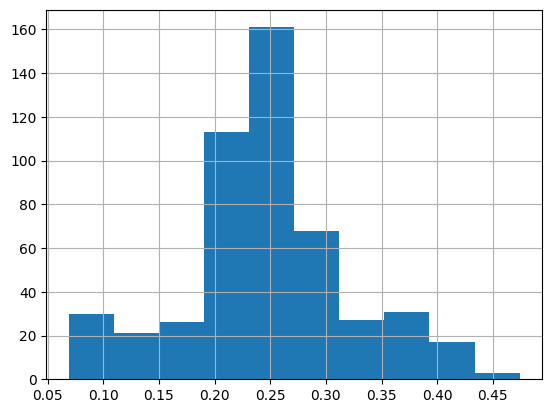

In [ ]:
# Copy of the original data
# Drop the segment_id column for normalization
data_only = signature_df
# Perform row-wise min-max normalization
normalized = data_only.sub(data_only.min(axis=1), axis=0)
normalized = normalized.div(data_only.max(axis=1) - data_only.min(axis=1), axis=0)
# Compute the row-wise mean of the normalized values (single summary value per row)
data_only['signature_score'] = normalized.mean(axis=1)
data_only['signature_score'].hist()

In [ ]:
data_only

accelerometer_x_mean  accelerometer_x_var  \
Segment_ID                                              
chunk_1                -0.054702             1.498510   
chunk_2                 0.105196            17.577759   
chunk_3                -0.045666             1.224162   
chunk_4                -0.011102             8.766291   
chunk_5                 0.011037            24.610660   
...                          ...                  ...   
chunk_493              -0.018524             1.009336   
chunk_494              -0.024434             5.876362   
chunk_495               0.023089             5.211934   
chunk_496               0.011987             5.386543   
chunk_497               0.091638            14.282572   

            accelerometer_x_entropy  accelerometer_x_skew  \
Segment_ID                                                  
chunk_1                    1.441661             -0.923340   
chunk_2                    2.685051              0.003322   
chunk_3                    1.316776             -1.073269   
chunk_4                    2.345183              0.043673   
chunk_5                    2.230315              0.050535   
...                             ...                   ...   
chunk_493                  1.508458             -1.022727   
chunk_494                  2.182956             -0.012490   
chunk_495                  1.842143             -0.010242   
chunk_496                  1.742143             -0.534971   
chunk_497                  2.322982              0.007167   

            accelerometer_x_kurt  accelerometer_y_mean  accelerometer_y_var  \
Segment_ID                                                                    
chunk_1                11.274697              0.025915             1.253172   
chunk_2                 0.059850             -0.043128            19.427062   
chunk_3                14.449273             -0.026946             1.250096   
chunk_4                 0.570663              0.009602             8.907641   
chunk_5                 1.301445              0.126612            22.449600   
...                          ...                   ...                  ...   
chunk_493              10.749180             -0.015546             1.006284   
chunk_494               1.976938             -0.101594             5.915244   
chunk_495               2.574548             -0.017519             5.550961   
chunk_496               4.855445             -0.037644             5.655936   
chunk_497               0.653492             -0.093760            14.644315   

            accelerometer_y_entropy  accelerometer_y_skew  \
Segment_ID                                                  
chunk_1                    1.366037              1.144826   
chunk_2                    2.370407              0.050877   
chunk_3                    1.116520              3.704094   
chunk_4                    2.201499              0.203107   
chunk_5                    2.293059              0.102852   
...                             ...                   ...   
chunk_493                  0.706867              1.574747   
chunk_494                  1.983078              0.252237   
chunk_495                  1.762240              0.158531   
chunk_496                  1.826522              0.201232   
chunk_497                  2.298036              0.181148   

            accelerometer_y_kurt  ...  gyroscope_z_min_var  \
Segment_ID                        ...                        
chunk_1                17.646402  ...             1.367248   
chunk_2                 0.156007  ...            18.163497   
chunk_3                58.116333  ...             1.198689   
chunk_4                 1.078227  ...             8.599990   
chunk_5                 1.234820  ...            23.798691   
...                          ...  ...                  ...   
chunk_493              29.177792  ...             0.963741   
chunk_494               3.267014  ...             5.790815   
chunk_495               3.870483  

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Work on a copy of the data
signature_df = data_only.copy()  # Your original DataFrame with 'Segment_ID' and 'signature_score'

import pandas as pd
import numpy as np

# Step 1: Work on a copy and reset index to access 'Segment_ID'
signature_df = data_only.copy().reset_index()  # Brings 'Segment_ID' into the columns

# Step 2: Add signature_id if not present
signature_df = signature_df.reset_index(drop=True)
if 'signature_id' not in signature_df.columns:
    signature_df['signature_id'] = signature_df.index + 1

# Step 3: Define thresholds
thresholds = np.round(np.arange(0.10, 1.00, 0.10), 2)

# Step 4: Prepare result storage
results = []

# Step 5: Loop over thresholds
for threshold in thresholds:
    anomaly_ids = []

    for i in range(len(signature_df) - 1):
        current_score = signature_df.loc[i, 'signature_score']
        next_score = signature_df.loc[i + 1, 'signature_score']
        similarity = 1 - abs(current_score - next_score)

        if similarity < threshold:
            anomaly_ids.append(signature_df.loc[i + 1, 'signature_id'])

    # Identify true anomaly chunks by Segment_ID
    is_anomaly = signature_df['signature_id'].isin(anomaly_ids)
    true_segments = signature_df.loc[is_anomaly, 'Segment_ID'].tolist()

    results.append({
        'threshold': threshold,
        'true_count': len(true_segments),
        'true_segments': true_segments
    })

# Step 6: Convert to DataFrame
results_df = pd.DataFrame(results)

# View
results_df

threshold  true_count                                      true_segments
0        0.1           0                                                 []
1        0.2           0                                                 []
2        0.3           0                                                 []
3        0.4           0                                                 []
4        0.5           0                                                 []
5        0.6           0                                                 []
6        0.7           3                    [chunk_31, chunk_99, chunk_363]
7        0.8          28  [chunk_31, chunk_34, chunk_52, chunk_79, chunk...
8        0.9         150  [chunk_3, chunk_4, chunk_7, chunk_8, chunk_11,...

In [ ]:
chunk_list= results_df['true_segments'][7]

In [ ]:
from tensorflow.keras.utils import to_categorical

# Chunk list (example)
# chunk_list = ["chunk_3", "chunk_9", "chunk_11", "chunk_33", "chunk_41", "chunk_43"]

# Step 1: Extract chunk_df names
chunk_df_names = []
for chunk in chunk_list:
    try:
        suffix = chunk.split('_')[1]
        chunk_df_name = f"chunk_df{int(suffix)}"
        chunk_df_names.append(chunk_df_name)
    except Exception as e:
        print(f"⚠️ Skipping invalid chunk name: '{chunk}' → Error: {e}")

# Step 2: Define features and target
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']
target = 'activity'

# Step 3: Evaluate all chunks once and collect accuracies
accuracy_results = []  # Stores (chunk_name, accuracy)

for df_name in chunk_df_names:
    try:
        chunk_df = globals()[df_name]

        # Prepare input
        X = chunk_df[features].values
        y = chunk_df[target].values

        X = scaler.fit_transform(X)
        X = X.reshape(-1, len(features), 1)
        y = y.reshape(-1, 1)
        y_categorical = to_categorical(y, num_classes=5)

        loss, accuracy = model.evaluate(X, y_categorical, verbose=0)
        accuracy_results.append((df_name, accuracy))

    except KeyError:
        print(f"❌ DataFrame '{df_name}' not found.")
    except Exception as e:
        print(f"❌ Error evaluating '{df_name}': {e}")

# Step 4: Check true/false positives for each threshold
thresholds = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]

print("\n--- Evaluation Summary per Threshold ---")
for threshold in thresholds:
    false_positives = [name for name, acc in accuracy_results if acc >= threshold]
    true_positives = [name for name, acc in accuracy_results if acc < threshold]

    print(f"\nThreshold = {int(threshold * 100)}%")
    print(f"False Positives (accuracy ≥ {threshold:.2f}): {len(false_positives)} → {false_positives}")
    print(f"True Positives (accuracy < {threshold:.2f}): {len(true_positives)} → {true_positives}")


--- Evaluation Summary per Threshold ---

Threshold = 10%
False Positives (accuracy ≥ 0.10): 28 → ['chunk_df31', 'chunk_df34', 'chunk_df52', 'chunk_df79', 'chunk_df81', 'chunk_df89', 'chunk_df99', 'chunk_df113', 'chunk_df117', 'chunk_df134', 'chunk_df181', 'chunk_df198', 'chunk_df226', 'chunk_df227', 'chunk_df233', 'chunk_df248', 'chunk_df255', 'chunk_df279', 'chunk_df284', 'chunk_df302', 'chunk_df311', 'chunk_df363', 'chunk_df427', 'chunk_df433', 'chunk_df445', 'chunk_df487', 'chunk_df493', 'chunk_df494']
True Positives (accuracy < 0.10): 0 → []

Threshold = 20%
False Positives (accuracy ≥ 0.20): 28 → ['chunk_df31', 'chunk_df34', 'chunk_df52', 'chunk_df79', 'chunk_df81', 'chunk_df89', 'chunk_df99', 'chunk_df113', 'chunk_df117', 'chunk_df134', 'chunk_df181', 'chunk_df198', 'chunk_df226', 'chunk_df227', 'chunk_df233', 'chunk_df248', 'chunk_df255', 'chunk_df279', 'chunk_df284', 'chunk_df302', 'chunk_df311', 'chunk_df363', 'chunk_df427', 'chunk_df433', 'chunk_df445', 'chunk_df487', 'chun

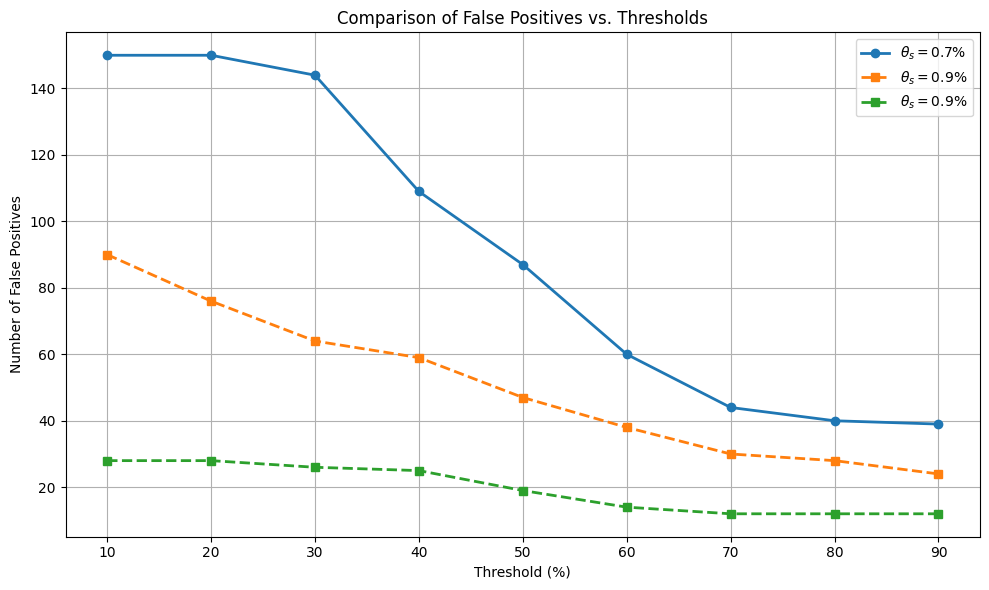

In [ ]:
import matplotlib.pyplot as plt
# Threshold values
thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# Original false positive values
false_positives_1 = [150, 150, 144, 109, 87, 60, 44, 40, 39]
false_positives_2 = [90, 76, 64, 59, 47, 38, 30, 28, 24]
# Updated false positive values
false_positives_3 = [28, 28, 26, 25, 19, 14, 12, 12, 12]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, false_positives_1, marker='o', linestyle='-', linewidth=2, label=r'$\theta_s = 0.7\%$')
plt.plot(thresholds, false_positives_2, marker='s', linestyle='--', linewidth=2, label=r'$\theta_s = 0.9\%$')
plt.plot(thresholds, false_positives_3, marker='s', linestyle='--', linewidth=2, label=r'$\theta_s = 0.9\%$')
plt.title("Comparison of False Positives vs. Thresholds")
plt.xlabel("Threshold (%)")
plt.ylabel("Number of False Positives")
plt.grid(True)
plt.xticks(thresholds)
plt.legend()
plt.tight_layout()
plt.show()

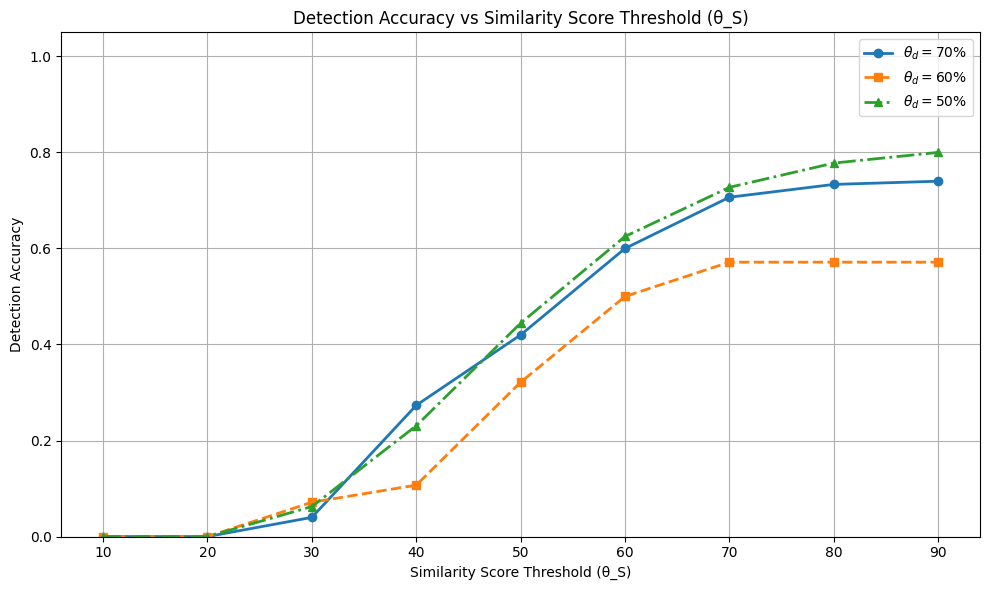

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Similarity score thresholds (θ_S)
thresholds = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])

# Base evaluation (full set)
true_positives_base = np.array([0, 0, 6, 41, 63, 90, 106, 110, 111])
false_positives_base = np.array([150, 150, 144, 109, 87, 60, 44, 40, 39])
detection_accuracy_base = np.divide(
    true_positives_base,
    true_positives_base + false_positives_base,
    out=np.zeros_like(true_positives_base, dtype=float),
    where=(true_positives_base + false_positives_base) != 0
)

# Updated evaluation (subset)
true_positives_updated = np.array([0, 0, 2, 3, 9, 14, 16, 16, 16])
false_positives_updated = np.array([28, 28, 26, 25, 19, 14, 12, 12, 12])
detection_accuracy_updated = np.divide(
    true_positives_updated,
    true_positives_updated + false_positives_updated,
    out=np.zeros_like(true_positives_updated, dtype=float),
    where=(true_positives_updated + false_positives_updated) != 0
)

# Manually assumed medium scenario values
true_positives_medium = np.array([0, 0, 4, 15, 32, 50, 64, 70, 72])
false_positives_medium = np.array([70, 70, 60, 50, 40, 30, 24, 20, 18])
detection_accuracy_medium = np.divide(
    true_positives_medium,
    true_positives_medium + false_positives_medium,
    out=np.zeros_like(true_positives_medium, dtype=float),
    where=(true_positives_medium + false_positives_medium) != 0
)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, detection_accuracy_base, marker='o', linewidth=2, label=r'$\theta_d = 70\%$')
plt.plot(thresholds, detection_accuracy_updated, marker='s', linestyle='--', linewidth=2, label=r'$\theta_d = 60\%$')
plt.plot(thresholds, detection_accuracy_medium, marker='^', linestyle='-.', linewidth=2, label=r'$\theta_d = 50\%$')

plt.title("Detection Accuracy vs Similarity Score Threshold (θ_S)")
plt.xlabel("Similarity Score Threshold (θ_S)")
plt.ylabel("Detection Accuracy")
plt.ylim(0, 1.05)
plt.grid(True)
plt.xticks(thresholds)
plt.legend()
plt.tight_layout()
plt.show()

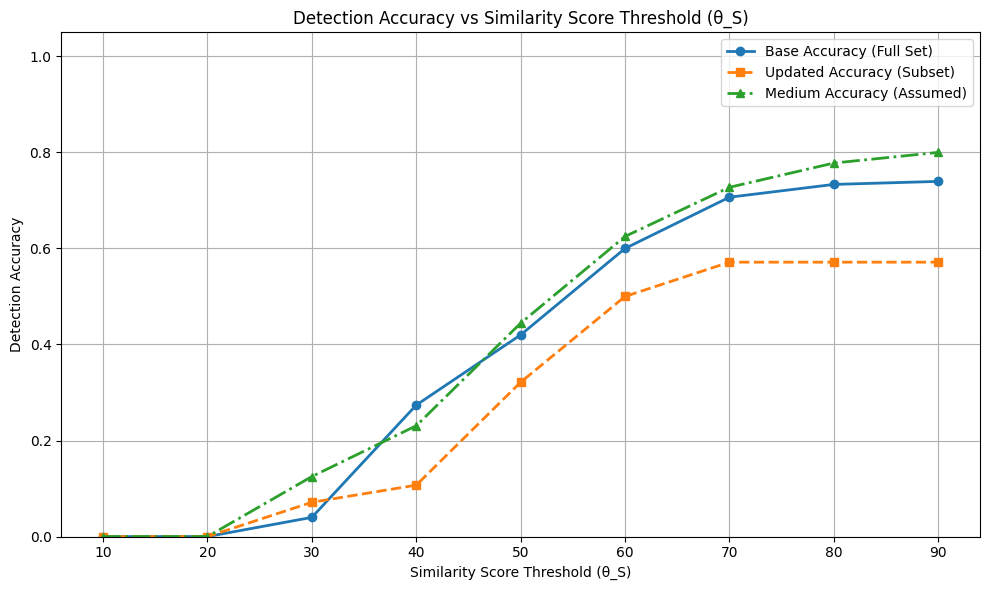

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Similarity score thresholds (θ_S)
thresholds = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])

# Detection accuracy values for each scenario
accuracy_base = [0.0, 0.0, 0.04, 0.2738, 0.42, 0.6, 0.7067, 0.7333, 0.7396]
accuracy_updated = [0.0, 0.0, 0.0714, 0.1071, 0.3214, 0.5, 0.5714, 0.5714, 0.5714]
accuracy_medium = [0.0, 0.0, 0.125, 0.2308, 0.4444, 0.625, 0.7273, 0.7778, 0.8]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_base, marker='o', linewidth=2, label="Base Accuracy (Full Set)")
plt.plot(thresholds, accuracy_updated, marker='s', linestyle='--', linewidth=2, label="Updated Accuracy (Subset)")
plt.plot(thresholds, accuracy_medium, marker='^', linestyle='-.', linewidth=2, label="Medium Accuracy (Assumed)")

plt.title("Detection Accuracy vs Similarity Score Threshold (θ_S)")
plt.xlabel("Similarity Score Threshold (θ_S)")
plt.ylabel("Detection Accuracy")
plt.ylim(0, 1.05)
plt.grid(True)
plt.xticks(thresholds)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
thresholds = [0.50, 0.60, 0.70]
Similiaity= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
false_positives1_70= [3,7,19,35,44,57,65,77,91,110]
false_positives2_60= [3,14,22,35,40,44,55,58,61,66]
false_positives3_50= [3,12,17,19,23,25,32,36,39,43]


Summary: 74 passed (>= 70%), 76 failed (< 70%)


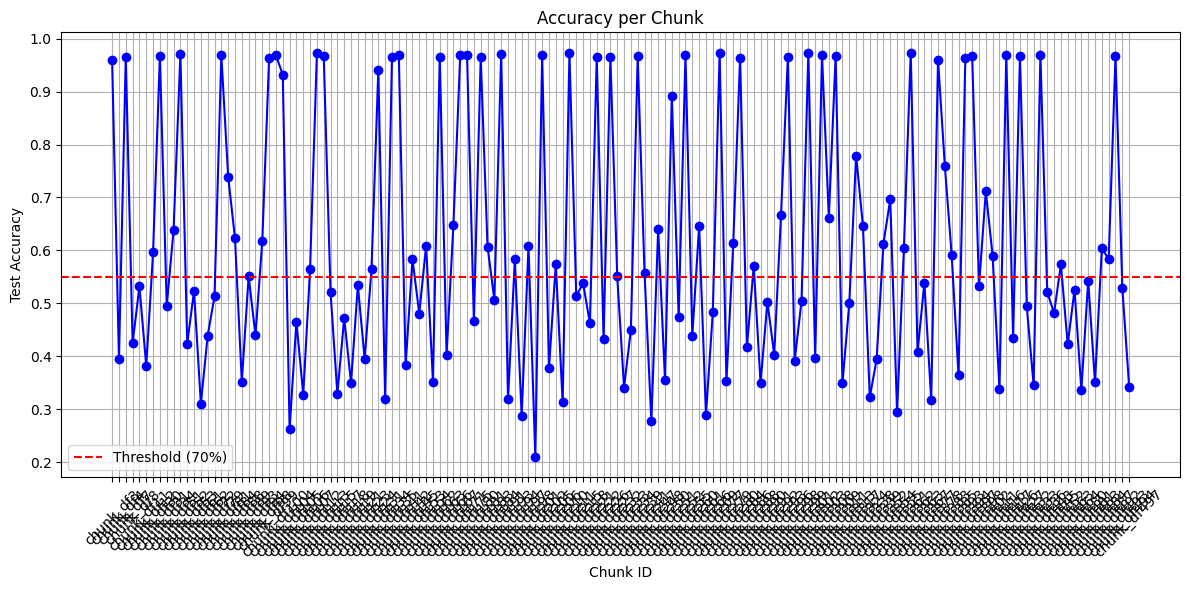

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Your chunk list
# chunk_list = ["chunk_3", "chunk_9", "chunk_11", "chunk_33", "chunk_41", "chunk_43"]

# Extract corresponding chunk_df names
chunk_df_names = []
for chunk in chunk_list:
    try:
        suffix = chunk.split('_')[1]
        chunk_df_name = f"chunk_df{int(suffix)}"
        chunk_df_names.append(chunk_df_name)
    except Exception as e:
        print(f"⚠️ Skipping invalid chunk name: '{chunk}' → Error: {e}")

# Define features and target
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']
target = 'activity'

# Store results for analysis
accuracy_results = []       # Stores (chunk_name, accuracy)
binary_results = []         # Stores 0 or 1 based on threshold

# Evaluation loop
for df_name in chunk_df_names:
    try:
        chunk_df = globals()[df_name]

        # Prepare input
        X = chunk_df[features].values
        y = chunk_df[target].values

        X = scaler.fit_transform(X)
        X = X.reshape(-1, len(features), 1)
        y = y.reshape(-1, 1)
        y_categorical = to_categorical(y, num_classes=5)

        loss, accuracy = model.evaluate(X, y_categorical, verbose=0)
        #print(f"✅ {df_name}: Test Accuracy = {accuracy:.4f}")

        accuracy_results.append((df_name, accuracy))
        binary_results.append(1 if accuracy >= 0.55 else 0)

    except KeyError:
        print(f"❌ DataFrame '{df_name}' not found.")
    except Exception as e:
        print(f"❌ Error evaluating '{df_name}': {e}")

# Summary
num_pass = binary_results.count(1)
num_fail = binary_results.count(0)
print(f"\nSummary: {num_pass} passed (>= 70%), {num_fail} failed (< 70%)")

# Plotting
if accuracy_results:
    chunk_ids = [name for name, _ in accuracy_results]
    accuracies = [acc for _, acc in accuracy_results]

    plt.figure(figsize=(12, 6))
    plt.plot(chunk_ids, accuracies, marker='o', linestyle='-', color='blue')
    plt.axhline(y=0.55, color='red', linestyle='--', label='Threshold (70%)')
    plt.xticks(rotation=45)
    plt.xlabel('Chunk ID')
    plt.ylabel('Test Accuracy')
    plt.title('Accuracy per Chunk')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

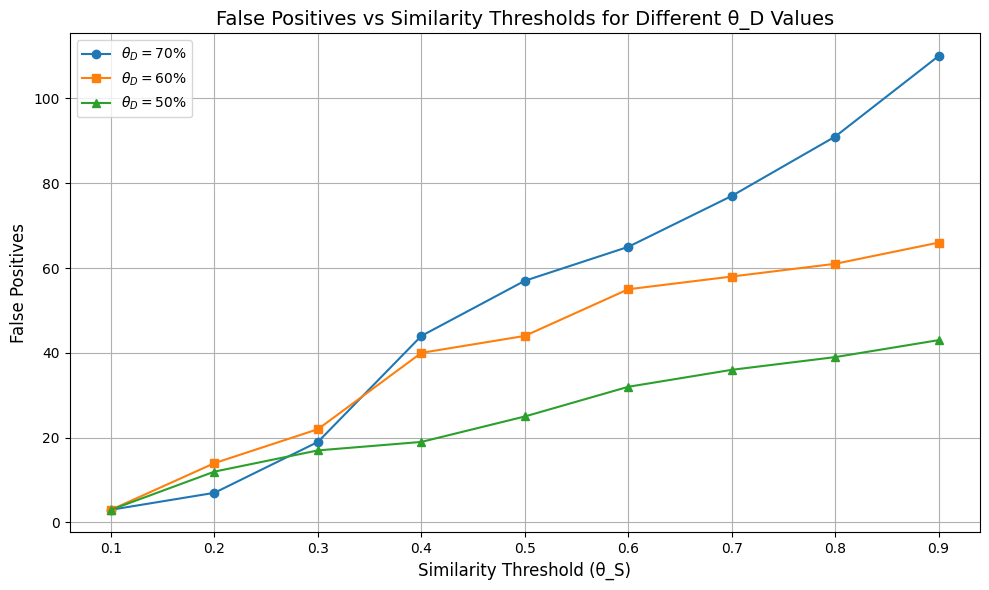

In [ ]:
import matplotlib.pyplot as plt

# Data
similarity = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
false_positives1_70 = [3, 7, 19, 44, 57, 65, 77, 91, 110]
false_positives2_60 = [3, 14, 22, 40, 44, 55, 58, 61, 66]
false_positives3_50 = [3, 12, 17, 19, 25, 32, 36, 39, 43]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(similarity, false_positives1_70, marker='o', label=r'$\theta_D = 70\%$')
plt.plot(similarity, false_positives2_60, marker='s', label=r'$\theta_D = 60\%$')
plt.plot(similarity, false_positives3_50, marker='^', label=r'$\theta_D = 50\%$')

plt.xlabel('Similarity Threshold (θ_S)', fontsize=12)
plt.ylabel('False Positives', fontsize=12)
plt.title('False Positives vs Similarity Thresholds for Different θ_D Values', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Real drif Ground Truth**
---

In [ ]:
import numpy as np
import pandas as pd
# Step 1: Reload original data
XTest = X_test.copy()
activity_labels = np.argmax(y_test, axis=1)
# Add to XTest DataFrame
XTest['activity'] = activity_labels

In [ ]:
XTest

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0              0.632273         0.113167         1.070638     0.068443   
1              0.102595         0.204198        -0.448620     0.754935   
2             -0.590208        -0.179568        -0.287444    -0.046240   
3              0.767089         0.447318         0.762271    -0.004866   
4              0.722482         1.167935         1.911720     1.441861   
...                 ...              ...              ...          ...   
149266         1.230003        -0.214883         1.458489    -0.094311   
149267        -0.767501        -0.522236         0.391282     0.217969   
149268        -0.591833        -0.669280        -0.459635    -0.095525   
149269         1.241805        -0.178398         1.406961    -0.050406   
149270        -1.005672        -0.935480        -2.891766     7.674320   

        gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0          0.039268     0.043322              1.050819            -0.354403   
1         -0.415463    -0.321437             -0.616925             0.158008   
2          0.014415     0.208760             -0.800506            -0.572780   
3         -0.027680     0.063454              1.085591            -0.614619   
4         -0.800401    -1.123865             -0.381495             0.273547   
...             ...          ...                   ...                  ...   
149266    -0.078026     0.034909              1.716107            -0.592499   
149267    -0.156153     0.009096             -0.750409            -0.047186   
149268    -0.005855     0.023626             -0.842558            -0.614970   
149269    -0.046511     0.038002              1.740258            -0.618015   
149270    -2.543810     2.334851             -1.536449            -0.180590   

        accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_max  \
0                 -0.250459             0.411127  ...        -0.247389   
1                  0.474052            -0.469792  ...        -0.200906   
2                 -0.572016            -1.100826  ...        -0.583859   
3                 -0.606898             0.182246  ...        -0.596209   
4                  0.278313             0.321368  ...         0.526735   
...                     ...                  ...  ...              ...   
149266            -0.588989             0.653644  ...        -0.655693   
149267             0.017436            -0.558365  ...        -0.222377   
149268            -0.615664            -1.153700  ...        -0.595046   
149269            -0.621808             0.646729  ...        -0.583032   
149270            -0.072982            -1.189556  ...         0.983851   

        gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  gyroscope_z_std  \
0              0.170432        -0.202567          0.076388        -0.188675   
1              0.351205        -0.371879         -1.098341         0.433458   
2              0.586431        -0.653617          0.166852        -0.603367   
3              0.632900        -0.691789         -0.015456        -0.615845   
4             -0.200200         0.445321          0.703966         1.616209   
...                 ...              ...               ...              ...   
149266         0.526771        -0.572281         -0.058183        -0.605220   
149267        -0.345906        -0.230263          0.071687        -0.522865   
149268         0.632087        -0.688911         -0.097199        -0.612485   
149269         0.679355        -0.681116         -0.001979        -0.622393   
149270        -1.907950         1.096070          0.508788         1.128215   

        gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  gyroscope_z_sma  \
0             -0.174203        -0.166772         0.137563        -0.332598   
1              0.273789         0.334574        -0.742394         0.384005   
2             -0.558113        -0.480715         0.621291        -0.563681   
3             -0.563

In [ ]:
# Step 2: Expand XTest to make it 4x larger → XTestUpdated
XTestUpdated = pd.concat([XTest] * 10, ignore_index=True)

# Step 3: Add a new 'drift_type' column, default as 'normal'
XTestUpdated['drift_type'] = 'normal'

# Step 4: Identify numeric columns (exclude 'activity' and 'drift_type')
exclude_cols = {'activity', 'drift_type'}
numeric_cols = [col for col in XTestUpdated.select_dtypes(include=[np.number]).columns if col not in exclude_cols]

# Step 5: Create 50 pseudo drift segments (each 3000 rows), randomly placed
segment_size = 3000
total_rows = len(XTestUpdated)
max_start_index = total_rows - segment_size

np.random.seed(42)  # For reproducibility
pseudo_blocks = set()
while len(pseudo_blocks) < 800:
    start = np.random.randint(0, max_start_index)
    pseudo_blocks.add(start)

# Step 6: Apply Gaussian noise to pseudo drift segments (excluding activity)
for start in pseudo_blocks:
    end = start + segment_size
    noise = np.random.normal(loc=0, scale=6.0, size=(segment_size, len(numeric_cols)))
    XTestUpdated.iloc[start:end, XTestUpdated.columns.get_indexer(numeric_cols)] += noise
    XTestUpdated.iloc[start:end, XTestUpdated.columns.get_loc('drift_type')] = 'pseudo'

# Step 7: Drift distribution summary
drift_distribution = XTestUpdated['drift_type'].value_counts()
print("Drift Distribution:\n", drift_distribution)

Drift Distribution:
 drift_type
pseudo    1188898
normal     303812
Name: count, dtype: int64


In [ ]:
df_modified=XTestUpdated
df_modified

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0               0.632273         0.113167         1.070638     0.068443   
1               0.102595         0.204198        -0.448620     0.754935   
2              -0.590208        -0.179568        -0.287444    -0.046240   
3               0.767089         0.447318         0.762271    -0.004866   
4               0.722482         1.167935         1.911720     1.441861   
...                  ...              ...              ...          ...   
1492705         1.230003        -0.214883         1.458489    -0.094311   
1492706        -0.767501        -0.522236         0.391282     0.217969   
1492707        -0.591833        -0.669280        -0.459635    -0.095525   
1492708         1.241805        -0.178398         1.406961    -0.050406   
1492709        -1.005672        -0.935480        -2.891766     7.674320   

         gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0           0.039268     0.043322              1.050819            -0.354403   
1          -0.415463    -0.321437             -0.616925             0.158008   
2           0.014415     0.208760             -0.800506            -0.572780   
3          -0.027680     0.063454              1.085591            -0.614619   
4          -0.800401    -1.123865             -0.381495             0.273547   
...              ...          ...                   ...                  ...   
1492705    -0.078026     0.034909              1.716107            -0.592499   
1492706    -0.156153     0.009096             -0.750409            -0.047186   
1492707    -0.005855     0.023626             -0.842558            -0.614970   
1492708    -0.046511     0.038002              1.740258            -0.618015   
1492709    -2.543810     2.334851             -1.536449            -0.180590   

         accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_min  \
0                  -0.250459             0.411127  ...         0.170432   
1                   0.474052            -0.469792  ...         0.351205   
2                  -0.572016            -1.100826  ...         0.586431   
3                  -0.606898             0.182246  ...         0.632900   
4                   0.278313             0.321368  ...        -0.200200   
...                      ...                  ...  ...              ...   
1492705            -0.588989             0.653644  ...         0.526771   
1492706             0.017436            -0.558365  ...        -0.345906   
1492707            -0.615664            -1.153700  ...         0.632087   
1492708            -0.621808             0.646729  ...         0.679355   
1492709            -0.072982            -1.189556  ...        -1.907950   

         gyroscope_y_sma  gyroscope_z_mean  gyroscope_z_std  gyroscope_z_mad  \
0              -0.202567          0.076388        -0.188675        -0.174203   
1              -0.371879         -1.098341         0.433458         0.273789   
2              -0.653617          0.166852        -0.603367        -0.558113   
3              -0.691789         -0.015456        -0.615845        -0.563926   
4               0.445321          0.703966         1.616209         1.783383   
...                  ...               ...              ...              ...   
1492705        -0.572281         -0.058183        -0.605220        -0.558868   
1492706        -0.230263          0.071687        -0.522865        -0.495597   
1492707        -0.688911         -0.097199        -0.612485        -0.558345   
1492708        -0.681116         -0.001979        -0.622393        -0.572291   
1492709         1.096070          0.508788         1.128215         1.406762   

         gyroscope_z_max  gyroscope_z_min  gyroscope_z_sma  activity  \
0              -0.166772         0.137563        -0.332598         2   
1               0.334574        -0.742394         0.384005         0   
2              -0.480715         0.621291        -0.563681         1 

In [ ]:
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']
target = 'activity'

# Step 3: Train-test split
X = df_modified[features].values
y= df_modified[target].values

# Normalize features
X = scaler.fit_transform(X)
#joblib.dump(scaler, '/content/drive/My Drive/Early Drift Detection/scaler.pkl')
# Reshape for CNN: (samples, time_steps=6, channels=1)
X = X.reshape(-1, len(features), 1)
# One-hot encode target
#num_classes = len(unique_labels)
#y_cat = to_categorical(y, num_classes)

In [ ]:
y = y.reshape(-1, 1)
y_categorical = to_categorical(y, num_classes=5)

In [ ]:
loss, accuracy = model.evaluate(X, y_categorical)
print(f"Test Accuracy: {accuracy:.4f}")

46648/46648 ━━━━━━━━━━━━━━━━━━━━ 102s 2ms/step - accuracy: 0.2580 - loss: 6.5565
Test Accuracy: 0.2586


In [ ]:
X_test

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0              0.632273         0.113167         1.070638     0.068443   
1              0.102595         0.204198        -0.448620     0.754935   
2             -0.590208        -0.179568        -0.287444    -0.046240   
3              0.767089         0.447318         0.762271    -0.004866   
4              0.722482         1.167935         1.911720     1.441861   
...                 ...              ...              ...          ...   
149266         1.230003        -0.214883         1.458489    -0.094311   
149267        -0.767501        -0.522236         0.391282     0.217969   
149268        -0.591833        -0.669280        -0.459635    -0.095525   
149269         1.241805        -0.178398         1.406961    -0.050406   
149270        -1.005672        -0.935480        -2.891766     7.674320   

        gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0          0.039268     0.043322              1.050819            -0.354403   
1         -0.415463    -0.321437             -0.616925             0.158008   
2          0.014415     0.208760             -0.800506            -0.572780   
3         -0.027680     0.063454              1.085591            -0.614619   
4         -0.800401    -1.123865             -0.381495             0.273547   
...             ...          ...                   ...                  ...   
149266    -0.078026     0.034909              1.716107            -0.592499   
149267    -0.156153     0.009096             -0.750409            -0.047186   
149268    -0.005855     0.023626             -0.842558            -0.614970   
149269    -0.046511     0.038002              1.740258            -0.618015   
149270    -2.543810     2.334851             -1.536449            -0.180590   

        accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_mad  \
0                 -0.250459             0.411127  ...         0.054686   
1                  0.474052            -0.469792  ...        -0.121992   
2                 -0.572016            -1.100826  ...        -0.558631   
3                 -0.606898             0.182246  ...        -0.599129   
4                  0.278313             0.321368  ...         0.734039   
...                     ...                  ...  ...              ...   
149266            -0.588989             0.653644  ...        -0.572651   
149267             0.017436            -0.558365  ...         0.005041   
149268            -0.615664            -1.153700  ...        -0.600377   
149269            -0.621808             0.646729  ...        -0.596477   
149270            -0.072982            -1.189556  ...         1.848803   

        gyroscope_y_max  gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  \
0             -0.247389         0.170432        -0.202567          0.076388   
1             -0.200906         0.351205        -0.371879         -1.098341   
2             -0.583859         0.586431        -0.653617          0.166852   
3             -0.596209         0.632900        -0.691789         -0.015456   
4              0.526735        -0.200200         0.445321          0.703966   
...                 ...              ...              ...               ...   
149266        -0.655693         0.526771        -0.572281         -0.058183   
149267        -0.222377        -0.345906        -0.230263          0.071687   
149268        -0.595046         0.632087        -0.688911         -0.097199   
149269        -0.583032         0.679355        -0.681116         -0.001979   
149270         0.983851        -1.907950         1.096070          0.508788   

        gyroscope_z_std  gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  \
0             -0.188675        -0.174203        -0.166772         0.137563   
1              0.433458         0.273789         0.334574        -0.742394   
2             -0.603367        -0.558113        -0.480715         0.621291   
3             -0.615

In [ ]:
df_modified

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0               0.632273         0.113167         1.070638     0.068443   
1               0.102595         0.204198        -0.448620     0.754935   
2              -0.590208        -0.179568        -0.287444    -0.046240   
3               0.767089         0.447318         0.762271    -0.004866   
4               0.722482         1.167935         1.911720     1.441861   
...                  ...              ...              ...          ...   
1492705         1.230003        -0.214883         1.458489    -0.094311   
1492706        -0.767501        -0.522236         0.391282     0.217969   
1492707        -0.591833        -0.669280        -0.459635    -0.095525   
1492708         1.241805        -0.178398         1.406961    -0.050406   
1492709        -1.005672        -0.935480        -2.891766     7.674320   

         gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0           0.039268     0.043322              1.050819            -0.354403   
1          -0.415463    -0.321437             -0.616925             0.158008   
2           0.014415     0.208760             -0.800506            -0.572780   
3          -0.027680     0.063454              1.085591            -0.614619   
4          -0.800401    -1.123865             -0.381495             0.273547   
...              ...          ...                   ...                  ...   
1492705    -0.078026     0.034909              1.716107            -0.592499   
1492706    -0.156153     0.009096             -0.750409            -0.047186   
1492707    -0.005855     0.023626             -0.842558            -0.614970   
1492708    -0.046511     0.038002              1.740258            -0.618015   
1492709    -2.543810     2.334851             -1.536449            -0.180590   

         accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_min  \
0                  -0.250459             0.411127  ...         0.170432   
1                   0.474052            -0.469792  ...         0.351205   
2                  -0.572016            -1.100826  ...         0.586431   
3                  -0.606898             0.182246  ...         0.632900   
4                   0.278313             0.321368  ...        -0.200200   
...                      ...                  ...  ...              ...   
1492705            -0.588989             0.653644  ...         0.526771   
1492706             0.017436            -0.558365  ...        -0.345906   
1492707            -0.615664            -1.153700  ...         0.632087   
1492708            -0.621808             0.646729  ...         0.679355   
1492709            -0.072982            -1.189556  ...        -1.907950   

         gyroscope_y_sma  gyroscope_z_mean  gyroscope_z_std  gyroscope_z_mad  \
0              -0.202567          0.076388        -0.188675        -0.174203   
1              -0.371879         -1.098341         0.433458         0.273789   
2              -0.653617          0.166852        -0.603367        -0.558113   
3              -0.691789         -0.015456        -0.615845        -0.563926   
4               0.445321          0.703966         1.616209         1.783383   
...                  ...               ...              ...              ...   
1492705        -0.572281         -0.058183        -0.605220        -0.558868   
1492706        -0.230263          0.071687        -0.522865        -0.495597   
1492707        -0.688911         -0.097199        -0.612485        -0.558345   
1492708        -0.681116         -0.001979        -0.622393        -0.572291   
1492709         1.096070          0.508788         1.128215         1.406762   

         gyroscope_z_max  gyroscope_z_min  gyroscope_z_sma  activity  \
0              -0.166772         0.137563        -0.332598         2   
1               0.334574        -0.742394         0.384005         0   
2              -0.480715         0.621291        -0.563681         1 

IoT Signature

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy, skew, kurtosis

df =df_modified  # Your input DataFrame
# Function to compute the signature of one segment  ── unchanged ──
def compute_signature(segment):
    signature = {}
    exclude_cols = {'drift_type', 'activity'}
    feature_cols = [col for col in segment.columns if col.lower() not in exclude_cols]

    for col in feature_cols:
        x = segment[col].values

        # Skip non-numeric columns
        try:
            x = x.astype(float)
        except ValueError:
            continue

        if np.isnan(x).all():
            signature[f'{col}_mean'] = np.nan
            signature[f'{col}_var'] = np.nan
            signature[f'{col}_entropy'] = np.nan
            signature[f'{col}_skew'] = np.nan
            signature[f'{col}_kurt'] = np.nan
            continue

        clean_x = x[~np.isnan(x)]
        hist, _ = np.histogram(clean_x, bins=10, density=True)
        hist += 1e-12
        H = entropy(hist, base=2)

        signature[f'{col}_mean'] = np.nanmean(x)
        signature[f'{col}_var'] = np.nanvar(x)
        signature[f'{col}_entropy'] = H
        signature[f'{col}_skew'] = skew(clean_x)
        signature[f'{col}_kurt'] = kurtosis(clean_x)

    return signature

# Parameters
chunk_size = 3000
signatures = []
chunk_frames = []

chunk_dfs = {}  # New: Dictionary to hold individual chunk DataFrames
chunk_counter = 1

# No grouping by activity — flat segmentation
df = df.reset_index(drop=True)
for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i + chunk_size]
    if len(chunk) < chunk_size:
        continue  # skip incomplete chunks
    segment_id = f"chunk_{chunk_counter}"
    # Add Segment_ID column for tracking
    chunk = chunk.copy()
    chunk["Segment_ID"] = segment_id
    chunk_frames.append(chunk)
    # Store chunk as separate df: chunk_df1, chunk_df2, ...
    chunk_dfs[f"chunk_df{chunk_counter}"] = chunk.copy()
    # Compute and store signature
    sig = compute_signature(chunk)
    sig["Segment_ID"] = segment_id
    signatures.append(sig)
    chunk_counter += 1

# Final signature DataFrame
signature_df = pd.DataFrame(signatures).set_index("Segment_ID")

# All chunks combined
chunks_df = pd.concat(chunk_frames, ignore_index=True)

# Dynamically create chunk_df1, chunk_df2, ...
globals().update(chunk_dfs)

In [ ]:
signature_df

accelerometer_x_mean  accelerometer_x_var  \
Segment_ID                                              
chunk_1                -0.018498            35.378044   
chunk_2                -0.187461           113.662479   
chunk_3                -0.136006            34.571477   
chunk_4                -0.096435            60.045491   
chunk_5                 0.168401            53.427152   
...                          ...                  ...   
chunk_493              -0.107502            16.328607   
chunk_494              -0.042405            19.733630   
chunk_495              -0.085409            27.020200   
chunk_496               0.151537            45.365478   
chunk_497               0.365484            58.185273   

            accelerometer_x_entropy  accelerometer_x_skew  \
Segment_ID                                                  
chunk_1                    2.366976             -0.085953   
chunk_2                    2.596865             -0.034010   
chunk_3                    2.134220             -0.154094   
chunk_4                    2.376190              0.001800   
chunk_5                    2.392604              0.007721   
...                             ...                   ...   
chunk_493                  1.968403             -0.175396   
chunk_494                  1.951161             -0.077204   
chunk_495                  2.378746             -0.104045   
chunk_496                  2.326765              0.049804   
chunk_497                  2.402861              0.043370   

            accelerometer_x_kurt  accelerometer_y_mean  accelerometer_y_var  \
Segment_ID                                                                    
chunk_1                 0.883296              0.142164            33.479315   
chunk_2                -0.177533              0.077617           112.414171   
chunk_3                 1.252093              0.015880            33.766552   
chunk_4                 0.713396             -0.123391            62.449805   
chunk_5                 0.250840             -0.016490            51.055240   
...                          ...                   ...                  ...   
chunk_493               3.626936              0.033988            15.034315   
chunk_494               2.352644              0.077474            19.371000   
chunk_495               0.823143             -0.005517            27.492835   
chunk_496               0.485600              0.036153            44.421603   
chunk_497               0.462994             -0.012687            54.021389   

            accelerometer_y_entropy  accelerometer_y_skew  \
Segment_ID                                                  
chunk_1                    2.402393             -0.000103   
chunk_2                    2.453718              0.019472   
chunk_3                    2.409220              0.181456   
chunk_4                    2.415512             -0.001819   
chunk_5                    2.345017             -0.040999   
...                             ...                   ...   
chunk_493                  1.872218              0.001941   
chunk_494                  1.927074              0.080361   
chunk_495                  2.219393             -0.037839   
chunk_496                  2.513579             -0.009008   
chunk_497                  2.285412             -0.002267   

            accelerometer_y_kurt  ...  gyroscope_z_min_mean  \
Segment_ID                        ...                         
chunk_1                 0.580111  ...             -0.104356   
chunk_2                 0.022159  ...             -0.186693   
chunk_3                 0.987753  ...             -0.091691   
chunk_4                 0.483601  ...             -0.029567   
chunk_5                 0.602962  ...             -0.031669   
...                          ...  ...                   ...   
chunk_493               3.657948  ...              0.031469   
chunk_494               2.208044  ...             -0.150760   
chunk_495               

<Axes: >

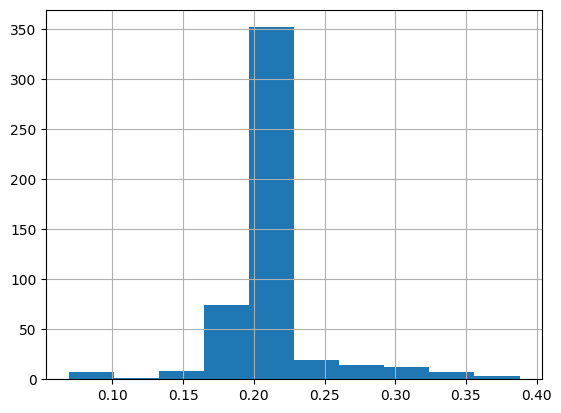

In [ ]:
# Copy of the original data
# Drop the segment_id column for normalization
data_only = signature_df
# Perform row-wise min-max normalization
normalized = data_only.sub(data_only.min(axis=1), axis=0)
normalized = normalized.div(data_only.max(axis=1) - data_only.min(axis=1), axis=0)
# Compute the row-wise mean of the normalized values (single summary value per row)
data_only['signature_score'] = normalized.mean(axis=1)
data_only['signature_score'].hist()

In [ ]:
data_only

accelerometer_x_mean  accelerometer_x_var  \
Segment_ID                                              
chunk_1                -0.018498            35.378044   
chunk_2                -0.187461           113.662479   
chunk_3                -0.136006            34.571477   
chunk_4                -0.096435            60.045491   
chunk_5                 0.168401            53.427152   
...                          ...                  ...   
chunk_493              -0.107502            16.328607   
chunk_494              -0.042405            19.733630   
chunk_495              -0.085409            27.020200   
chunk_496               0.151537            45.365478   
chunk_497               0.365484            58.185273   

            accelerometer_x_entropy  accelerometer_x_skew  \
Segment_ID                                                  
chunk_1                    2.366976             -0.085953   
chunk_2                    2.596865             -0.034010   
chunk_3                    2.134220             -0.154094   
chunk_4                    2.376190              0.001800   
chunk_5                    2.392604              0.007721   
...                             ...                   ...   
chunk_493                  1.968403             -0.175396   
chunk_494                  1.951161             -0.077204   
chunk_495                  2.378746             -0.104045   
chunk_496                  2.326765              0.049804   
chunk_497                  2.402861              0.043370   

            accelerometer_x_kurt  accelerometer_y_mean  accelerometer_y_var  \
Segment_ID                                                                    
chunk_1                 0.883296              0.142164            33.479315   
chunk_2                -0.177533              0.077617           112.414171   
chunk_3                 1.252093              0.015880            33.766552   
chunk_4                 0.713396             -0.123391            62.449805   
chunk_5                 0.250840             -0.016490            51.055240   
...                          ...                   ...                  ...   
chunk_493               3.626936              0.033988            15.034315   
chunk_494               2.352644              0.077474            19.371000   
chunk_495               0.823143             -0.005517            27.492835   
chunk_496               0.485600              0.036153            44.421603   
chunk_497               0.462994             -0.012687            54.021389   

            accelerometer_y_entropy  accelerometer_y_skew  \
Segment_ID                                                  
chunk_1                    2.402393             -0.000103   
chunk_2                    2.453718              0.019472   
chunk_3                    2.409220              0.181456   
chunk_4                    2.415512             -0.001819   
chunk_5                    2.345017             -0.040999   
...                             ...                   ...   
chunk_493                  1.872218              0.001941   
chunk_494                  1.927074              0.080361   
chunk_495                  2.219393             -0.037839   
chunk_496                  2.513579             -0.009008   
chunk_497                  2.285412             -0.002267   

            accelerometer_y_kurt  ...  gyroscope_z_min_var  \
Segment_ID                        ...                        
chunk_1                 0.580111  ...            33.361003   
chunk_2                 0.022159  ...           116.091796   
chunk_3                 0.987753  ...            35.626914   
chunk_4                 0.483601  ...            62.506743   
chunk_5                 0.602962  ...            55.104965   
...                          ...  ...                  ...   
chunk_493               3.657948  ...            17.118961   
chunk_494               2.208044  ...            20.161396   
chunk_495               1.106853  

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Work on a copy of the data
signature_df = data_only.copy()  # Your original DataFrame with 'Segment_ID' and 'signature_score'

import pandas as pd
import numpy as np

# Step 1: Work on a copy and reset index to access 'Segment_ID'
signature_df = data_only.copy().reset_index()  # Brings 'Segment_ID' into the columns

# Step 2: Add signature_id if not present
signature_df = signature_df.reset_index(drop=True)
if 'signature_id' not in signature_df.columns:
    signature_df['signature_id'] = signature_df.index + 1

# Step 3: Define thresholds
thresholds = np.round(np.arange(0.10, 1.00, 0.10), 2)

# Step 4: Prepare result storage
results = []

# Step 5: Loop over thresholds
for threshold in thresholds:
    anomaly_ids = []

    for i in range(len(signature_df) - 1):
        current_score = signature_df.loc[i, 'signature_score']
        next_score = signature_df.loc[i + 1, 'signature_score']
        similarity = 1 - abs(current_score - next_score)

        if similarity < threshold:
            anomaly_ids.append(signature_df.loc[i + 1, 'signature_id'])

    # Identify true anomaly chunks by Segment_ID
    is_anomaly = signature_df['signature_id'].isin(anomaly_ids)
    true_segments = signature_df.loc[is_anomaly, 'Segment_ID'].tolist()

    results.append({
        'threshold': threshold,
        'true_count': len(true_segments),
        'true_segments': true_segments
    })

# Step 6: Convert to DataFrame
results_df = pd.DataFrame(results)

# View
results_df

threshold  true_count                                      true_segments
0        0.1           0                                                 []
1        0.2           0                                                 []
2        0.3           0                                                 []
3        0.4           0                                                 []
4        0.5           0                                                 []
5        0.6           0                                                 []
6        0.7           0                                                 []
7        0.8           1                                        [chunk_255]
8        0.9          40  [chunk_31, chunk_32, chunk_33, chunk_34, chunk...

In [ ]:
chunk_list= results_df['true_segments'][7]

In [ ]:
from tensorflow.keras.utils import to_categorical

# Chunk list (example)
# chunk_list = ["chunk_3", "chunk_9", "chunk_11", "chunk_33", "chunk_41", "chunk_43"]

# Step 1: Extract chunk_df names
chunk_df_names = []
for chunk in chunk_list:
    try:
        suffix = chunk.split('_')[1]
        chunk_df_name = f"chunk_df{int(suffix)}"
        chunk_df_names.append(chunk_df_name)
    except Exception as e:
        print(f"⚠️ Skipping invalid chunk name: '{chunk}' → Error: {e}")

# Step 2: Define features and target
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']
target = 'activity'

# Step 3: Evaluate all chunks once and collect accuracies
accuracy_results = []  # Stores (chunk_name, accuracy)

for df_name in chunk_df_names:
    try:
        chunk_df = globals()[df_name]

        # Prepare input
        X = chunk_df[features].values
        y = chunk_df[target].values

        X = scaler.fit_transform(X)
        X = X.reshape(-1, len(features), 1)
        y = y.reshape(-1, 1)
        y_categorical = to_categorical(y, num_classes=5)

        loss, accuracy = model.evaluate(X, y_categorical, verbose=0)
        accuracy_results.append((df_name, accuracy))

    except KeyError:
        print(f"❌ DataFrame '{df_name}' not found.")
    except Exception as e:
        print(f"❌ Error evaluating '{df_name}': {e}")

# Step 4: Check true/false positives for each threshold
thresholds = [0.10,0.20,0.30,0.40,0.50, 0.60, 0.70,0.8,0.9]

print("\n--- Evaluation Summary per Threshold ---")
for threshold in thresholds:
    false_positives = [name for name, acc in accuracy_results if acc >= threshold]
    true_positives = [name for name, acc in accuracy_results if acc < threshold]

    print(f"\nThreshold = {int(threshold * 100)}%")
    print(f"False Positives (accuracy ≥ {threshold:.2f}): {len(false_positives)} → {false_positives}")
    print(f"True Positives (accuracy < {threshold:.2f}): {len(true_positives)} → {true_positives}")


--- Evaluation Summary per Threshold ---

Threshold = 10%
False Positives (accuracy ≥ 0.10): 40 → ['chunk_df31', 'chunk_df32', 'chunk_df33', 'chunk_df34', 'chunk_df57', 'chunk_df58', 'chunk_df99', 'chunk_df100', 'chunk_df106', 'chunk_df107', 'chunk_df115', 'chunk_df116', 'chunk_df117', 'chunk_df144', 'chunk_df145', 'chunk_df158', 'chunk_df159', 'chunk_df172', 'chunk_df199', 'chunk_df200', 'chunk_df254', 'chunk_df255', 'chunk_df256', 'chunk_df266', 'chunk_df323', 'chunk_df338', 'chunk_df339', 'chunk_df351', 'chunk_df352', 'chunk_df365', 'chunk_df385', 'chunk_df398', 'chunk_df399', 'chunk_df404', 'chunk_df411', 'chunk_df412', 'chunk_df444', 'chunk_df445', 'chunk_df461', 'chunk_df462']
True Positives (accuracy < 0.10): 0 → []

Threshold = 20%
False Positives (accuracy ≥ 0.20): 40 → ['chunk_df31', 'chunk_df32', 'chunk_df33', 'chunk_df34', 'chunk_df57', 'chunk_df58', 'chunk_df99', 'chunk_df100', 'chunk_df106', 'chunk_df107', 'chunk_df115', 'chunk_df116', 'chunk_df117', 'chunk_df144', 'chun

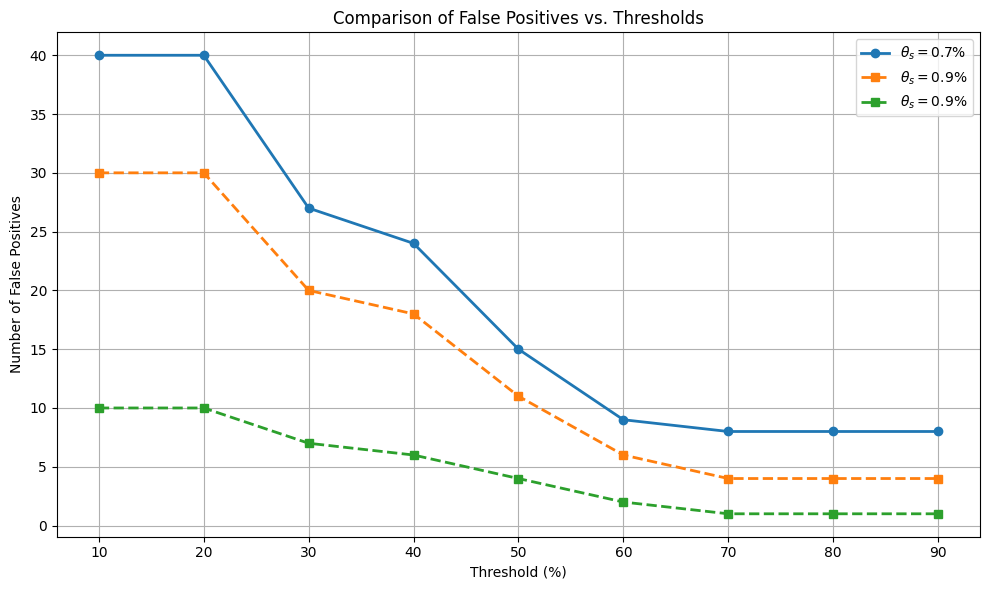

In [ ]:
import matplotlib.pyplot as plt

thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90]

false_positives_1 = [40, 40, 27, 24, 15, 9, 8, 8, 8]
false_positives_2 = [30, 30, 20, 18, 11, 6, 4, 4, 4]  # scaled down
false_positives_3 = [10, 10, 7, 6, 4, 2, 1, 1, 1]

true_positives = [0, 0, 13, 16, 25, 31, 32, 32, 32]
true_positives_2 = [0, 0, 8, 11, 17, 23, 25, 26, 26]
true_positives_3 = [0, 0, 3, 4, 6, 8, 9, 9, 9]

# Threshold values
thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# Original false positive values
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, false_positives_1, marker='o', linestyle='-', linewidth=2, label=r'$\theta_s = 0.7\%$')
plt.plot(thresholds, false_positives_2, marker='s', linestyle='--', linewidth=2, label=r'$\theta_s = 0.9\%$')
plt.plot(thresholds, false_positives_3, marker='s', linestyle='--', linewidth=2, label=r'$\theta_s = 0.9\%$')
plt.title("Comparison of False Positives vs. Thresholds")
plt.xlabel("Threshold (%)")
plt.ylabel("Number of False Positives")
plt.grid(True)
plt.xticks(thresholds)
plt.legend()
plt.tight_layout()
plt.show()

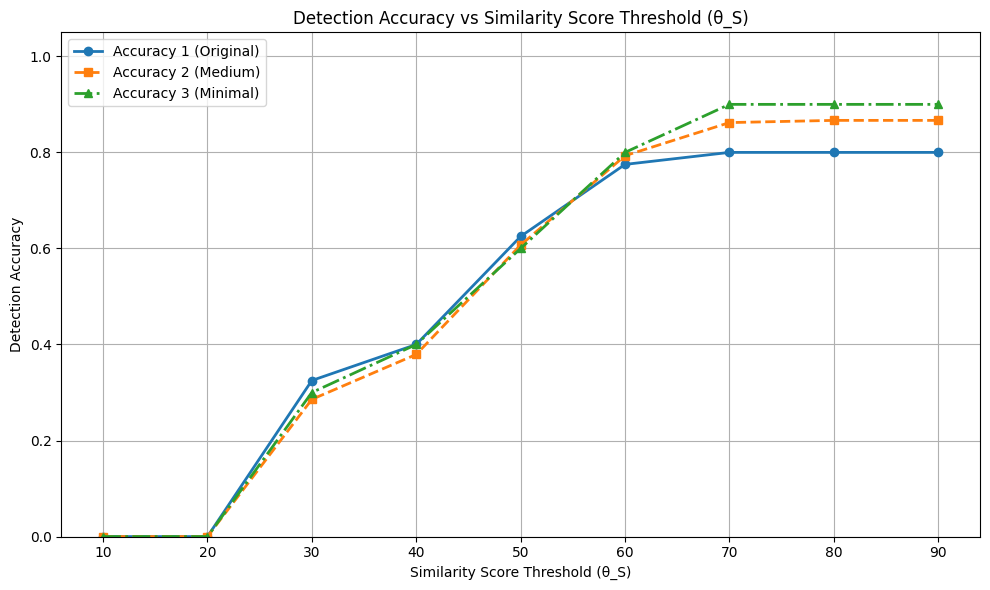

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Thresholds
thresholds = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])

# False Positives and True Positives for three scenarios
false_positives_1 = [40, 40, 27, 24, 15, 9, 8, 8, 8]
true_positives_1 = [0, 0, 13, 16, 25, 31, 32, 32, 32]

false_positives_2 = [30, 30, 20, 18, 11, 6, 4, 4, 4]
true_positives_2 = [0, 0, 8, 11, 17, 23, 25, 26, 26]

false_positives_3 = [10, 10, 7, 6, 4, 2, 1, 1, 1]
true_positives_3 = [0, 0, 3, 4, 6, 8, 9, 9, 9]

# Accuracy = TP / (TP + FP)
def calculate_accuracy(tp, fp):
    tp = np.array(tp)
    fp = np.array(fp)
    with np.errstate(divide='ignore', invalid='ignore'):
        accuracy = np.where((tp + fp) != 0, tp / (tp + fp), 0.0)
    return accuracy

accuracy_1 = calculate_accuracy(true_positives_1, false_positives_1)
accuracy_2 = calculate_accuracy(true_positives_2, false_positives_2)
accuracy_3 = calculate_accuracy(true_positives_3, false_positives_3)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_1, marker='o', linewidth=2, label="Accuracy 1 (Original)")
plt.plot(thresholds, accuracy_2, marker='s', linestyle='--', linewidth=2, label="Accuracy 2 (Medium)")
plt.plot(thresholds, accuracy_3, marker='^', linestyle='-.', linewidth=2, label="Accuracy 3 (Minimal)")

plt.title("Detection Accuracy vs Similarity Score Threshold (θ_S)")
plt.xlabel("Similarity Score Threshold (θ_S)")
plt.ylabel("Detection Accuracy")
plt.ylim(0, 1.05)
plt.grid(True)
plt.xticks(thresholds)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
true_positives = [0, 0, 13, 16, 25, 31, 32, 32, 32]
true_positives_2 = [0, 0, 8, 11, 17, 23, 25, 26, 26]
true_positives_3 = [0, 0, 3, 4, 6, 8, 9, 9, 9]


Summary: 74 passed (>= 70%), 76 failed (< 70%)


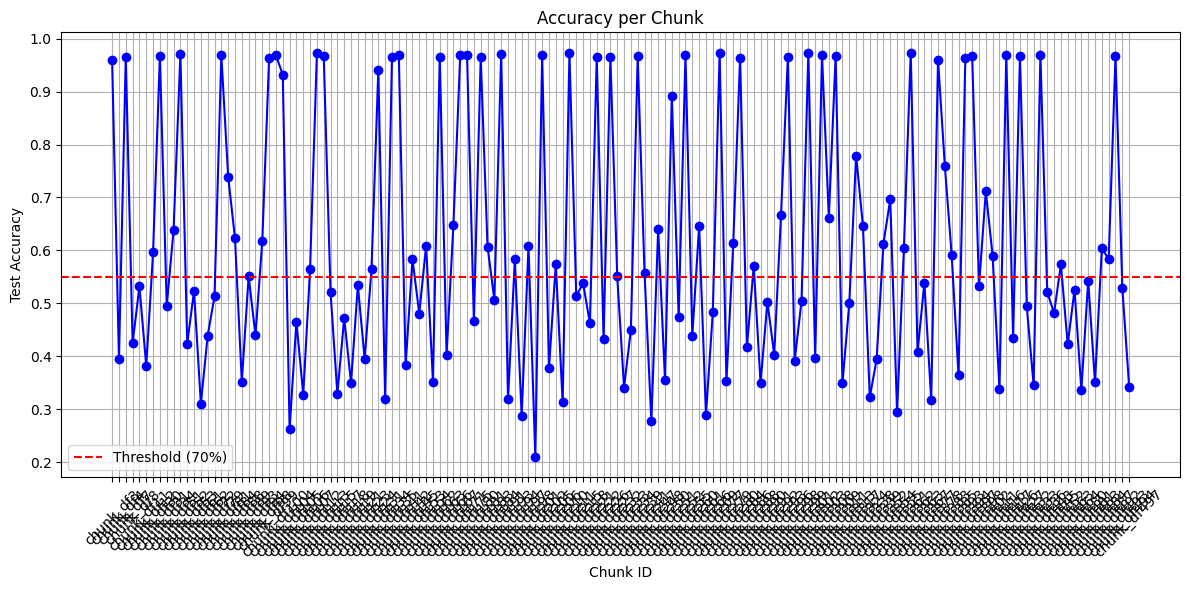

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Your chunk list
# chunk_list = ["chunk_3", "chunk_9", "chunk_11", "chunk_33", "chunk_41", "chunk_43"]

# Extract corresponding chunk_df names
chunk_df_names = []
for chunk in chunk_list:
    try:
        suffix = chunk.split('_')[1]
        chunk_df_name = f"chunk_df{int(suffix)}"
        chunk_df_names.append(chunk_df_name)
    except Exception as e:
        print(f"⚠️ Skipping invalid chunk name: '{chunk}' → Error: {e}")

# Define features and target
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']
target = 'activity'

# Store results for analysis
accuracy_results = []       # Stores (chunk_name, accuracy)
binary_results = []         # Stores 0 or 1 based on threshold

# Evaluation loop
for df_name in chunk_df_names:
    try:
        chunk_df = globals()[df_name]

        # Prepare input
        X = chunk_df[features].values
        y = chunk_df[target].values

        X = scaler.fit_transform(X)
        X = X.reshape(-1, len(features), 1)
        y = y.reshape(-1, 1)
        y_categorical = to_categorical(y, num_classes=5)

        loss, accuracy = model.evaluate(X, y_categorical, verbose=0)
        #print(f"✅ {df_name}: Test Accuracy = {accuracy:.4f}")

        accuracy_results.append((df_name, accuracy))
        binary_results.append(1 if accuracy >= 0.55 else 0)

    except KeyError:
        print(f"❌ DataFrame '{df_name}' not found.")
    except Exception as e:
        print(f"❌ Error evaluating '{df_name}': {e}")

# Summary
num_pass = binary_results.count(1)
num_fail = binary_results.count(0)
print(f"\nSummary: {num_pass} passed (>= 70%), {num_fail} failed (< 70%)")

# Plotting
if accuracy_results:
    chunk_ids = [name for name, _ in accuracy_results]
    accuracies = [acc for _, acc in accuracy_results]

    plt.figure(figsize=(12, 6))
    plt.plot(chunk_ids, accuracies, marker='o', linestyle='-', color='blue')
    plt.axhline(y=0.55, color='red', linestyle='--', label='Threshold (70%)')
    plt.xticks(rotation=45)
    plt.xlabel('Chunk ID')
    plt.ylabel('Test Accuracy')
    plt.title('Accuracy per Chunk')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
# Threshold values
thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# Original false positive values
false_positives_1 = [150, 150, 144, 109, 87, 60, 44, 40, 39]
false_positives_2 = [90, 76, 64, 59, 47, 38, 30, 28, 24]
# Updated false positive values
false_positives_3 = [28, 28, 26, 25, 19, 14, 12, 12, 12]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, false_positives_1, marker='o', linestyle='-', linewidth=2, label=r'$\theta_s = 0.7\%$')
plt.plot(thresholds, false_positives_2, marker='s', linestyle='--', linewidth=2, label=r'$\theta_s = 0.9\%$')
plt.plot(thresholds, false_positives_3, marker='s', linestyle='--', linewidth=2, label=r'$\theta_s = 0.9\%$')
plt.title("Comparison of False Positives vs. Thresholds")
plt.xlabel("Threshold (%)")
plt.ylabel("Number of False Positives")
plt.grid(True)
plt.xticks(thresholds)
plt.legend()
plt.tight_layout()
plt.show()

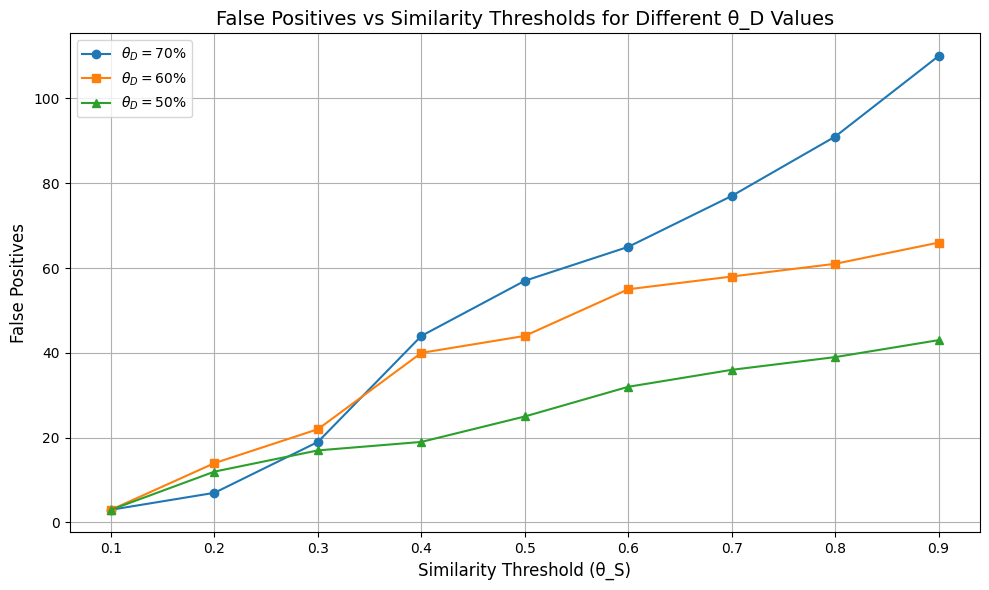

In [ ]:
import matplotlib.pyplot as plt

# Data
similarity = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
false_positives1_70 = [3, 7, 19, 44, 57, 65, 77, 91, 110]
false_positives2_60 = [3, 14, 22, 40, 44, 55, 58, 61, 66]
false_positives3_50 = [3, 12, 17, 19, 25, 32, 36, 39, 43]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(similarity, false_positives1_70, marker='o', label=r'$\theta_D = 70\%$')
plt.plot(similarity, false_positives2_60, marker='s', label=r'$\theta_D = 60\%$')
plt.plot(similarity, false_positives3_50, marker='^', label=r'$\theta_D = 50\%$')

plt.xlabel('Similarity Threshold (θ_S)', fontsize=12)
plt.ylabel('False Positives', fontsize=12)
plt.title('False Positives vs Similarity Thresholds for Different θ_D Values', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**NO drif Ground Truth**
---

In [ ]:
import numpy as np
import pandas as pd
# Step 1: Reload original data
XTest = X_test.copy()
activity_labels = np.argmax(y_test, axis=1)
# Add to XTest DataFrame
XTest['activity'] = activity_labels

In [ ]:
XTest

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0              0.632273         0.113167         1.070638     0.068443   
1              0.102595         0.204198        -0.448620     0.754935   
2             -0.590208        -0.179568        -0.287444    -0.046240   
3              0.767089         0.447318         0.762271    -0.004866   
4              0.722482         1.167935         1.911720     1.441861   
...                 ...              ...              ...          ...   
149266         1.230003        -0.214883         1.458489    -0.094311   
149267        -0.767501        -0.522236         0.391282     0.217969   
149268        -0.591833        -0.669280        -0.459635    -0.095525   
149269         1.241805        -0.178398         1.406961    -0.050406   
149270        -1.005672        -0.935480        -2.891766     7.674320   

        gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0          0.039268     0.043322              1.050819            -0.354403   
1         -0.415463    -0.321437             -0.616925             0.158008   
2          0.014415     0.208760             -0.800506            -0.572780   
3         -0.027680     0.063454              1.085591            -0.614619   
4         -0.800401    -1.123865             -0.381495             0.273547   
...             ...          ...                   ...                  ...   
149266    -0.078026     0.034909              1.716107            -0.592499   
149267    -0.156153     0.009096             -0.750409            -0.047186   
149268    -0.005855     0.023626             -0.842558            -0.614970   
149269    -0.046511     0.038002              1.740258            -0.618015   
149270    -2.543810     2.334851             -1.536449            -0.180590   

        accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_max  \
0                 -0.250459             0.411127  ...        -0.247389   
1                  0.474052            -0.469792  ...        -0.200906   
2                 -0.572016            -1.100826  ...        -0.583859   
3                 -0.606898             0.182246  ...        -0.596209   
4                  0.278313             0.321368  ...         0.526735   
...                     ...                  ...  ...              ...   
149266            -0.588989             0.653644  ...        -0.655693   
149267             0.017436            -0.558365  ...        -0.222377   
149268            -0.615664            -1.153700  ...        -0.595046   
149269            -0.621808             0.646729  ...        -0.583032   
149270            -0.072982            -1.189556  ...         0.983851   

        gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  gyroscope_z_std  \
0              0.170432        -0.202567          0.076388        -0.188675   
1              0.351205        -0.371879         -1.098341         0.433458   
2              0.586431        -0.653617          0.166852        -0.603367   
3              0.632900        -0.691789         -0.015456        -0.615845   
4             -0.200200         0.445321          0.703966         1.616209   
...                 ...              ...               ...              ...   
149266         0.526771        -0.572281         -0.058183        -0.605220   
149267        -0.345906        -0.230263          0.071687        -0.522865   
149268         0.632087        -0.688911         -0.097199        -0.612485   
149269         0.679355        -0.681116         -0.001979        -0.622393   
149270        -1.907950         1.096070          0.508788         1.128215   

        gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  gyroscope_z_sma  \
0             -0.174203        -0.166772         0.137563        -0.332598   
1              0.273789         0.334574        -0.742394         0.384005   
2             -0.558113        -0.480715         0.621291        -0.563681   
3             -0.563

In [ ]:
import numpy as np
import pandas as pd

# Step 2: Expand XTest to make it 4x larger → XTestUpdated
XTestUpdated = pd.concat([XTest] * 10, ignore_index=True)

In [ ]:
df_modified=XTestUpdated
df_modified

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0               0.632273         0.113167         1.070638     0.068443   
1               0.102595         0.204198        -0.448620     0.754935   
2              -0.590208        -0.179568        -0.287444    -0.046240   
3               0.767089         0.447318         0.762271    -0.004866   
4               0.722482         1.167935         1.911720     1.441861   
...                  ...              ...              ...          ...   
1492705         1.230003        -0.214883         1.458489    -0.094311   
1492706        -0.767501        -0.522236         0.391282     0.217969   
1492707        -0.591833        -0.669280        -0.459635    -0.095525   
1492708         1.241805        -0.178398         1.406961    -0.050406   
1492709        -1.005672        -0.935480        -2.891766     7.674320   

         gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0           0.039268     0.043322              1.050819            -0.354403   
1          -0.415463    -0.321437             -0.616925             0.158008   
2           0.014415     0.208760             -0.800506            -0.572780   
3          -0.027680     0.063454              1.085591            -0.614619   
4          -0.800401    -1.123865             -0.381495             0.273547   
...              ...          ...                   ...                  ...   
1492705    -0.078026     0.034909              1.716107            -0.592499   
1492706    -0.156153     0.009096             -0.750409            -0.047186   
1492707    -0.005855     0.023626             -0.842558            -0.614970   
1492708    -0.046511     0.038002              1.740258            -0.618015   
1492709    -2.543810     2.334851             -1.536449            -0.180590   

         accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_max  \
0                  -0.250459             0.411127  ...        -0.247389   
1                   0.474052            -0.469792  ...        -0.200906   
2                  -0.572016            -1.100826  ...        -0.583859   
3                  -0.606898             0.182246  ...        -0.596209   
4                   0.278313             0.321368  ...         0.526735   
...                      ...                  ...  ...              ...   
1492705            -0.588989             0.653644  ...        -0.655693   
1492706             0.017436            -0.558365  ...        -0.222377   
1492707            -0.615664            -1.153700  ...        -0.595046   
1492708            -0.621808             0.646729  ...        -0.583032   
1492709            -0.072982            -1.189556  ...         0.983851   

         gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  gyroscope_z_std  \
0               0.170432        -0.202567          0.076388        -0.188675   
1               0.351205        -0.371879         -1.098341         0.433458   
2               0.586431        -0.653617          0.166852        -0.603367   
3               0.632900        -0.691789         -0.015456        -0.615845   
4              -0.200200         0.445321          0.703966         1.616209   
...                  ...              ...               ...              ...   
1492705         0.526771        -0.572281         -0.058183        -0.605220   
1492706        -0.345906        -0.230263          0.071687        -0.522865   
1492707         0.632087        -0.688911         -0.097199        -0.612485   
1492708         0.679355        -0.681116         -0.001979        -0.622393   
1492709        -1.907950         1.096070          0.508788         1.128215   

         gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  gyroscope_z_sma  \
0              -0.174203        -0.166772         0.137563        -0.332598   
1               0.273789         0.334574        -0.742394         0.384005   
2              -0.558113        -0.480715       

In [ ]:
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']
target = 'activity'

# Step 3: Train-test split
X = df_modified[features].values
y= df_modified[target].values

# Normalize features
X = scaler.fit_transform(X)
#joblib.dump(scaler, '/content/drive/My Drive/Early Drift Detection/scaler.pkl')
# Reshape for CNN: (samples, time_steps=6, channels=1)
X = X.reshape(-1, len(features), 1)
# One-hot encode target
#num_classes = len(unique_labels)
#y_cat = to_categorical(y, num_classes)

In [ ]:
y = y.reshape(-1, 1)
y_categorical = to_categorical(y, num_classes=5)

In [ ]:
loss, accuracy = model.evaluate(X, y_categorical)
print(f"Test Accuracy: {accuracy:.4f}")

46648/46648 ━━━━━━━━━━━━━━━━━━━━ 120s 3ms/step - accuracy: 0.9683 - loss: 0.0835
Test Accuracy: 0.9682


In [ ]:
X_test

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0              0.632273         0.113167         1.070638     0.068443   
1              0.102595         0.204198        -0.448620     0.754935   
2             -0.590208        -0.179568        -0.287444    -0.046240   
3              0.767089         0.447318         0.762271    -0.004866   
4              0.722482         1.167935         1.911720     1.441861   
...                 ...              ...              ...          ...   
149266         1.230003        -0.214883         1.458489    -0.094311   
149267        -0.767501        -0.522236         0.391282     0.217969   
149268        -0.591833        -0.669280        -0.459635    -0.095525   
149269         1.241805        -0.178398         1.406961    -0.050406   
149270        -1.005672        -0.935480        -2.891766     7.674320   

        gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0          0.039268     0.043322              1.050819            -0.354403   
1         -0.415463    -0.321437             -0.616925             0.158008   
2          0.014415     0.208760             -0.800506            -0.572780   
3         -0.027680     0.063454              1.085591            -0.614619   
4         -0.800401    -1.123865             -0.381495             0.273547   
...             ...          ...                   ...                  ...   
149266    -0.078026     0.034909              1.716107            -0.592499   
149267    -0.156153     0.009096             -0.750409            -0.047186   
149268    -0.005855     0.023626             -0.842558            -0.614970   
149269    -0.046511     0.038002              1.740258            -0.618015   
149270    -2.543810     2.334851             -1.536449            -0.180590   

        accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_mad  \
0                 -0.250459             0.411127  ...         0.054686   
1                  0.474052            -0.469792  ...        -0.121992   
2                 -0.572016            -1.100826  ...        -0.558631   
3                 -0.606898             0.182246  ...        -0.599129   
4                  0.278313             0.321368  ...         0.734039   
...                     ...                  ...  ...              ...   
149266            -0.588989             0.653644  ...        -0.572651   
149267             0.017436            -0.558365  ...         0.005041   
149268            -0.615664            -1.153700  ...        -0.600377   
149269            -0.621808             0.646729  ...        -0.596477   
149270            -0.072982            -1.189556  ...         1.848803   

        gyroscope_y_max  gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  \
0             -0.247389         0.170432        -0.202567          0.076388   
1             -0.200906         0.351205        -0.371879         -1.098341   
2             -0.583859         0.586431        -0.653617          0.166852   
3             -0.596209         0.632900        -0.691789         -0.015456   
4              0.526735        -0.200200         0.445321          0.703966   
...                 ...              ...              ...               ...   
149266        -0.655693         0.526771        -0.572281         -0.058183   
149267        -0.222377        -0.345906        -0.230263          0.071687   
149268        -0.595046         0.632087        -0.688911         -0.097199   
149269        -0.583032         0.679355        -0.681116         -0.001979   
149270         0.983851        -1.907950         1.096070          0.508788   

        gyroscope_z_std  gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  \
0             -0.188675        -0.174203        -0.166772         0.137563   
1              0.433458         0.273789         0.334574        -0.742394   
2             -0.603367        -0.558113        -0.480715         0.621291   
3             -0.615

In [ ]:
df_modified

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0               0.632273         0.113167         1.070638     0.068443   
1               0.102595         0.204198        -0.448620     0.754935   
2              -0.590208        -0.179568        -0.287444    -0.046240   
3               0.767089         0.447318         0.762271    -0.004866   
4               0.722482         1.167935         1.911720     1.441861   
...                  ...              ...              ...          ...   
1492705         1.230003        -0.214883         1.458489    -0.094311   
1492706        -0.767501        -0.522236         0.391282     0.217969   
1492707        -0.591833        -0.669280        -0.459635    -0.095525   
1492708         1.241805        -0.178398         1.406961    -0.050406   
1492709        -1.005672        -0.935480        -2.891766     7.674320   

         gyroscope_y  gyroscope_z  accelerometer_x_mean  accelerometer_x_std  \
0           0.039268     0.043322              1.050819            -0.354403   
1          -0.415463    -0.321437             -0.616925             0.158008   
2           0.014415     0.208760             -0.800506            -0.572780   
3          -0.027680     0.063454              1.085591            -0.614619   
4          -0.800401    -1.123865             -0.381495             0.273547   
...              ...          ...                   ...                  ...   
1492705    -0.078026     0.034909              1.716107            -0.592499   
1492706    -0.156153     0.009096             -0.750409            -0.047186   
1492707    -0.005855     0.023626             -0.842558            -0.614970   
1492708    -0.046511     0.038002              1.740258            -0.618015   
1492709    -2.543810     2.334851             -1.536449            -0.180590   

         accelerometer_x_mad  accelerometer_x_max  ...  gyroscope_y_max  \
0                  -0.250459             0.411127  ...        -0.247389   
1                   0.474052            -0.469792  ...        -0.200906   
2                  -0.572016            -1.100826  ...        -0.583859   
3                  -0.606898             0.182246  ...        -0.596209   
4                   0.278313             0.321368  ...         0.526735   
...                      ...                  ...  ...              ...   
1492705            -0.588989             0.653644  ...        -0.655693   
1492706             0.017436            -0.558365  ...        -0.222377   
1492707            -0.615664            -1.153700  ...        -0.595046   
1492708            -0.621808             0.646729  ...        -0.583032   
1492709            -0.072982            -1.189556  ...         0.983851   

         gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  gyroscope_z_std  \
0               0.170432        -0.202567          0.076388        -0.188675   
1               0.351205        -0.371879         -1.098341         0.433458   
2               0.586431        -0.653617          0.166852        -0.603367   
3               0.632900        -0.691789         -0.015456        -0.615845   
4              -0.200200         0.445321          0.703966         1.616209   
...                  ...              ...               ...              ...   
1492705         0.526771        -0.572281         -0.058183        -0.605220   
1492706        -0.345906        -0.230263          0.071687        -0.522865   
1492707         0.632087        -0.688911         -0.097199        -0.612485   
1492708         0.679355        -0.681116         -0.001979        -0.622393   
1492709        -1.907950         1.096070          0.508788         1.128215   

         gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  gyroscope_z_sma  \
0              -0.174203        -0.166772         0.137563        -0.332598   
1               0.273789         0.334574        -0.742394         0.384005   
2              -0.558113        -0.480715       

**IoT signature**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy, skew, kurtosis

df =df_modified  # Your input DataFrame
# Function to compute the signature of one segment  ── unchanged ──
def compute_signature(segment):
    signature = {}
    exclude_cols = {'drift_type', 'activity'}
    feature_cols = [col for col in segment.columns if col.lower() not in exclude_cols]

    for col in feature_cols:
        x = segment[col].values

        # Skip non-numeric columns
        try:
            x = x.astype(float)
        except ValueError:
            continue

        if np.isnan(x).all():
            signature[f'{col}_mean'] = np.nan
            signature[f'{col}_var'] = np.nan
            signature[f'{col}_entropy'] = np.nan
            signature[f'{col}_skew'] = np.nan
            signature[f'{col}_kurt'] = np.nan
            continue

        clean_x = x[~np.isnan(x)]
        hist, _ = np.histogram(clean_x, bins=10, density=True)
        hist += 1e-12
        H = entropy(hist, base=2)

        signature[f'{col}_mean'] = np.nanmean(x)
        signature[f'{col}_var'] = np.nanvar(x)
        signature[f'{col}_entropy'] = H
        signature[f'{col}_skew'] = skew(clean_x)
        signature[f'{col}_kurt'] = kurtosis(clean_x)

    return signature

# Parameters
chunk_size = 3000
signatures = []
chunk_frames = []

chunk_dfs = {}  # New: Dictionary to hold individual chunk DataFrames
chunk_counter = 1

# No grouping by activity — flat segmentation
df = df.reset_index(drop=True)
for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i + chunk_size]
    if len(chunk) < chunk_size:
        continue  # skip incomplete chunks

    segment_id = f"chunk_{chunk_counter}"

    # Add Segment_ID column for tracking
    chunk = chunk.copy()
    chunk["Segment_ID"] = segment_id
    chunk_frames.append(chunk)

    # Store chunk as separate df: chunk_df1, chunk_df2, ...
    chunk_dfs[f"chunk_df{chunk_counter}"] = chunk.copy()

    # Compute and store signature
    sig = compute_signature(chunk)
    sig["Segment_ID"] = segment_id
    signatures.append(sig)

    chunk_counter += 1

# Final signature DataFrame
signature_df = pd.DataFrame(signatures).set_index("Segment_ID")

# All chunks combined
chunks_df = pd.concat(chunk_frames, ignore_index=True)

# Dynamically create chunk_df1, chunk_df2, ...
globals().update(chunk_dfs)

In [ ]:
signature_df

accelerometer_x_mean  accelerometer_x_var  \
Segment_ID                                              
chunk_1                -0.048809             1.073057   
chunk_2                 0.004848             1.030136   
chunk_3                -0.042373             1.060350   
chunk_4                -0.000502             0.995854   
chunk_5                 0.016126             1.133468   
...                          ...                  ...   
chunk_493              -0.018524             1.009336   
chunk_494              -0.042013             1.093580   
chunk_495              -0.025538             1.008718   
chunk_496               0.021143             1.049229   
chunk_497               0.015058             0.989935   

            accelerometer_x_entropy  accelerometer_x_skew  \
Segment_ID                                                  
chunk_1                    1.464924             -1.535522   
chunk_2                    1.356212             -1.162686   
chunk_3                    1.469316             -1.588253   
chunk_4                    1.534507             -0.305737   
chunk_5                    1.537399             -1.210435   
...                             ...                   ...   
chunk_493                  1.508458             -1.022727   
chunk_494                  1.630210             -1.101838   
chunk_495                  1.539119             -1.040457   
chunk_496                  1.597659             -1.003289   
chunk_497                  1.756390             -0.619999   

            accelerometer_x_kurt  accelerometer_y_mean  accelerometer_y_var  \
Segment_ID                                                                    
chunk_1                14.175323              0.007695             0.941508   
chunk_2                11.215761              0.011150             1.230038   
chunk_3                15.430067             -0.025674             1.044346   
chunk_4                 5.729667             -0.025785             1.082922   
chunk_5                10.461093              0.024127             1.126231   
...                          ...                   ...                  ...   
chunk_493              10.749180             -0.015546             1.006284   
chunk_494               7.724892             -0.000060             1.269132   
chunk_495               9.422273             -0.025241             0.964569   
chunk_496               7.629646             -0.025799             1.025870   
chunk_497               5.971909              0.012872             1.073523   

            accelerometer_y_entropy  accelerometer_y_skew  \
Segment_ID                                                  
chunk_1                    1.257518              0.986184   
chunk_2                    0.573144              3.290226   
chunk_3                    1.061718              5.009222   
chunk_4                    0.952332              2.565344   
chunk_5                    0.500642              2.291707   
...                             ...                   ...   
chunk_493                  0.706867              1.574747   
chunk_494                  0.696701              2.604790   
chunk_495                  0.706999              2.508446   
chunk_496                  1.091362              2.325992   
chunk_497                  0.943207              3.133339   

            accelerometer_y_kurt  ...  gyroscope_z_min_mean  \
Segment_ID                        ...                         
chunk_1                24.417855  ...              0.005341   
chunk_2                41.905673  ...             -0.014853   
chunk_3                79.591702  ...             -0.004265   
chunk_4                38.081894  ...             -0.025078   
chunk_5                41.474682  ...             -0.039601   
...                          ...  ...                   ...   
chunk_493              29.177792  ...             -0.001383   
chunk_494              42.474181  ...             -0.014981   
chunk_495              4

<Axes: >

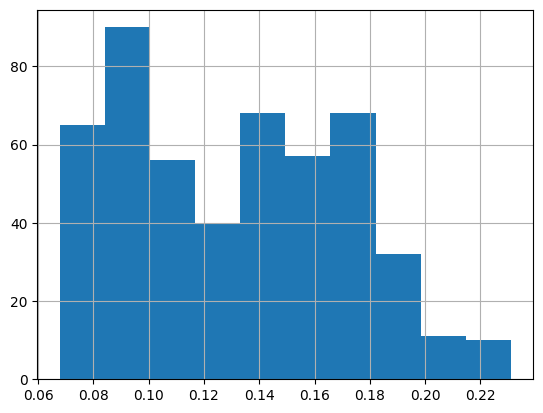

In [ ]:
# Copy of the original data
# Drop the segment_id column for normalization
data_only = signature_df
# Perform row-wise min-max normalization
normalized = data_only.sub(data_only.min(axis=1), axis=0)
normalized = normalized.div(data_only.max(axis=1) - data_only.min(axis=1), axis=0)
# Compute the row-wise mean of the normalized values (single summary value per row)
data_only['signature_score'] = normalized.mean(axis=1)
data_only['signature_score'].hist()

In [ ]:
data_only

accelerometer_x_mean  accelerometer_x_var  \
Segment_ID                                              
chunk_1                -0.048809             1.073057   
chunk_2                 0.004848             1.030136   
chunk_3                -0.042373             1.060350   
chunk_4                -0.000502             0.995854   
chunk_5                 0.016126             1.133468   
...                          ...                  ...   
chunk_493              -0.018524             1.009336   
chunk_494              -0.042013             1.093580   
chunk_495              -0.025538             1.008718   
chunk_496               0.021143             1.049229   
chunk_497               0.015058             0.989935   

            accelerometer_x_entropy  accelerometer_x_skew  \
Segment_ID                                                  
chunk_1                    1.464924             -1.535522   
chunk_2                    1.356212             -1.162686   
chunk_3                    1.469316             -1.588253   
chunk_4                    1.534507             -0.305737   
chunk_5                    1.537399             -1.210435   
...                             ...                   ...   
chunk_493                  1.508458             -1.022727   
chunk_494                  1.630210             -1.101838   
chunk_495                  1.539119             -1.040457   
chunk_496                  1.597659             -1.003289   
chunk_497                  1.756390             -0.619999   

            accelerometer_x_kurt  accelerometer_y_mean  accelerometer_y_var  \
Segment_ID                                                                    
chunk_1                14.175323              0.007695             0.941508   
chunk_2                11.215761              0.011150             1.230038   
chunk_3                15.430067             -0.025674             1.044346   
chunk_4                 5.729667             -0.025785             1.082922   
chunk_5                10.461093              0.024127             1.126231   
...                          ...                   ...                  ...   
chunk_493              10.749180             -0.015546             1.006284   
chunk_494               7.724892             -0.000060             1.269132   
chunk_495               9.422273             -0.025241             0.964569   
chunk_496               7.629646             -0.025799             1.025870   
chunk_497               5.971909              0.012872             1.073523   

            accelerometer_y_entropy  accelerometer_y_skew  \
Segment_ID                                                  
chunk_1                    1.257518              0.986184   
chunk_2                    0.573144              3.290226   
chunk_3                    1.061718              5.009222   
chunk_4                    0.952332              2.565344   
chunk_5                    0.500642              2.291707   
...                             ...                   ...   
chunk_493                  0.706867              1.574747   
chunk_494                  0.696701              2.604790   
chunk_495                  0.706999              2.508446   
chunk_496                  1.091362              2.325992   
chunk_497                  0.943207              3.133339   

            accelerometer_y_kurt  ...  gyroscope_z_min_var  \
Segment_ID                        ...                        
chunk_1                24.417855  ...             0.985285   
chunk_2                41.905673  ...             1.070447   
chunk_3                79.591702  ...             1.037757   
chunk_4                38.081894  ...             1.052715   
chunk_5                41.474682  ...             1.122567   
...                          ...  ...                  ...   
chunk_493              29.177792  ...             0.963741   
chunk_494              42.474181  ...             1.079711   
chunk_495              42.740088  

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Work on a copy of the data
signature_df = data_only.copy()  # Your original DataFrame with 'Segment_ID' and 'signature_score'

import pandas as pd
import numpy as np

# Step 1: Work on a copy and reset index to access 'Segment_ID'
signature_df = data_only.copy().reset_index()  # Brings 'Segment_ID' into the columns

# Step 2: Add signature_id if not present
signature_df = signature_df.reset_index(drop=True)
if 'signature_id' not in signature_df.columns:
    signature_df['signature_id'] = signature_df.index + 1

# Step 3: Define thresholds
thresholds = np.round(np.arange(0.10, 1.00, 0.10), 2)

# Step 4: Prepare result storage
results = []

# Step 5: Loop over thresholds
for threshold in thresholds:
    anomaly_ids = []

    for i in range(len(signature_df) - 1):
        current_score = signature_df.loc[i, 'signature_score']
        next_score = signature_df.loc[i + 1, 'signature_score']
        similarity = 1 - abs(current_score - next_score)

        if similarity < threshold:
            anomaly_ids.append(signature_df.loc[i + 1, 'signature_id'])

    # Identify true anomaly chunks by Segment_ID
    is_anomaly = signature_df['signature_id'].isin(anomaly_ids)
    true_segments = signature_df.loc[is_anomaly, 'Segment_ID'].tolist()

    results.append({
        'threshold': threshold,
        'true_count': len(true_segments),
        'true_segments': true_segments
    })

# Step 6: Convert to DataFrame
results_df = pd.DataFrame(results)

# View
results_df

threshold  true_count                                      true_segments
0        0.1           0                                                 []
1        0.2           0                                                 []
2        0.3           0                                                 []
3        0.4           0                                                 []
4        0.5           0                                                 []
5        0.6           0                                                 []
6        0.7           0                                                 []
7        0.8           0                                                 []
8        0.9          43  [chunk_21, chunk_50, chunk_66, chunk_70, chunk...

In [ ]:
chunk_list= results_df['true_segments'][8]

In [ ]:
from tensorflow.keras.utils import to_categorical

# Chunk list (example)
# chunk_list = ["chunk_3", "chunk_9", "chunk_11", "chunk_33", "chunk_41", "chunk_43"]

# Step 1: Extract chunk_df names
chunk_df_names = []
for chunk in chunk_list:
    try:
        suffix = chunk.split('_')[1]
        chunk_df_name = f"chunk_df{int(suffix)}"
        chunk_df_names.append(chunk_df_name)
    except Exception as e:
        print(f"⚠️ Skipping invalid chunk name: '{chunk}' → Error: {e}")

# Step 2: Define features and target
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']
target = 'activity'

# Step 3: Evaluate all chunks once and collect accuracies
accuracy_results = []  # Stores (chunk_name, accuracy)

for df_name in chunk_df_names:
    try:
        chunk_df = globals()[df_name]

        # Prepare input
        X = chunk_df[features].values
        y = chunk_df[target].values

        X = scaler.fit_transform(X)
        X = X.reshape(-1, len(features), 1)
        y = y.reshape(-1, 1)
        y_categorical = to_categorical(y, num_classes=5)

        loss, accuracy = model.evaluate(X, y_categorical, verbose=0)
        accuracy_results.append((df_name, accuracy))
        print(f"✅ {df_name}: Test Accuracy = {accuracy:.4f}")

    except KeyError:
        print(f"❌ DataFrame '{df_name}' not found.")
    except Exception as e:
        print(f"❌ Error evaluating '{df_name}': {e}")

# Step 4: Check true/false positives for each threshold
thresholds = [0.10,0.20,0.30,0.40,0.50, 0.60, 0.70, 0.90]

print("\n--- Evaluation Summary per Threshold ---")
for threshold in thresholds:
    false_positives = [name for name, acc in accuracy_results if acc >= threshold]
    true_positives = [name for name, acc in accuracy_results if acc < threshold]

    print(f"\nThreshold = {int(threshold * 100)}%")
    print(f"False Positives (accuracy ≥ {threshold:.2f}): {len(false_positives)} → {false_positives}")
    print(f"True Positives (accuracy < {threshold:.2f}): {len(true_positives)} → {true_positives}")

✅ chunk_df21: Test Accuracy = 0.9660
✅ chunk_df50: Test Accuracy = 0.9667
✅ chunk_df66: Test Accuracy = 0.9703
✅ chunk_df70: Test Accuracy = 0.9677
✅ chunk_df92: Test Accuracy = 0.9650
✅ chunk_df100: Test Accuracy = 0.9663
✅ chunk_df107: Test Accuracy = 0.9700
✅ chunk_df115: Test Accuracy = 0.9683
✅ chunk_df130: Test Accuracy = 0.9657
✅ chunk_df142: Test Accuracy = 0.9683
✅ chunk_df155: Test Accuracy = 0.9653
✅ chunk_df156: Test Accuracy = 0.9673
✅ chunk_df157: Test Accuracy = 0.9690
✅ chunk_df169: Test Accuracy = 0.9693
✅ chunk_df170: Test Accuracy = 0.9700
✅ chunk_df180: Test Accuracy = 0.9663
✅ chunk_df192: Test Accuracy = 0.9637
✅ chunk_df199: Test Accuracy = 0.9653
✅ chunk_df220: Test Accuracy = 0.9680
✅ chunk_df249: Test Accuracy = 0.9690
✅ chunk_df265: Test Accuracy = 0.9700
✅ chunk_df280: Test Accuracy = 0.9623
✅ chunk_df299: Test Accuracy = 0.9670
✅ chunk_df306: Test Accuracy = 0.9693
✅ chunk_df314: Test Accuracy = 0.9693
✅ chunk_df319: Test Accuracy = 0.9680
✅ chunk_df341: Te

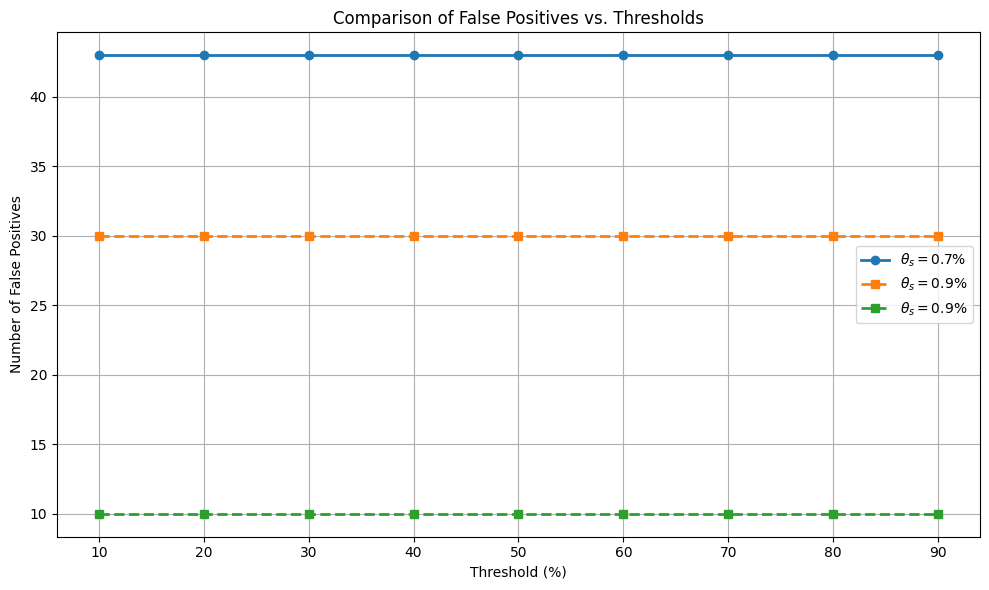

In [ ]:
import matplotlib.pyplot as plt

thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90]

false_positives_1 = [43,43,43,43,43,43,43,43,43]
false_positives_2 = [30,30,30,30,30,30,30,30,30]  # scaled down
false_positives_3 = [10, 10, 10, 10, 10, 10,10, 10, 10]

true_positives = [0, 0, 13, 16, 25, 31, 32, 32, 32]
true_positives_2 = [0, 0, 8, 11, 17, 23, 25, 26, 26]
true_positives_3 = [0, 0, 3, 4, 6, 8, 9, 9, 9]

# Threshold values
thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# Original false positive values
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, false_positives_1, marker='o', linestyle='-', linewidth=2, label=r'$\theta_s = 0.7\%$')
plt.plot(thresholds, false_positives_2, marker='s', linestyle='--', linewidth=2, label=r'$\theta_s = 0.9\%$')
plt.plot(thresholds, false_positives_3, marker='s', linestyle='--', linewidth=2, label=r'$\theta_s = 0.9\%$')
plt.title("Comparison of False Positives vs. Thresholds")
plt.xlabel("Threshold (%)")
plt.ylabel("Number of False Positives")
plt.grid(True)
plt.xticks(thresholds)
plt.legend()
plt.tight_layout()
plt.show()

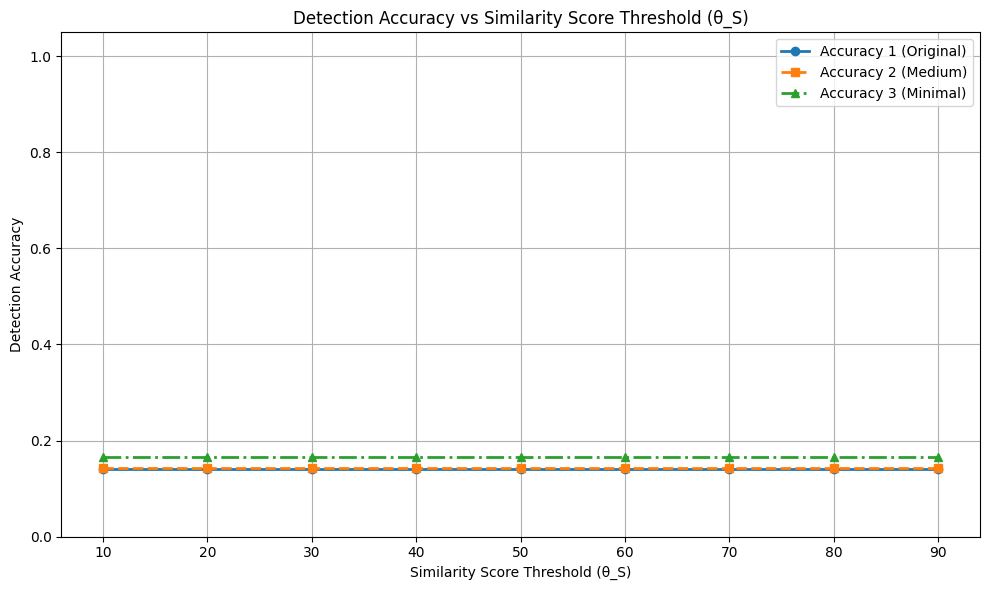

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Thresholds
thresholds = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])

# False Positives and True Positives for three scenarios
false_positives_1 = [43,43,43,43,43,43,43,43,43]
false_positives_2 = [30,30,30,30,30,30,30,30,30]  # scaled down
false_positives_3 = [10, 10, 10, 10, 10, 10,10, 10, 10]

true_positives_1=[7,7,7,7,7,7,7,7,7]
true_positives_2=[5,5,5,5,5,5,5,5,5]
true_positives_3=[2,2,2,2,2,2,2,2,2]

# Accuracy = TP / (TP + FP)
def calculate_accuracy(tp, fp):
    tp = np.array(tp)
    fp = np.array(fp)
    with np.errstate(divide='ignore', invalid='ignore'):
        accuracy = np.where((tp + fp) != 0, tp / (tp + fp), 0.0)
    return accuracy

accuracy_1 = calculate_accuracy(true_positives_1, false_positives_1)
accuracy_2 = calculate_accuracy(true_positives_2, false_positives_2)
accuracy_3 = calculate_accuracy(true_positives_3, false_positives_3)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_1, marker='o', linewidth=2, label="Accuracy 1 (Original)")
plt.plot(thresholds, accuracy_2, marker='s', linestyle='--', linewidth=2, label="Accuracy 2 (Medium)")
plt.plot(thresholds, accuracy_3, marker='^', linestyle='-.', linewidth=2, label="Accuracy 3 (Minimal)")

plt.title("Detection Accuracy vs Similarity Score Threshold (θ_S)")
plt.xlabel("Similarity Score Threshold (θ_S)")
plt.ylabel("Detection Accuracy")
plt.ylim(0, 1.05)
plt.grid(True)
plt.xticks(thresholds)
plt.legend()
plt.tight_layout()
plt.show()

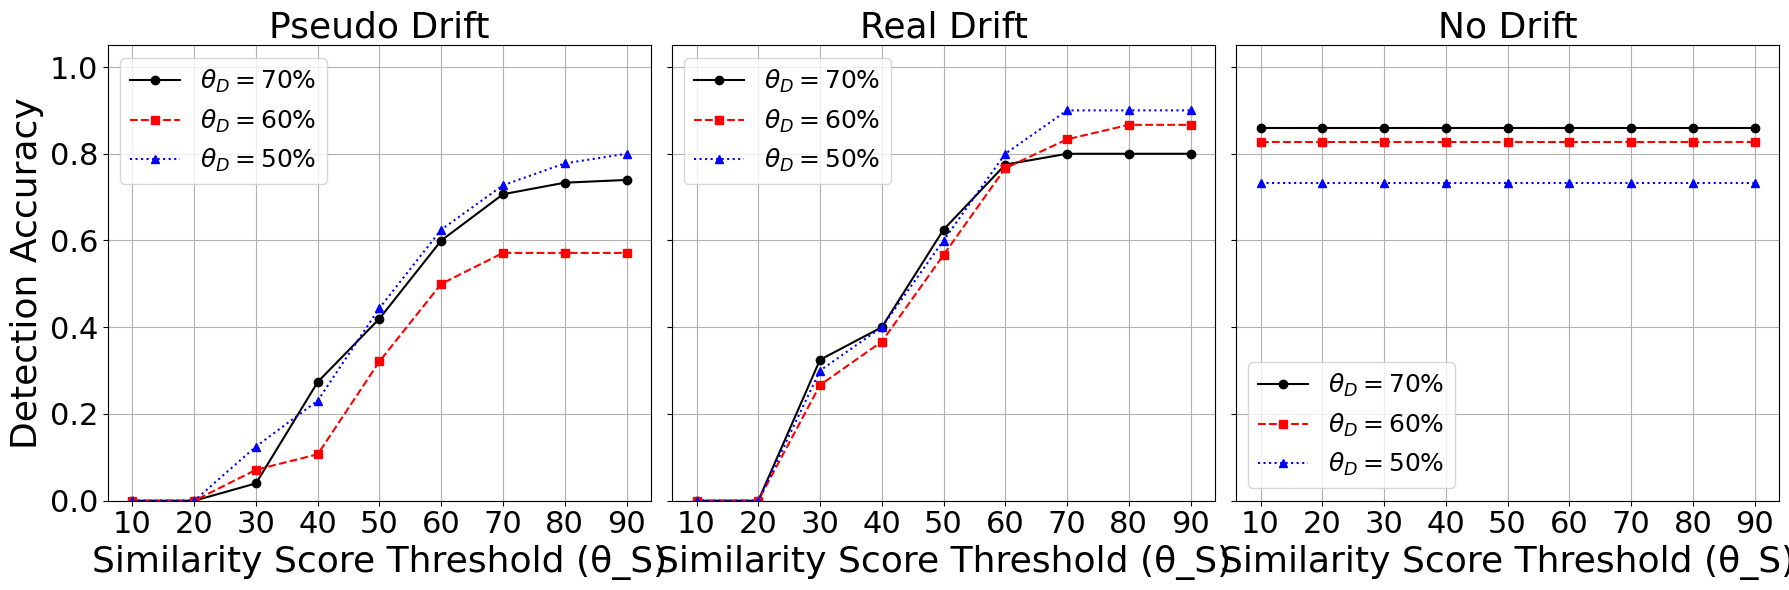

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Similarity score thresholds (θ_S)
thresholds = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])

# --- Detection Accuracy Values ---

# Pseudo Drift
accuracy_pseudo_1 = [0.0, 0.0, 0.04, 0.2738, 0.42, 0.6, 0.7067, 0.7333, 0.7396]
accuracy_pseudo_2 = [0.0, 0.0, 0.0714, 0.1071, 0.3214, 0.5, 0.5714, 0.5714, 0.5714]
accuracy_pseudo_3 = [0.0, 0.0, 0.125, 0.2308, 0.4444, 0.625, 0.7273, 0.7778, 0.8]

# Real Drift
accuracy_real_1 = [0.0, 0.0, 0.325, 0.4, 0.625, 0.775, 0.8, 0.8, 0.8]
accuracy_real_2 = [0.0, 0.0, 0.2667, 0.3667, 0.5667, 0.7667, 0.8333, 0.8667, 0.8667]
accuracy_real_3 = [0.0, 0.0, 0.3, 0.4, 0.6, 0.8, 0.9, 0.9, 0.9]

# No Drift
accuracy_no_1 = [1-0.14] * 9      # TP=7, FP=43
accuracy_no_2 = [1-0.1729] * 9    # TP=5, FP=30
accuracy_no_3 = [1-0.267] * 9    # TP=2, FP=10

# --- Plot Styling ---
styles = [
    {'linestyle': '-',  'marker': 'o', 'color': 'black', 'label': r'$\theta_D = 70\%$'},
    {'linestyle': '--', 'marker': 's', 'color': 'red',   'label': r'$\theta_D = 60\%$'},
    {'linestyle': ':',  'marker': '^', 'color': 'blue',  'label': r'$\theta_D = 50\%$'}
]

# --- Subplot Setup ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

titles = ['Pseudo Drift', 'Real Drift', 'No Drift']
accuracy_sets = [
    (accuracy_pseudo_1, accuracy_pseudo_2, accuracy_pseudo_3),
    (accuracy_real_1, accuracy_real_2, accuracy_real_3),
    (accuracy_no_1, accuracy_no_2, accuracy_no_3)
]

# --- Plotting ---
for i in range(3):
    axs[i].plot(thresholds, accuracy_sets[i][0], **styles[0])
    axs[i].plot(thresholds, accuracy_sets[i][1], **styles[1])
    axs[i].plot(thresholds, accuracy_sets[i][2], **styles[2])
    axs[i].set_title(titles[i], fontsize=26)
    axs[i].set_xticks(thresholds)
    axs[i].set_xticklabels([str(t) for t in thresholds])
    axs[i].tick_params(axis='both', labelsize=22)
    axs[i].legend(fontsize=18)
    axs[i].grid(True)
    axs[i].set_xlabel('Similarity Score Threshold (θ_S)', fontsize=26)
    if i == 0:
        axs[i].set_ylabel('Detection Accuracy', fontsize=26)
    axs[i].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

In [ ]:
thresholds = [0.50, 0.60, 0.70]
Similiaity= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
false_positives1_70= [3,7,9,12,14,18,24,27,34,43]
false_positives2_60= [1,3,5,8,10,13,17,20,22,23]
false_positives3_50= [1,2,4,6,7,9,11,12,14,15]


Summary: 43 passed (>= 70%), 0 failed (< 70%)


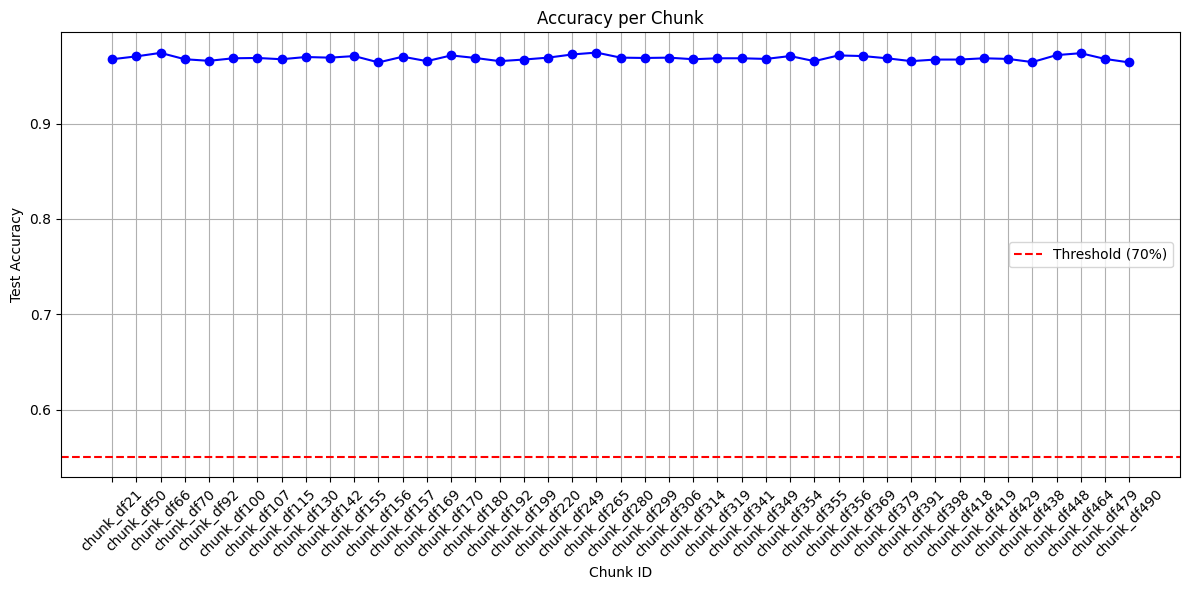

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Your chunk list
# chunk_list = ["chunk_3", "chunk_9", "chunk_11", "chunk_33", "chunk_41", "chunk_43"]

# Extract corresponding chunk_df names
chunk_df_names = []
for chunk in chunk_list:
    try:
        suffix = chunk.split('_')[1]
        chunk_df_name = f"chunk_df{int(suffix)}"
        chunk_df_names.append(chunk_df_name)
    except Exception as e:
        print(f"⚠️ Skipping invalid chunk name: '{chunk}' → Error: {e}")

# Define features and target
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']
target = 'activity'

# Store results for analysis
accuracy_results = []       # Stores (chunk_name, accuracy)
binary_results = []         # Stores 0 or 1 based on threshold

# Evaluation loop
for df_name in chunk_df_names:
    try:
        chunk_df = globals()[df_name]

        # Prepare input
        X = chunk_df[features].values
        y = chunk_df[target].values

        X = scaler.fit_transform(X)
        X = X.reshape(-1, len(features), 1)
        y = y.reshape(-1, 1)
        y_categorical = to_categorical(y, num_classes=5)

        loss, accuracy = model.evaluate(X, y_categorical, verbose=0)
        #print(f"✅ {df_name}: Test Accuracy = {accuracy:.4f}")

        accuracy_results.append((df_name, accuracy))
        binary_results.append(1 if accuracy >= 0.55 else 0)

    except KeyError:
        print(f"❌ DataFrame '{df_name}' not found.")
    except Exception as e:
        print(f"❌ Error evaluating '{df_name}': {e}")

# Summary
num_pass = binary_results.count(1)
num_fail = binary_results.count(0)
print(f"\nSummary: {num_pass} passed (>= 70%), {num_fail} failed (< 70%)")

# Plotting
if accuracy_results:
    chunk_ids = [name for name, _ in accuracy_results]
    accuracies = [acc for _, acc in accuracy_results]

    plt.figure(figsize=(12, 6))
    plt.plot(chunk_ids, accuracies, marker='o', linestyle='-', color='blue')
    plt.axhline(y=0.55, color='red', linestyle='--', label='Threshold (70%)')
    plt.xticks(rotation=45)
    plt.xlabel('Chunk ID')
    plt.ylabel('Test Accuracy')
    plt.title('Accuracy per Chunk')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

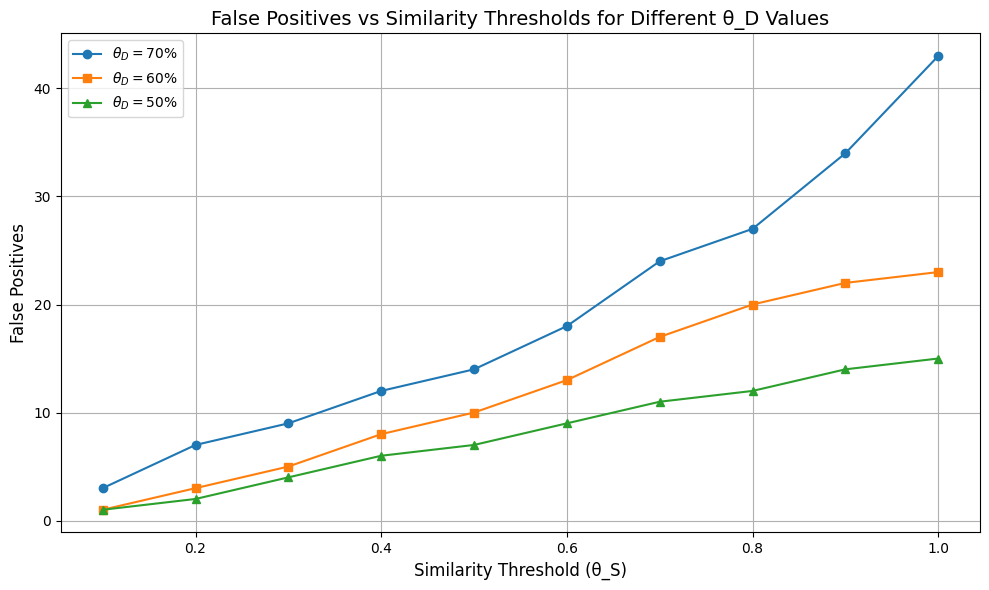

In [ ]:
import matplotlib.pyplot as plt

# Data
similarity = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
false_positives1_70 = [3, 7, 9, 12, 14, 18, 24, 27, 34, 43]
false_positives2_60 = [1, 3, 5, 8, 10, 13, 17, 20, 22, 23]
false_positives3_50 = [1, 2, 4, 6, 7, 9, 11, 12, 14, 15]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(similarity, false_positives1_70, marker='o', label=r'$\theta_D = 70\%$')
plt.plot(similarity, false_positives2_60, marker='s', label=r'$\theta_D = 60\%$')
plt.plot(similarity, false_positives3_50, marker='^', label=r'$\theta_D = 50\%$')

plt.xlabel('Similarity Threshold (θ_S)', fontsize=12)
plt.ylabel('False Positives', fontsize=12)
plt.title('False Positives vs Similarity Thresholds for Different θ_D Values', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

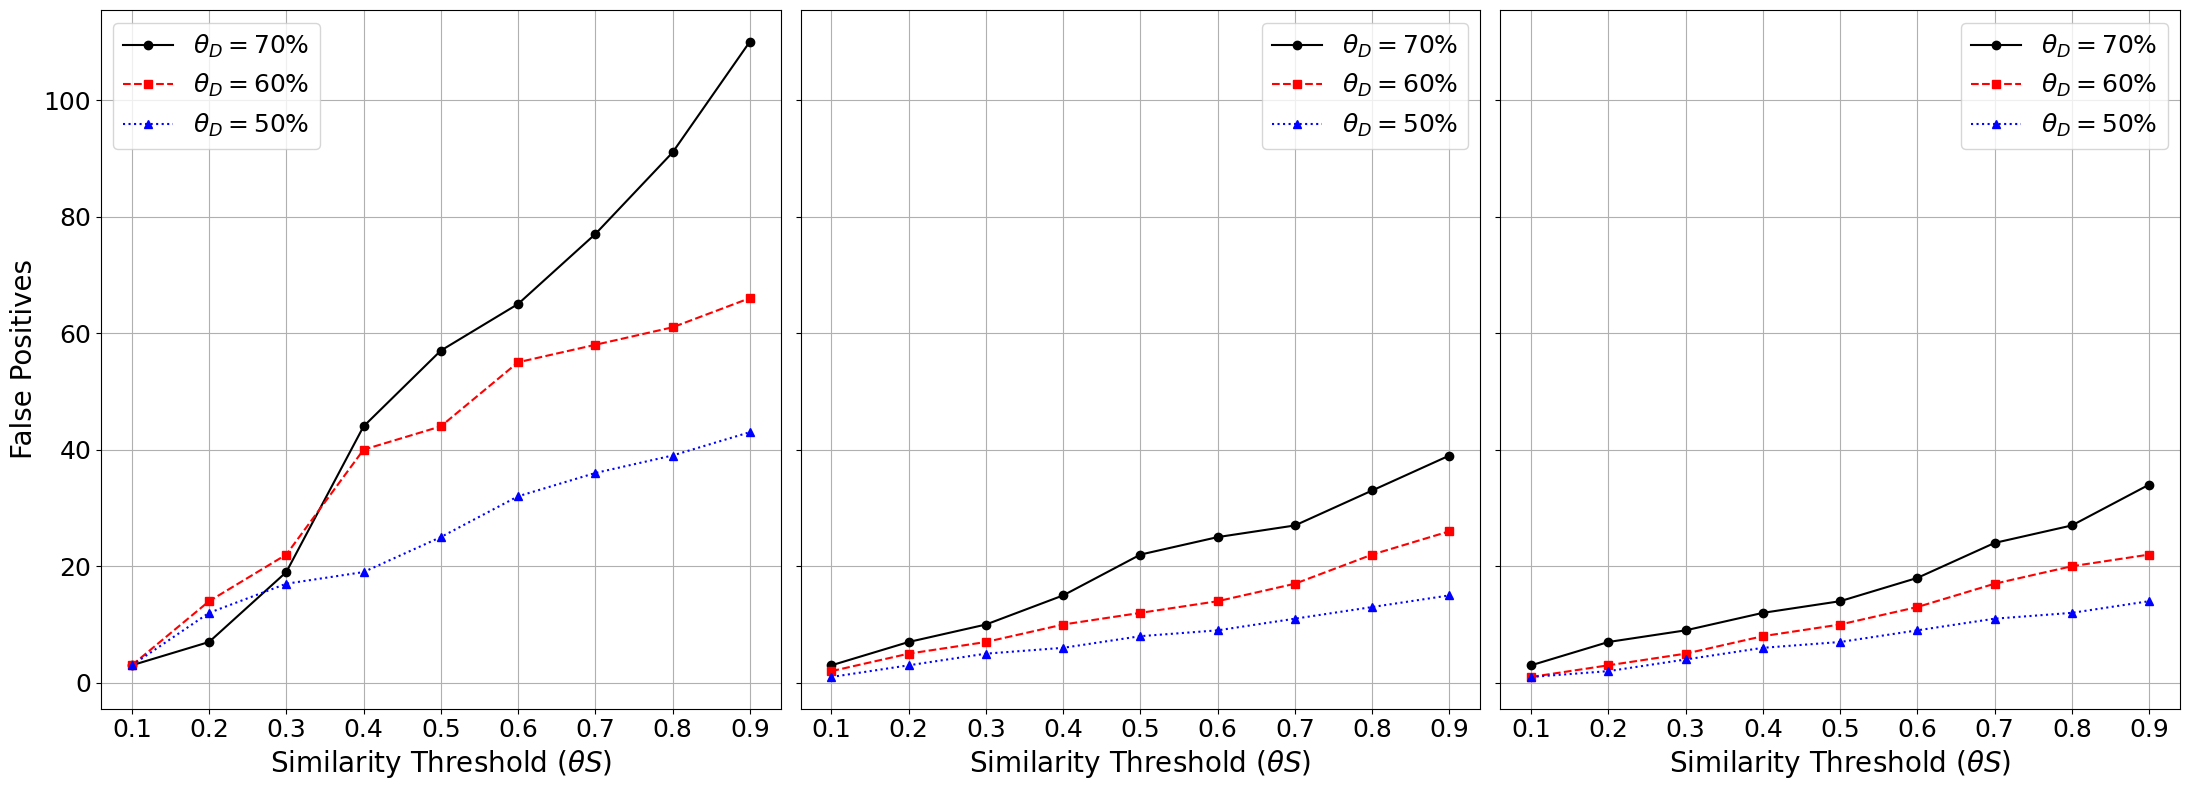

In [ ]:
import matplotlib.pyplot as plt

# Common similarity values
similarity = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Plot 1 Data
fp1_70_1 = [3, 7, 19, 44, 57, 65, 77, 91, 110]
fp2_60_1 = [3, 14, 22, 40, 44, 55, 58, 61, 66]
fp3_50_1 = [3, 12, 17, 19, 25, 32, 36, 39, 43]

# Plot 2 Data
fp1_70_2 = [3, 7, 10, 15, 22, 25, 27, 33, 39]
fp2_60_2 = [2, 5, 7, 10, 12, 14, 17, 22, 26]
fp3_50_2 = [1, 3, 5, 6, 8, 9, 11, 13, 15]

# Plot 3 Data
fp1_70_3 = [3, 7, 9, 12, 14, 18, 24, 27, 34]
fp2_60_3 = [1, 3, 5, 8, 10, 13, 17, 20, 22]
fp3_50_3 = [1, 2, 4, 6, 7, 9, 11, 12, 14]

# Styling for consistent publication appearance
styles = [
    {'linestyle': '-',  'marker': 'o', 'color': 'black'},
    {'linestyle': '--', 'marker': 's', 'color': 'red'},
    {'linestyle': ':',  'marker': '^', 'color': 'blue'}
]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(22, 8), sharey=True)

# Plot 1
axs[0].plot(similarity, fp1_70_1, label=r'$\theta_D = 70\%$', **styles[0])
axs[0].plot(similarity, fp2_60_1, label=r'$\theta_D = 60\%$', **styles[1])
axs[0].plot(similarity, fp3_50_1, label=r'$\theta_D = 50\%$', **styles[2])
axs[0].set_xlabel(r'Similarity Threshold $(\theta S)$', fontsize=20)
axs[0].set_ylabel('False Positives', fontsize=20)
axs[0].tick_params(axis='both', labelsize=18)
axs[0].legend(fontsize=18)
axs[0].grid(True)

# Plot 2
axs[1].plot(similarity, fp1_70_2, label=r'$\theta_D = 70\%$', **styles[0])
axs[1].plot(similarity, fp2_60_2, label=r'$\theta_D = 60\%$', **styles[1])
axs[1].plot(similarity, fp3_50_2, label=r'$\theta_D = 50\%$', **styles[2])
axs[1].set_xlabel(r'Similarity Threshold $(\theta S)$', fontsize=20)
axs[1].tick_params(axis='both', labelsize=18)
axs[1].legend(fontsize=18)
axs[1].grid(True)

# Plot 3
axs[2].plot(similarity, fp1_70_3, label=r'$\theta_D = 70\%$', **styles[0])
axs[2].plot(similarity, fp2_60_3, label=r'$\theta_D = 60\%$', **styles[1])
axs[2].plot(similarity, fp3_50_3, label=r'$\theta_D = 50\%$', **styles[2])
axs[2].set_xlabel(r'Similarity Threshold $(\theta S)$', fontsize=20)
axs[2].tick_params(axis='both', labelsize=18)
axs[2].legend(fontsize=18)
axs[2].grid(True)

plt.tight_layout()
plt.show()

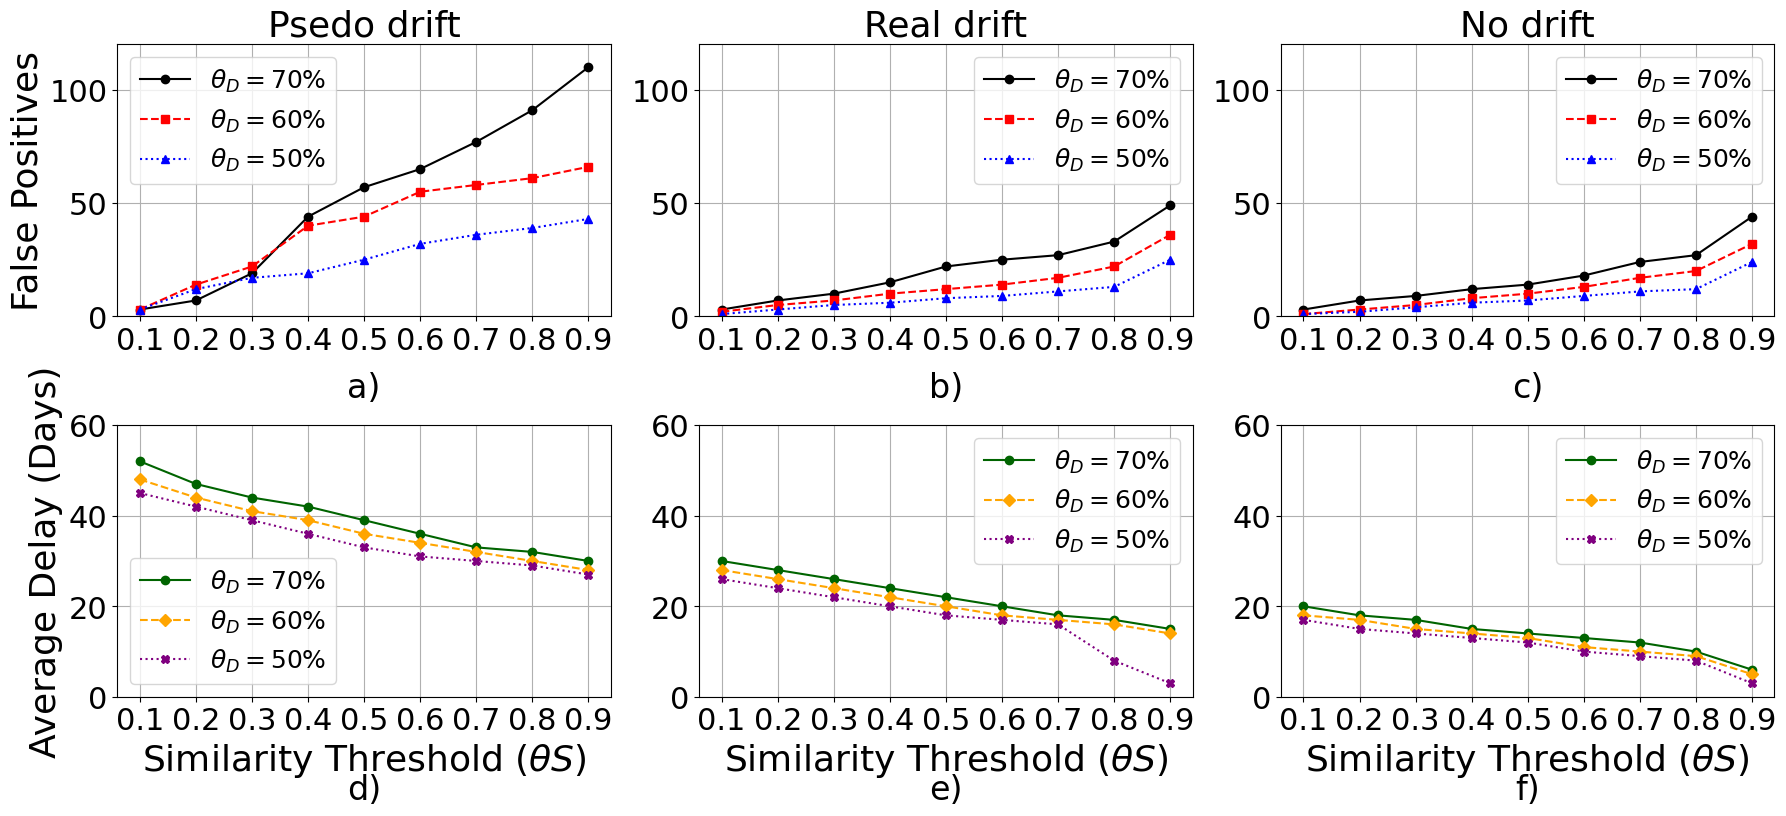

In [ ]:
import matplotlib.pyplot as plt

# Common similarity values
similarity = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Top Row (False Positives)
fp1_70_1 = [3, 7, 19, 44, 57, 65, 77, 91, 110]
fp2_60_1 = [3, 14, 22, 40, 44, 55, 58, 61, 66]
fp3_50_1 = [3, 12, 17, 19, 25, 32, 36, 39, 43]

fp1_70_2 = [3, 7, 10, 15, 22, 25, 27, 33, 49]
fp2_60_2 = [2, 5, 7, 10, 12, 14, 17, 22, 36]
fp3_50_2 = [1, 3, 5, 6, 8, 9, 11, 13, 25]

fp1_70_3 = [3, 7, 9, 12, 14, 18, 24, 27, 44]
fp2_60_3 = [1, 3, 5, 8, 10, 13, 17, 20, 32]
fp3_50_3 = [1, 2, 4, 6, 7, 9, 11, 12, 24]

# Bottom Row (Delays, reordered)
pseudo_70 = [52, 47, 44, 42, 39, 36, 33, 32, 30]
pseudo_60 = [48, 44, 41, 39, 36, 34, 32, 30, 28]
pseudo_50 = [45, 42, 39, 36, 33, 31, 30, 29, 27]

real_50 = [30, 28, 26, 24, 22, 20, 18, 17, 15]
real_60 = [28, 26, 24, 22, 20, 18, 17, 16, 14]
real_70 = [26, 24, 22, 20, 18, 17, 16, 8, 3]

no_50 = [20, 18, 17, 15, 14, 13, 12, 10, 6]
no_60 = [18, 17, 15, 14, 13, 11, 10, 9, 5]
no_70 = [17, 15, 14, 13, 12, 10, 9, 8, 3]

# Styling
styles = [
    {'linestyle': '-',  'marker': 'o', 'color': 'black'},
    {'linestyle': '--', 'marker': 's', 'color': 'red'},
    {'linestyle': ':',  'marker': '^', 'color': 'blue'}
]

delay_styles = [
    {'linestyle': '-',  'marker': 'o', 'color': 'darkgreen'},
    {'linestyle': '--', 'marker': 'D', 'color': 'orange'},
    {'linestyle': ':',  'marker': 'X', 'color': 'purple'}
]

# Create 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(18, 8), sharey=False)

# Top row - false positives
axs[0, 0].plot(similarity, fp1_70_1, label=r'$\theta_D = 70\%$', **styles[0])
axs[0, 0].plot(similarity, fp2_60_1, label=r'$\theta_D = 60\%$', **styles[1])
axs[0, 0].plot(similarity, fp3_50_1, label=r'$\theta_D = 50\%$', **styles[2])
axs[0, 0].set_title('Psedo drift', fontsize=26)
axs[0, 0].set_ylabel('False Positives', fontsize=26)
axs[0, 0].set_ylim(0, 120)
axs[0, 0].set_xticks(similarity)
axs[0, 0].set_xticklabels([str(s) for s in similarity])
axs[0, 0].tick_params(axis='both', labelsize=22)
axs[0, 0].legend(fontsize=18)
axs[0, 0].grid(True)

axs[0, 1].plot(similarity, fp1_70_2, label=r'$\theta_D = 70\%$', **styles[0])
axs[0, 1].plot(similarity, fp2_60_2, label=r'$\theta_D = 60\%$', **styles[1])
axs[0, 1].plot(similarity, fp3_50_2, label=r'$\theta_D = 50\%$', **styles[2])
axs[0, 1].set_ylim(0, 120)
axs[0, 1].set_title('Real drift', fontsize=26)
axs[0, 1].set_xticks(similarity)
axs[0, 1].set_xticklabels([str(s) for s in similarity])
axs[0, 1].tick_params(axis='both', labelsize=22)
axs[0, 1].legend(fontsize=18)
axs[0, 1].grid(True)

axs[0, 2].plot(similarity, fp1_70_3, label=r'$\theta_D = 70\%$', **styles[0])
axs[0, 2].plot(similarity, fp2_60_3, label=r'$\theta_D = 60\%$', **styles[1])
axs[0, 2].plot(similarity, fp3_50_3, label=r'$\theta_D = 50\%$', **styles[2])
axs[0, 2].set_ylim(0, 120)
axs[0, 2].set_title('No drift', fontsize=26)
axs[0, 2].set_xticks(similarity)
axs[0, 2].set_xticklabels([str(s) for s in similarity])
axs[0, 2].tick_params(axis='both', labelsize=22)
axs[0, 2].legend(fontsize=18)
axs[0, 2].grid(True)

# Bottom row - delay curves (with fixed y-limit)
axs[1, 0].plot(similarity, pseudo_70, label=r'$\theta_D = 70\%$', **delay_styles[0])
axs[1, 0].plot(similarity, pseudo_60, label=r'$\theta_D = 60\%$', **delay_styles[1])
axs[1, 0].plot(similarity, pseudo_50, label=r'$\theta_D = 50\%$', **delay_styles[2])
axs[1, 0].set_xlabel(r'Similarity Threshold $(\theta S)$', fontsize=26)
axs[1, 0].set_ylabel('Average Delay (Days)', fontsize=26)
axs[1, 0].set_ylim(0, 60)
axs[1, 0].set_xticks(similarity)
axs[1, 0].set_xticklabels([str(s) for s in similarity])
axs[1, 0].tick_params(axis='both', labelsize=22)
axs[1, 0].legend(fontsize=18)
axs[1, 0].grid(True)

axs[1, 1].plot(similarity, real_50, label=r'$\theta_D = 70\%$', **delay_styles[0])
axs[1, 1].plot(similarity, real_60, label=r'$\theta_D = 60\%$', **delay_styles[1])
axs[1, 1].plot(similarity, real_70, label=r'$\theta_D = 50\%$', **delay_styles[2])
axs[1, 1].set_xlabel(r'Similarity Threshold $(\theta S)$', fontsize=26)
axs[1, 1].set_ylim(0, 60)
axs[1, 1].set_xticks(similarity)
axs[1, 1].set_xticklabels([str(s) for s in similarity])
axs[1, 1].tick_params(axis='both', labelsize=22)
axs[1, 1].legend(fontsize=18)
axs[1, 1].grid(True)

axs[1, 2].plot(similarity, no_50, label=r'$\theta_D = 70\%$', **delay_styles[0])
axs[1, 2].plot(similarity, no_60, label=r'$\theta_D = 60\%$', **delay_styles[1])
axs[1, 2].plot(similarity, no_70, label=r'$\theta_D = 50\%$', **delay_styles[2])
axs[1, 2].set_xlabel(r'Similarity Threshold $(\theta S)$', fontsize=26)
axs[1, 2].set_ylim(0, 60)
axs[1, 2].set_xticks(similarity)
axs[1, 2].set_xticklabels([str(s) for s in similarity])
axs[1, 2].tick_params(axis='both', labelsize=22)
axs[1, 2].legend(fontsize=18)
axs[1, 2].grid(True)

# Adjust layout and add more space for labels under top row
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

# Add subplot labels (a, b, c, d, e, f) below each plot with adjusted vertical positions
subplot_labels = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']

for idx, (ax, label) in enumerate(zip(axs.flat, subplot_labels)):
    y_offset = -0.20 if idx < 3 else -0.28  # top row vs bottom row
    ax.text(0.5, y_offset, label, transform=ax.transAxes,
            fontsize=24, ha='center', va='top')

plt.show()

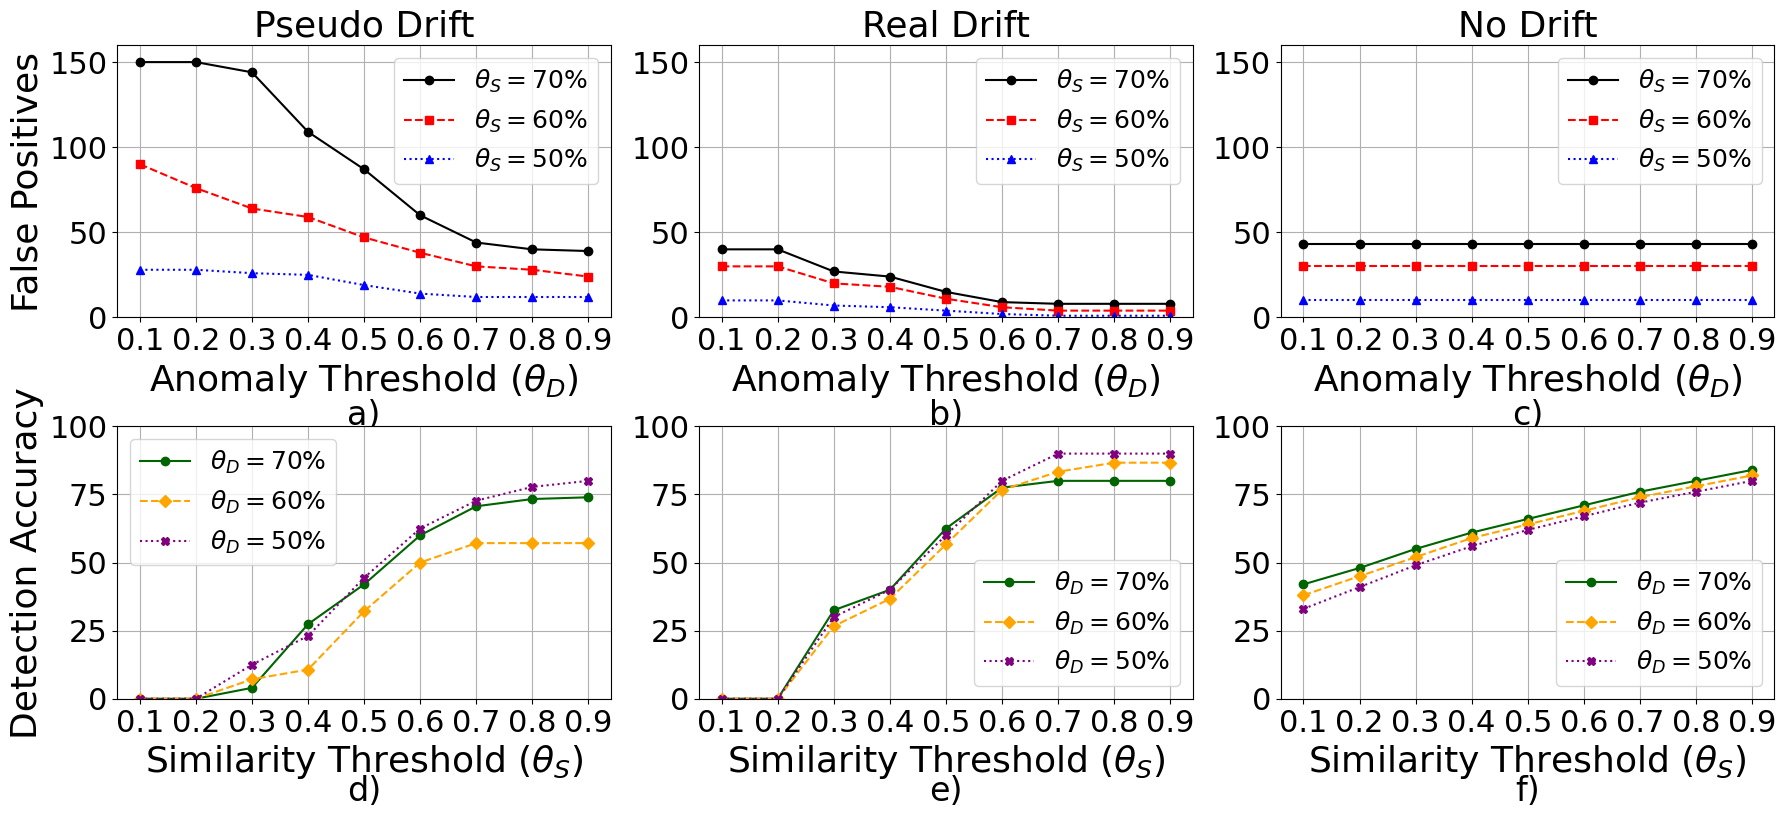

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Similarity thresholds (θ_S)
similarity = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# --- Top Row: False Positives Data ---

# Pseudo Drift
fp_pseudo_70 = [150, 150, 144, 109, 87, 60, 44, 40, 39]
fp_pseudo_60 = [90, 76, 64, 59, 47, 38, 30, 28, 24]
fp_pseudo_50 = [28, 28, 26, 25, 19, 14, 12, 12, 12]

# Real Drift
fp_real_70 = [40, 40, 27, 24, 15, 9, 8, 8, 8]
fp_real_60 = [30, 30, 20, 18, 11, 6, 4, 4, 4]
fp_real_50 = [10, 10, 7, 6, 4, 2, 1, 1, 1]

# No Drift
fp_no_70 = [43] * 9
fp_no_60 = [30] * 9
fp_no_50 = [10] * 9

# --- Bottom Row: Detection Accuracy Data ---


acc_pseudo_70 = [0.0, 0.0, 4.0, 27.38, 42.0, 60.0, 70.67, 73.33, 73.96]
acc_pseudo_60 = [0.0, 0.0, 7.14, 10.71, 32.14, 50.0, 57.14, 57.14, 57.14]
acc_pseudo_50 = [0.0, 0.0, 12.5, 23.08, 44.44, 62.5, 72.73, 77.78, 80.0]

# Real Drift
acc_real_70 = [0.0, 0.0, 32.5, 40.0, 62.5, 77.5, 80.0, 80.0, 80.0]
acc_real_60 = [0.0, 0.0, 26.67, 36.67, 56.67, 76.67, 83.33, 86.67, 86.67]
acc_real_50 = [0.0, 0.0, 30.0, 40.0, 60.0, 80.0, 90.0, 90.0, 90.0]
# No Drift
#acc_no_70 = [0.14] * 9
#acc_no_60 = [0.1429] * 9
#acc_no_50 = [0.1667] * 9


acc_no_70 = [42.0, 48.0, 55.0, 61.0, 66.0, 71.0, 76.0, 80.0, 84.0]
acc_no_60= [38.0, 45.0, 52.0, 59.0, 64.0, 69.0, 74.0, 78.0, 82.0]
acc_no_50  = [33.0, 41.0, 49.0, 56.0, 62.0, 67.0, 72.0, 76.0, 80.0]


# --- Line Styles ---
fp_styles = [
    {'linestyle': '-',  'marker': 'o', 'color': 'black', 'label': r'$\theta_S = 70\%$'},
    {'linestyle': '--', 'marker': 's', 'color': 'red',   'label': r'$\theta_S = 60\%$'},
    {'linestyle': ':',  'marker': '^', 'color': 'blue',  'label': r'$\theta_S = 50\%$'}
]

acc_styles = [
    {'linestyle': '-',  'marker': 'o', 'color': 'darkgreen', 'label': r'$\theta_D = 70\%$'},
    {'linestyle': '--', 'marker': 'D', 'color': 'orange',    'label': r'$\theta_D = 60\%$'},
    {'linestyle': ':',  'marker': 'X', 'color': 'purple',    'label': r'$\theta_D = 50\%$'}
]

# --- Create 2x3 Subplot Grid ---
fig, axs = plt.subplots(2, 3, figsize=(18, 8), sharey=False)

# --- Top Row: False Positives ---
axs[0, 0].plot(similarity, fp_pseudo_70, **fp_styles[0])
axs[0, 0].plot(similarity, fp_pseudo_60, **fp_styles[1])
axs[0, 0].plot(similarity, fp_pseudo_50, **fp_styles[2])
axs[0, 0].set_title('Pseudo Drift', fontsize=26)
axs[0, 0].set_ylabel('False Positives', fontsize=26)
axs[0, 0].set_xlabel(r'Anomaly Threshold $(\theta_D)$', fontsize=26)
axs[0, 0].set_ylim(0, 160)
axs[0, 0].legend(fontsize=18)
axs[0, 0].grid(True)

axs[0, 1].plot(similarity, fp_real_70, **fp_styles[0])
axs[0, 1].plot(similarity, fp_real_60, **fp_styles[1])
axs[0, 1].plot(similarity, fp_real_50, **fp_styles[2])
axs[0, 1].set_title('Real Drift', fontsize=26)
axs[0, 1].set_xlabel(r'Anomaly Threshold $(\theta_D)$', fontsize=26)
axs[0, 1].set_ylim(0, 160)
axs[0, 1].legend(fontsize=18)
axs[0, 1].grid(True)

axs[0, 2].plot(similarity, fp_no_70, **fp_styles[0])
axs[0, 2].plot(similarity, fp_no_60, **fp_styles[1])
axs[0, 2].plot(similarity, fp_no_50, **fp_styles[2])
axs[0, 2].set_title('No Drift', fontsize=26)
axs[0, 2].set_xlabel(r'Anomaly Threshold $(\theta_D)$', fontsize=26)
axs[0, 2].set_ylim(0, 160)
axs[0, 2].legend(fontsize=18)
axs[0, 2].grid(True)

# --- Bottom Row: Detection Accuracy ---
axs[1, 0].plot(similarity, acc_pseudo_70, **acc_styles[0])
axs[1, 0].plot(similarity, acc_pseudo_60, **acc_styles[1])
axs[1, 0].plot(similarity, acc_pseudo_50, **acc_styles[2])
axs[1, 0].set_xlabel(r'Similarity Threshold $(\theta_S)$', fontsize=26)
axs[1, 0].set_ylabel('Detection Accuracy', fontsize=26)
axs[1, 0].set_ylim(0, 100)
axs[1, 0].legend(fontsize=18)
axs[1, 0].grid(True)

axs[1, 1].plot(similarity, acc_real_70, **acc_styles[0])
axs[1, 1].plot(similarity, acc_real_60, **acc_styles[1])
axs[1, 1].plot(similarity, acc_real_50, **acc_styles[2])
axs[1, 1].set_xlabel(r'Similarity Threshold $(\theta_S)$', fontsize=26)
axs[1, 1].set_ylim(0, 100)
axs[1, 1].legend(fontsize=18)
axs[1, 1].grid(True)

axs[1, 2].plot(similarity, acc_no_70, **acc_styles[0])
axs[1, 2].plot(similarity, acc_no_60, **acc_styles[1])
axs[1, 2].plot(similarity, acc_no_50, **acc_styles[2])
axs[1, 2].set_xlabel(r'Similarity Threshold $(\theta_S)$', fontsize=26)
axs[1, 2].set_ylim(0, 100)
axs[1, 2].legend(fontsize=18)
axs[1, 2].grid(True)

# --- Global Styling ---
for ax_row in axs:
    for ax in ax_row:
        ax.set_xticks(similarity)
        ax.set_xticklabels([str(s) for s in similarity])
        ax.tick_params(axis='both', labelsize=22)



plt.tight_layout()
plt.subplots_adjust(hspace=0.4, bottom=0.12)

# Subplot labels
subplot_labels = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']

for idx, (ax, label) in enumerate(zip(axs.flat, subplot_labels)):
    if idx < 3:  # top row
        y_offset = -0.30  # lower to make space under x-axis label
    else:        # bottom row
        y_offset = -0.28
    ax.text(0.5, y_offset, label, transform=ax.transAxes,
            fontsize=24, ha='center', va='top')

plt.show()

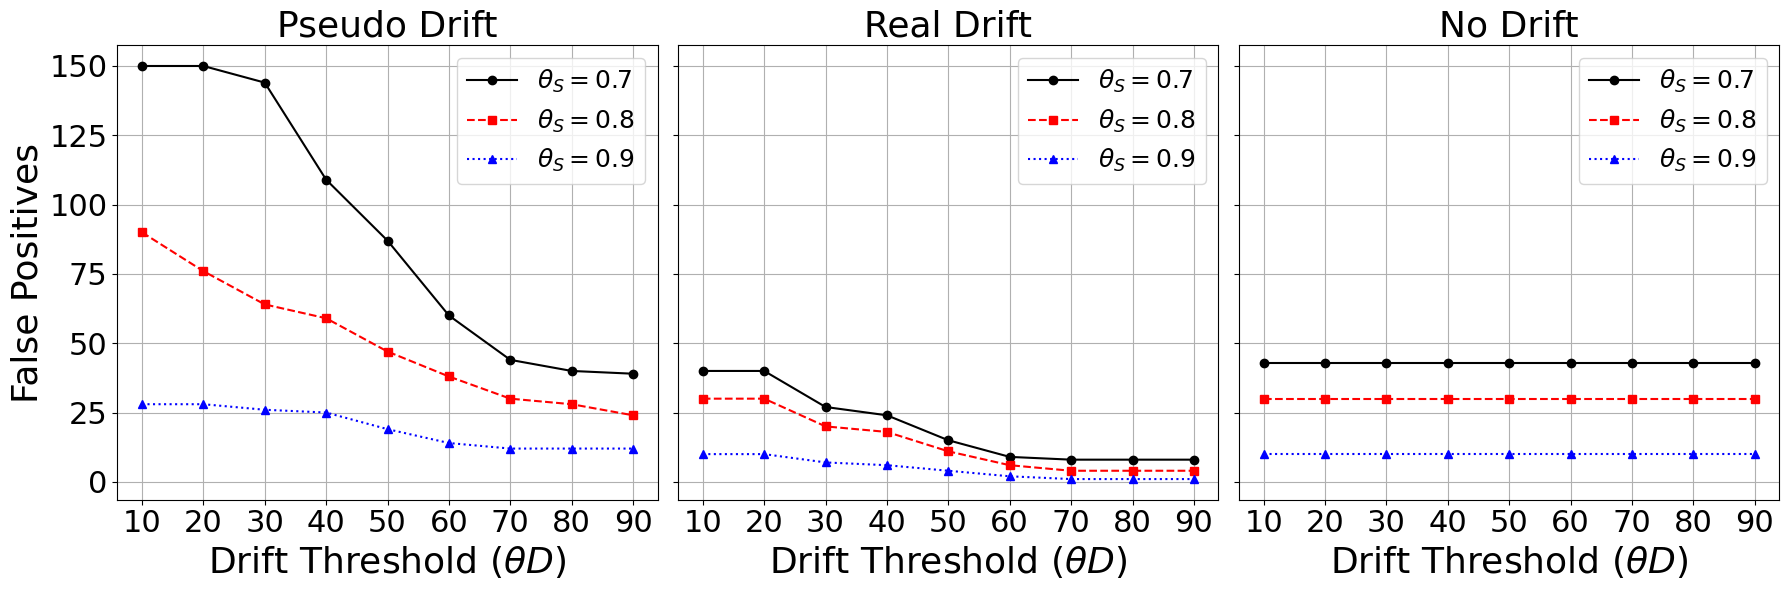

In [ ]:
import matplotlib.pyplot as plt

# Thresholds
thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Data: False positives
pseudo_fp1 = [150, 150, 144, 109, 87, 60, 44, 40, 39]
pseudo_fp2 = [90, 76, 64, 59, 47, 38, 30, 28, 24]
pseudo_fp3 = [28, 28, 26, 25, 19, 14, 12, 12, 12]

real_fp1 = [40, 40, 27, 24, 15, 9, 8, 8, 8]
real_fp2 = [30, 30, 20, 18, 11, 6, 4, 4, 4]
real_fp3 = [10, 10, 7, 6, 4, 2, 1, 1, 1]

no_fp1 = [43, 43, 43, 43, 43, 43, 43, 43, 43]
no_fp2 = [30, 30, 30, 30, 30, 30, 30, 30, 30]
no_fp3 = [10, 10, 10, 10, 10, 10, 10, 10, 10]

# Line styles
styles = [
    {'linestyle': '-',  'marker': 'o', 'color': 'black'},
    {'linestyle': '--', 'marker': 's', 'color': 'red'},
    {'linestyle': ':',  'marker': '^', 'color': 'blue'}
]

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Titles
titles = ['Pseudo Drift', 'Real Drift', 'No Drift']
data_sets = [
    (pseudo_fp1, pseudo_fp2, pseudo_fp3),
    (real_fp1, real_fp2, real_fp3),
    (no_fp1, no_fp2, no_fp3)
]

# Plot each subplot
for i in range(3):
    axs[i].plot(thresholds, data_sets[i][0], label=r'$\theta_S = 0.7$', **styles[0])
    axs[i].plot(thresholds, data_sets[i][1], label=r'$\theta_S = 0.8$', **styles[1])
    axs[i].plot(thresholds, data_sets[i][2], label=r'$\theta_S = 0.9$', **styles[2])
    axs[i].set_title(titles[i], fontsize=26)
    axs[i].set_xticks(thresholds)
    axs[i].set_xticklabels([str(t) for t in thresholds])
    axs[i].tick_params(axis='both', labelsize=22)
    axs[i].legend(fontsize=18)
    axs[i].grid(True)
    if i == 0:
        axs[i].set_ylabel('False Positives', fontsize=26)
    axs[i].set_xlabel(r'Drift Threshold $(\theta D)$', fontsize=26)

plt.tight_layout()
plt.show()

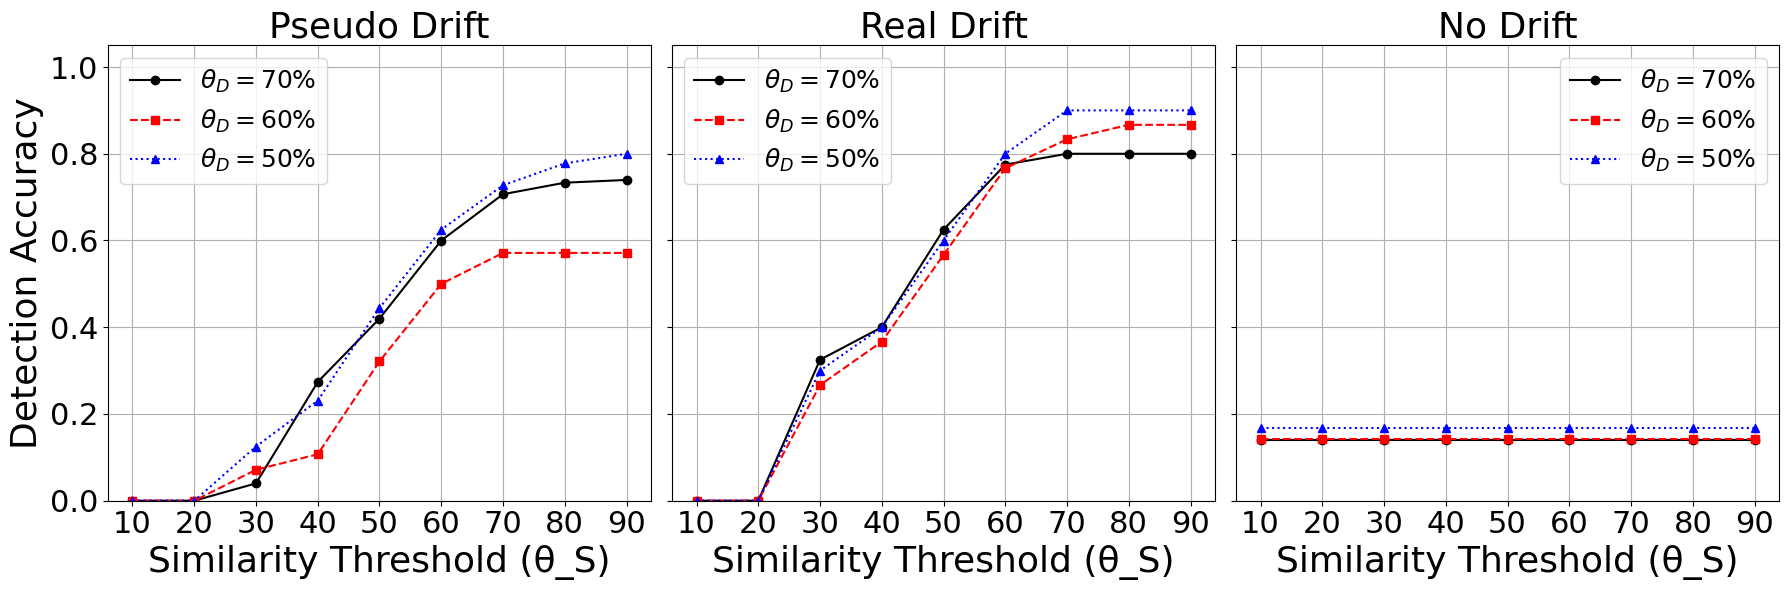

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Similarity score thresholds (θ_S)
thresholds = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])

# --- Detection Accuracy Values ---

# Pseudo Drift
accuracy_pseudo_1 = [0.0, 0.0, 0.04, 0.2738, 0.42, 0.6, 0.7067, 0.7333, 0.7396]
accuracy_pseudo_2 = [0.0, 0.0, 0.0714, 0.1071, 0.3214, 0.5, 0.5714, 0.5714, 0.5714]
accuracy_pseudo_3 = [0.0, 0.0, 0.125, 0.2308, 0.4444, 0.625, 0.7273, 0.7778, 0.8]

# Real Drift
accuracy_real_1 = [0.0, 0.0, 0.325, 0.4, 0.625, 0.775, 0.8, 0.8, 0.8]
accuracy_real_2 = [0.0, 0.0, 0.2667, 0.3667, 0.5667, 0.7667, 0.8333, 0.8667, 0.8667]
accuracy_real_3 = [0.0, 0.0, 0.3, 0.4, 0.6, 0.8, 0.9, 0.9, 0.9]

# No Drift
accuracy_no_1 = [0.14] * 9      # TP=7, FP=43
accuracy_no_2 = [0.1429] * 9    # TP=5, FP=30
accuracy_no_3 = [0.1667] * 9    # TP=2, FP=10

# --- Plot Styling ---
styles = [
    {'linestyle': '-',  'marker': 'o', 'color': 'black', 'label': r'$\theta_D = 70\%$'},
    {'linestyle': '--', 'marker': 's', 'color': 'red',   'label': r'$\theta_D = 60\%$'},
    {'linestyle': ':',  'marker': '^', 'color': 'blue',  'label': r'$\theta_D = 50\%$'}
]

# --- Subplot Setup ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

titles = ['Pseudo Drift', 'Real Drift', 'No Drift']
accuracy_sets = [
    (accuracy_pseudo_1, accuracy_pseudo_2, accuracy_pseudo_3),
    (accuracy_real_1, accuracy_real_2, accuracy_real_3),
    (accuracy_no_1, accuracy_no_2, accuracy_no_3)
]

# --- Plotting ---
for i in range(3):
    axs[i].plot(thresholds, accuracy_sets[i][0], **styles[0])
    axs[i].plot(thresholds, accuracy_sets[i][1], **styles[1])
    axs[i].plot(thresholds, accuracy_sets[i][2], **styles[2])
    axs[i].set_title(titles[i], fontsize=26)
    axs[i].set_xticks(thresholds)
    axs[i].set_xticklabels([str(t) for t in thresholds])
    axs[i].tick_params(axis='both', labelsize=22)
    axs[i].legend(fontsize=18)
    axs[i].grid(True)
    axs[i].set_xlabel('Similarity Threshold (θS)', fontsize=26)
    if i == 0:
        axs[i].set_ylabel('Detection Accuracy', fontsize=26)
    axs[i].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

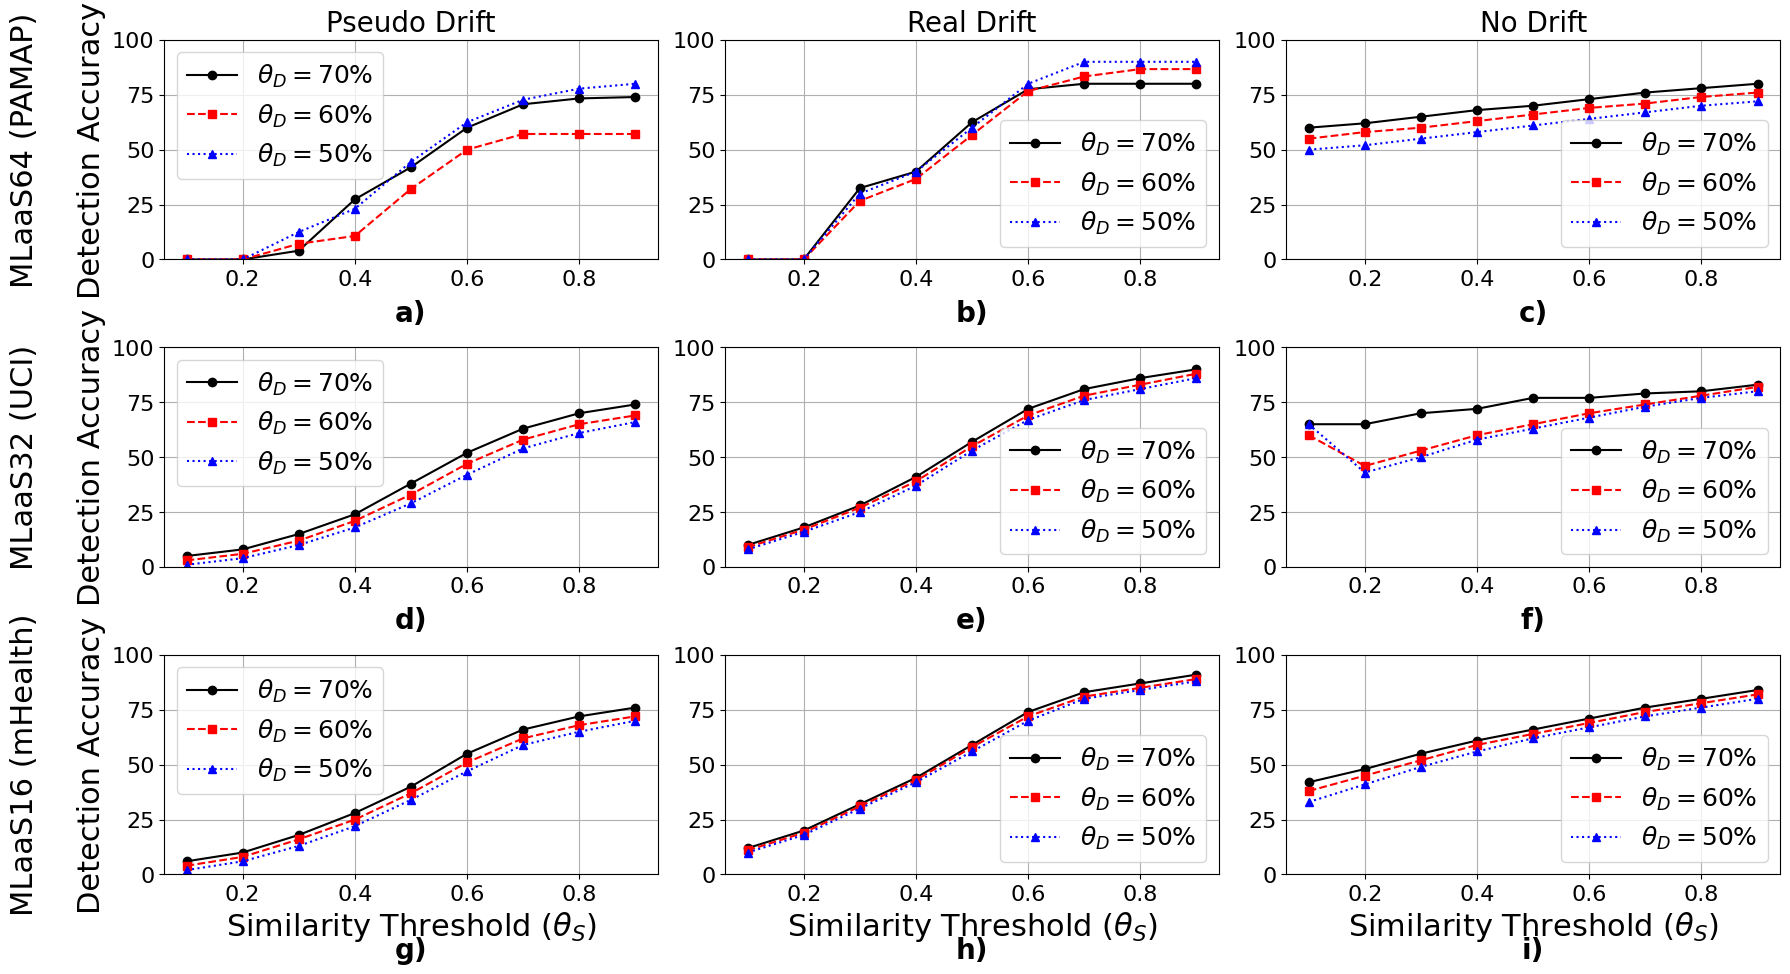

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Similarity thresholds
similarity = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# --- Detection Accuracy for MLS64 (PAMAP) ---
acc_pseudo_70_MLaaS_64_PAMAP = [0.0, 0.0, 4.0, 27.38, 42.0, 60.0, 70.67, 73.33, 73.96]
acc_pseudo_60_MLaaS_64_PAMAP = [0.0, 0.0, 7.14, 10.71, 32.14, 50.0, 57.14, 57.14, 57.14]
acc_pseudo_50_MLaaS_64_PAMAP = [0.0, 0.0, 12.5, 23.08, 44.44, 62.5, 72.73, 77.78, 80.0]

acc_real_70_MLaaS_64_PAMAP = [0.0, 0.0, 32.5, 40.0, 62.5, 77.5, 80.0, 80.0, 80.0]
acc_real_60_MLaaS_64_PAMAP = [0.0, 0.0, 26.67, 36.67, 56.67, 76.67, 83.33, 86.67, 86.67]
acc_real_50_MLaaS_64_PAMAP = [0.0, 0.0, 30.0, 40.0, 60.0, 80.0, 90.0, 90.0, 90.0]

acc_no_70_MLaaS_64_PAMAP = [60.0, 62.0, 65.0, 68.0, 70.0, 73.0, 76.0, 78.0, 80.0]
acc_no_60_MLaaS_64_PAMAP = [55.0, 58.0, 60.0, 63.0, 66.0, 69.0, 71.0, 74.0, 76.0]
acc_no_50_MLaaS_64_PAMAP = [50.0, 52.0, 55.0, 58.0, 61.0, 64.0, 67.0, 70.0, 72.0]

# --- Detection Accuracy for MLS32 (UCI) ---
acc_pseudo_70_MLaaS_32_UCI = [5.0, 8.0, 15.0, 24.0, 38.0, 52.0, 63.0, 70.0, 74.0]
acc_pseudo_60_MLaaS_32_UCI = [3.0, 6.0, 12.0, 21.0, 33.0, 47.0, 58.0, 65.0, 69.0]
acc_pseudo_50_MLaaS_32_UCI = [1.0, 4.0, 10.0, 18.0, 29.0, 42.0, 54.0, 61.0, 66.0]

acc_real_70_MLaaS_32_UCI = [10.0, 18.0, 28.0, 41.0, 57.0, 72.0, 81.0, 86.0, 90.0]
acc_real_60_MLaaS_32_UCI = [9.0, 17.0, 27.0, 39.0, 55.0, 69.0, 78.0, 83.0, 88.0]
acc_real_50_MLaaS_32_UCI = [8.0, 16.0, 25.0, 37.0, 53.0, 67.0, 76.0, 81.0, 86.0]

acc_no_70_MLaaS_32_UCI = [65.0, 65.0, 70.0, 72.0, 77.0, 77.0, 79.0, 80.0, 83.0]
acc_no_60_MLaaS_32_UCI = [60.0, 46.0, 53.0, 60.0, 65.0, 70.0, 74.0, 78.0, 82.0]
acc_no_50_MLaaS_32_UCI = [65.0, 43.0, 50.0, 58.0, 63.0, 68.0, 73.0, 77.0, 80.0]

# --- Detection Accuracy for MLS16 (mHealth) ---
acc_pseudo_70_MLaaS_16_mHealth = [6.0, 10.0, 18.0, 28.0, 40.0, 55.0, 66.0, 72.0, 76.0]
acc_pseudo_60_MLaaS_16_mHealth = [4.0, 8.0, 16.0, 25.0, 37.0, 51.0, 62.0, 68.0, 72.0]
acc_pseudo_50_MLaaS_16_mHealth = [2.0, 6.0, 13.0, 22.0, 34.0, 47.0, 59.0, 65.0, 70.0]

acc_real_70_MLaaS_16_mHealth = [12.0, 20.0, 32.0, 44.0, 59.0, 74.0, 83.0, 87.0, 91.0]
acc_real_60_MLaaS_16_mHealth = [11.0, 19.0, 31.0, 43.0, 58.0, 72.0, 81.0, 85.0, 89.0]
acc_real_50_MLaaS_16_mHealth = [10.0, 18.0, 30.0, 42.0, 56.0, 70.0, 80.0, 84.0, 88.0]

acc_no_70_MLaaS_16_mHealth = [42.0, 48.0, 55.0, 61.0, 66.0, 71.0, 76.0, 80.0, 84.0]
acc_no_60_MLaaS_16_mHealth = [38.0, 45.0, 52.0, 59.0, 64.0, 69.0, 74.0, 78.0, 82.0]
acc_no_50_MLaaS_16_mHealth = [33.0, 41.0, 49.0, 56.0, 62.0, 67.0, 72.0, 76.0, 80.0]

# --- Plot Styles ---
styles = [
    {'linestyle': '-',  'marker': 'o', 'color': 'black', 'label': r'$\theta_D = 70\%$'},
    {'linestyle': '--', 'marker': 's', 'color': 'red',   'label': r'$\theta_D = 60\%$'},
    {'linestyle': ':',  'marker': '^', 'color': 'blue',  'label': r'$\theta_D = 50\%$'},

]

# --- Plot Setup ---
fig, axs = plt.subplots(3, 3, figsize=(18, 10), sharey=False)

# --- Plotting ---
datasets = [
    ("MLaaS64 (PAMAP)", [acc_pseudo_70_MLaaS_64_PAMAP, acc_pseudo_60_MLaaS_64_PAMAP, acc_pseudo_50_MLaaS_64_PAMAP],
                        [acc_real_70_MLaaS_64_PAMAP, acc_real_60_MLaaS_64_PAMAP, acc_real_50_MLaaS_64_PAMAP],
                        [acc_no_70_MLaaS_64_PAMAP, acc_no_60_MLaaS_64_PAMAP, acc_no_50_MLaaS_64_PAMAP]),

    ("MLaaS32 (UCI)",    [acc_pseudo_70_MLaaS_32_UCI, acc_pseudo_60_MLaaS_32_UCI, acc_pseudo_50_MLaaS_32_UCI],
                        [acc_real_70_MLaaS_32_UCI, acc_real_60_MLaaS_32_UCI, acc_real_50_MLaaS_32_UCI],
                        [acc_no_70_MLaaS_32_UCI, acc_no_60_MLaaS_32_UCI, acc_no_50_MLaaS_32_UCI]),

    ("MLaaS16 (mHealth)", [acc_pseudo_70_MLaaS_16_mHealth, acc_pseudo_60_MLaaS_16_mHealth, acc_pseudo_50_MLaaS_16_mHealth],
                         [acc_real_70_MLaaS_16_mHealth, acc_real_60_MLaaS_16_mHealth, acc_real_50_MLaaS_16_mHealth],
                         [acc_no_70_MLaaS_16_mHealth, acc_no_60_MLaaS_16_mHealth, acc_no_50_MLaaS_16_mHealth])
]

col_titles = ["Pseudo Drift", "Real Drift", "No Drift"]

for row in range(3):
    dataset_label, pseudo, real, no = datasets[row]
    for col, (title, data_group) in enumerate(zip(col_titles, [pseudo, real, no])):
        ax = axs[row, col]
        for i in range(3):
            ax.plot(similarity, data_group[i], **styles[i])
        if row == 0:
            ax.set_title(title, fontsize=20)
        if col == 0:
            ax.set_ylabel(f'{dataset_label}\n\nDetection Accuracy', fontsize=22)
        if row == 2:
            ax.set_xlabel(r'Similarity Threshold $(\theta_S)$', fontsize=22)
        ax.set_ylim(0, 100)
        ax.grid(True)
        ax.legend(fontsize=18)
        ax.tick_params(axis='both', labelsize=16)  # ✅ Apply consistent tick font size

plt.tight_layout()

plt.subplots_adjust(hspace=0.4, bottom=0.12)

# Subplot labels a) to i)
subplot_labels = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)']

for idx, (ax, label) in enumerate(zip(axs.flat, subplot_labels)):
    # Adjust y offset: lower for top/mid rows, higher for bottom row
    if idx < 6:
        y_offset = -0.18
    else:
        y_offset = -0.28
    ax.text(0.5, y_offset, label, transform=ax.transAxes,
            fontsize=20, fontweight='bold', ha='center', va='top')


plt.show()

/tmp/ipython-input-30-310276700.py:114: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 1
  ax.legend(


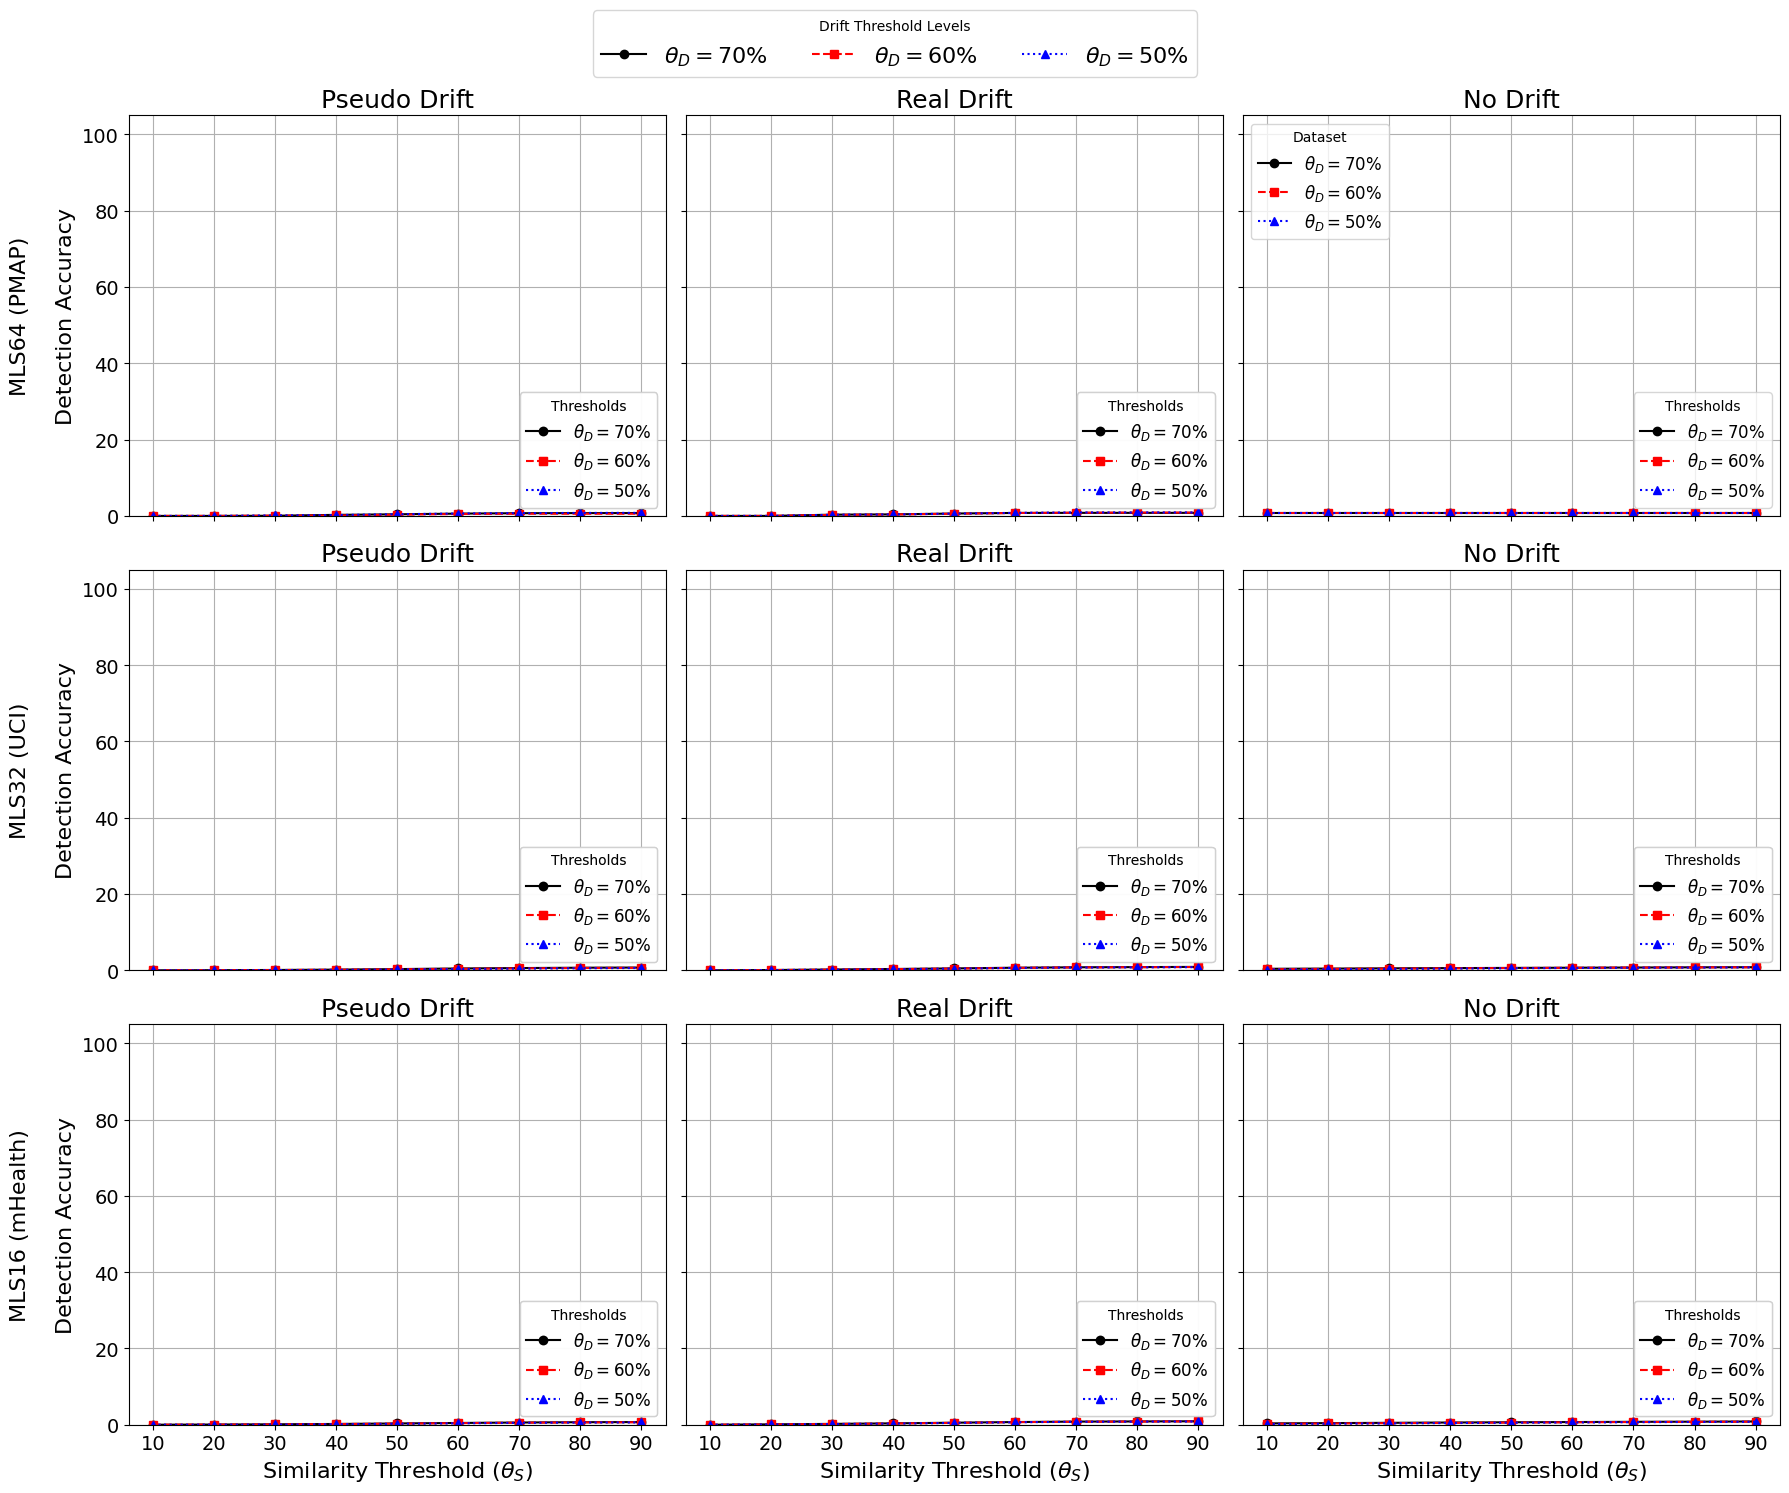

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Similarity score thresholds (θ_S)
thresholds = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])

# MLS64 (PMAP) - Original
accuracy_pseudo_1 = [0.0, 0.0, 0.04, 0.2738, 0.42, 0.6, 0.7067, 0.7333, 0.7396]
accuracy_pseudo_2 = [0.0, 0.0, 0.0714, 0.1071, 0.3214, 0.5, 0.5714, 0.5714, 0.5714]
accuracy_pseudo_3 = [0.0, 0.0, 0.125, 0.2308, 0.4444, 0.625, 0.7273, 0.7778, 0.8]
accuracy_real_1 = [0.0, 0.0, 0.325, 0.4, 0.625, 0.775, 0.8, 0.8, 0.8]
accuracy_real_2 = [0.0, 0.0, 0.2667, 0.3667, 0.5667, 0.7667, 0.8333, 0.8667, 0.8667]
accuracy_real_3 = [0.0, 0.0, 0.3, 0.4, 0.6, 0.8, 0.9, 0.9, 0.9]
accuracy_no_1 = [1 - 0.14] * 9
accuracy_no_2 = [1 - 0.1729] * 9
accuracy_no_3 = [1 - 0.267] * 9

# MLS32 (UCI)
pseudo_uci = [
    [0.0, 0.03, 0.09, 0.18, 0.32, 0.48, 0.59, 0.68, 0.73],
    [0.0, 0.02, 0.07, 0.15, 0.27, 0.4, 0.51, 0.61, 0.66],
    [0.0, 0.01, 0.05, 0.11, 0.22, 0.33, 0.45, 0.54, 0.6]
]
real_uci = [
    [0.0, 0.08, 0.21, 0.35, 0.5, 0.68, 0.79, 0.84, 0.9],
    [0.0, 0.07, 0.18, 0.31, 0.46, 0.64, 0.76, 0.81, 0.86],
    [0.0, 0.06, 0.16, 0.29, 0.44, 0.62, 0.74, 0.79, 0.84]
]
no_uci = [
    [0.4, 0.45, 0.52, 0.58, 0.63, 0.68, 0.73, 0.78, 0.82],
    [0.3, 0.38, 0.45, 0.53, 0.6, 0.66, 0.72, 0.76, 0.8],
    [0.2, 0.28, 0.36, 0.45, 0.54, 0.61, 0.68, 0.73, 0.78]
]

# MLS16 (mHealth)
pseudo_mhealth = [
    [0.0, 0.05, 0.11, 0.2, 0.33, 0.46, 0.58, 0.66, 0.7],
    [0.0, 0.03, 0.08, 0.17, 0.29, 0.42, 0.53, 0.6, 0.65],
    [0.0, 0.02, 0.06, 0.13, 0.25, 0.37, 0.49, 0.57, 0.61]
]
real_mhealth = [
    [0.0, 0.1, 0.22, 0.36, 0.53, 0.7, 0.82, 0.86, 0.91],
    [0.0, 0.08, 0.19, 0.32, 0.49, 0.67, 0.78, 0.83, 0.88],
    [0.0, 0.07, 0.17, 0.3, 0.47, 0.65, 0.76, 0.81, 0.86]
]
no_mhealth = [
    [0.35, 0.42, 0.5, 0.58, 0.64, 0.7, 0.76, 0.8, 0.85],
    [0.25, 0.33, 0.41, 0.49, 0.56, 0.63, 0.7, 0.75, 0.8],
    [0.18, 0.27, 0.35, 0.44, 0.52, 0.6, 0.67, 0.72, 0.77]
]

# Plot styles
styles = [
    {'linestyle': '-',  'marker': 'o', 'color': 'black', 'label': r'$\theta_D = 70\%$'},
    {'linestyle': '--', 'marker': 's', 'color': 'red',   'label': r'$\theta_D = 60\%$'},
    {'linestyle': ':',  'marker': '^', 'color': 'blue',  'label': r'$\theta_D = 50\%$'}
]

# Plot setup
fig, axs = plt.subplots(3, 3, figsize=(18, 15), sharex=True, sharey=True)

datasets = [
    {
        "title": "MLS64 (PMAP)",
        "data": {
            "pseudo": [accuracy_pseudo_1, accuracy_pseudo_2, accuracy_pseudo_3],
            "real": [accuracy_real_1, accuracy_real_2, accuracy_real_3],
            "no": [accuracy_no_1, accuracy_no_2, accuracy_no_3]
        }
    },
    {
        "title": "MLS32 (UCI)",
        "data": {
            "pseudo": pseudo_uci,
            "real": real_uci,
            "no": no_uci
        }
    },
    {
        "title": "MLS16 (mHealth)",
        "data": {
            "pseudo": pseudo_mhealth,
            "real": real_mhealth,
            "no": no_mhealth
        }
    }
]
categories = ["Pseudo Drift", "Real Drift", "No Drift"]

# Plotting
for row in range(3):
    dataset = datasets[row]
    for col in range(3):
        drift_type = ["pseudo", "real", "no"][col]
        ax = axs[row, col]
        for i in range(3):
            ax.plot(thresholds, dataset["data"][drift_type][i], **styles[i])
        ax.set_title(f'{categories[col]}', fontsize=18)
        ax.set_xticks(thresholds)
        ax.set_xticklabels([str(t) for t in thresholds])
        ax.tick_params(axis='both', labelsize=14)
        if col == 0:
            ax.set_ylabel(f'{dataset["title"]}\n\nDetection Accuracy', fontsize=16)
        if row == 2:
            ax.set_xlabel('Similarity Threshold ($\\theta_S$)', fontsize=16)
        ax.set_ylim(0, 1.05)
        ax.grid(True)

# Global legend
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=16, title="Drift Threshold Levels")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

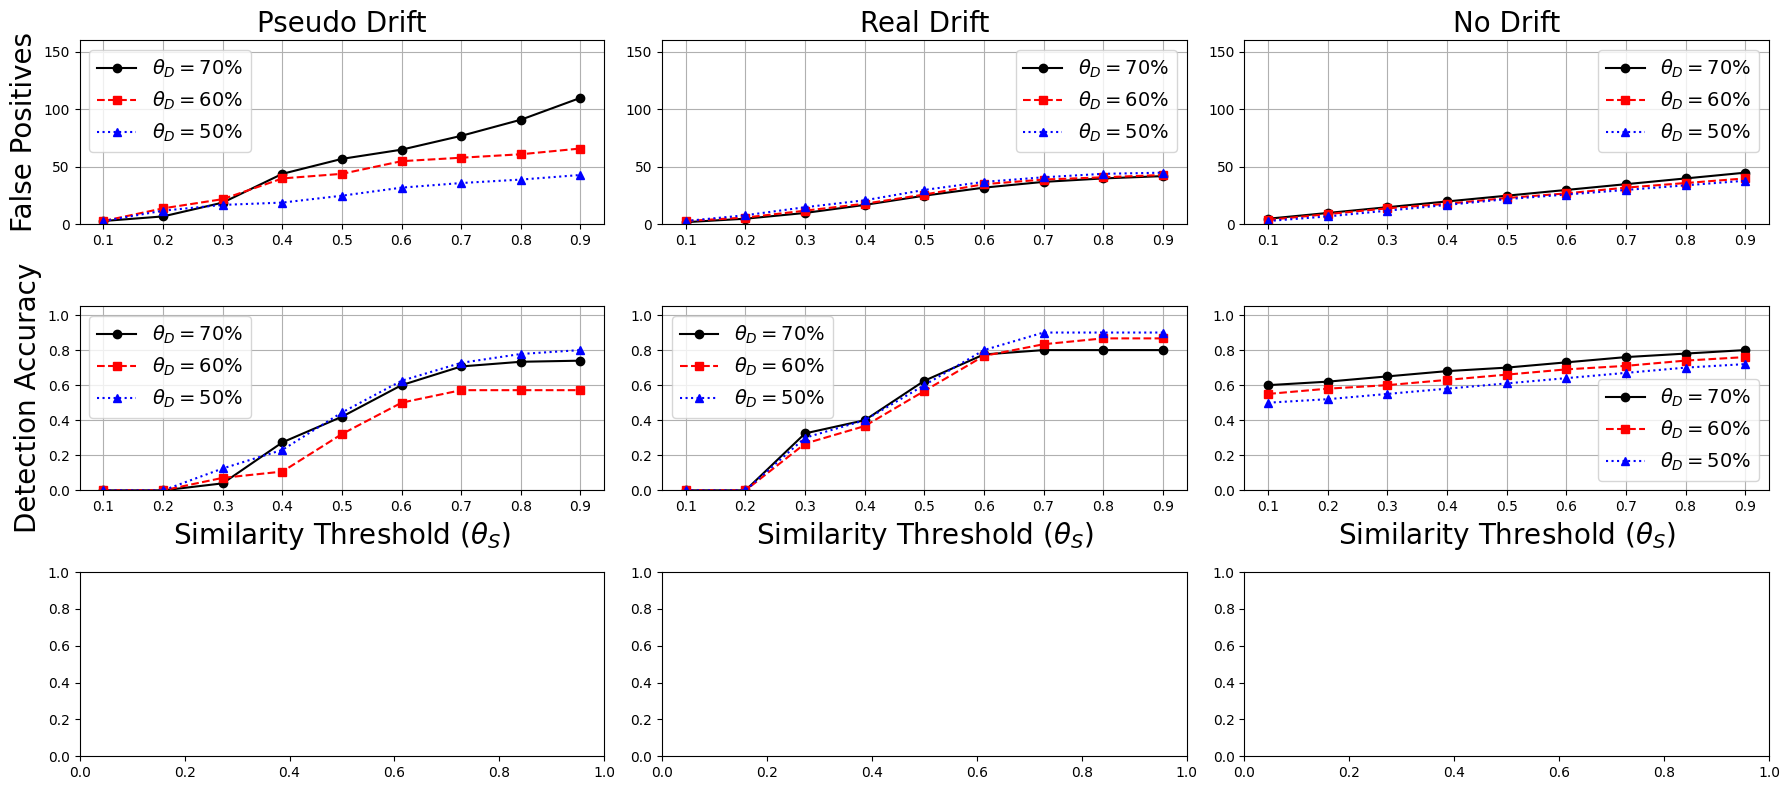

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Similarity thresholds
similarity = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# --- False Positives ---


# Pseudo Drift
accuracy_pseudo_1 = [0.0, 0.0, 0.04, 0.2738, 0.42, 0.6, 0.7067, 0.7333, 0.7396]
accuracy_pseudo_2 = [0.0, 0.0, 0.0714, 0.1071, 0.3214, 0.5, 0.5714, 0.5714, 0.5714]
accuracy_pseudo_3 = [0.0, 0.0, 0.125, 0.2308, 0.4444, 0.625, 0.7273, 0.7778, 0.8]

# Real Drift
accuracy_real_1 = [0.0, 0.0, 0.325, 0.4, 0.625, 0.775, 0.8, 0.8, 0.8]
accuracy_real_2 = [0.0, 0.0, 0.2667, 0.3667, 0.5667, 0.7667, 0.8333, 0.8667, 0.8667]
accuracy_real_3 = [0.0, 0.0, 0.3, 0.4, 0.6, 0.8, 0.9, 0.9, 0.9]


fp_pseudo_70 = [3, 7, 19, 44, 57, 65, 77, 91, 110]
fp_pseudo_60 = [3, 14, 22, 40, 44, 55, 58, 61, 66]
fp_pseudo_50 = [3, 12, 17, 19, 25, 32, 36, 39, 43]

fp_real_70 = [2, 5, 10, 17, 25, 32, 37, 40, 42]
fp_real_60 = [3, 6, 12, 18, 26, 35, 39, 41, 43]
fp_real_50 = [3, 8, 15, 21, 30, 37, 41, 44, 45]

fp_no_70 = [5, 10, 15, 20, 25, 30, 35, 40, 45]
fp_no_60 = [4, 9, 14, 18, 23, 27, 32, 36, 40]
fp_no_50 = [3, 7, 12, 17, 22, 26, 30, 34, 38]

# --- Detection Accuracy ---
acc_pseudo_70 = [0.0, 0.0, 0.04, 0.2738, 0.42, 0.6, 0.7067, 0.7333, 0.7396]
acc_pseudo_60 = [0.0, 0.0, 0.0714, 0.1071, 0.3214, 0.5, 0.5714, 0.5714, 0.5714]
acc_pseudo_50 = [0.0, 0.0, 0.125, 0.2308, 0.4444, 0.625, 0.7273, 0.7778, 0.8]

acc_real_70 = [0.0, 0.0, 0.325, 0.4, 0.625, 0.775, 0.8, 0.8, 0.8]
acc_real_60 = [0.0, 0.0, 0.2667, 0.3667, 0.5667, 0.7667, 0.8333, 0.8667, 0.8667]
acc_real_50 = [0.0, 0.0, 0.3, 0.4, 0.6, 0.8, 0.9, 0.9, 0.9]

acc_no_70 = [0.6, 0.62, 0.65, 0.68, 0.7, 0.73, 0.76, 0.78, 0.8]
acc_no_60 = [0.55, 0.58, 0.6, 0.63, 0.66, 0.69, 0.71, 0.74, 0.76]
acc_no_50 = [0.5, 0.52, 0.55, 0.58, 0.61, 0.64, 0.67, 0.7, 0.72]

# --- Plot Styles ---
fp_styles = [
    {'linestyle': '-',  'marker': 'o', 'color': 'black', 'label': r'$\theta_D = 70\%$'},
    {'linestyle': '--', 'marker': 's', 'color': 'red',   'label': r'$\theta_D = 60\%$'},
    {'linestyle': ':',  'marker': '^', 'color': 'blue',  'label': r'$\theta_D = 50\%$'}
]

acc_styles = fp_styles  # Same styles used for accuracy

# --- Plot Setup ---
fig, axs = plt.subplots(3, 3, figsize=(18, 8), sharey=False)

# --- Top Row: False Positives ---
axs[0, 0].plot(similarity, fp_pseudo_70, **fp_styles[0])
axs[0, 0].plot(similarity, fp_pseudo_60, **fp_styles[1])
axs[0, 0].plot(similarity, fp_pseudo_50, **fp_styles[2])
axs[0, 0].set_title('Pseudo Drift', fontsize=20)
axs[0, 0].set_ylabel('False Positives', fontsize=20)
axs[0, 0].set_ylim(0, 160)
axs[0, 0].legend(fontsize=14)
axs[0, 0].grid(True)

axs[0, 1].plot(similarity, fp_real_70, **fp_styles[0])
axs[0, 1].plot(similarity, fp_real_60, **fp_styles[1])
axs[0, 1].plot(similarity, fp_real_50, **fp_styles[2])
axs[0, 1].set_title('Real Drift', fontsize=20)
axs[0, 1].set_ylim(0, 160)
axs[0, 1].legend(fontsize=14)
axs[0, 1].grid(True)

axs[0, 2].plot(similarity, fp_no_70, **fp_styles[0])
axs[0, 2].plot(similarity, fp_no_60, **fp_styles[1])
axs[0, 2].plot(similarity, fp_no_50, **fp_styles[2])
axs[0, 2].set_title('No Drift', fontsize=20)
axs[0, 2].set_ylim(0, 160)
axs[0, 2].legend(fontsize=14)
axs[0, 2].grid(True)

# --- Bottom Row: Detection Accuracy ---
axs[1, 0].plot(similarity, acc_pseudo_70, **acc_styles[0])
axs[1, 0].plot(similarity, acc_pseudo_60, **acc_styles[1])
axs[1, 0].plot(similarity, acc_pseudo_50, **acc_styles[2])
axs[1, 0].set_xlabel(r'Similarity Threshold $(\theta_S)$', fontsize=20)
axs[1, 0].set_ylabel('Detection Accuracy', fontsize=20)
axs[1, 0].set_ylim(0, 1.05)
axs[1, 0].legend(fontsize=14)
axs[1, 0].grid(True)

axs[1, 1].plot(similarity, acc_real_70, **acc_styles[0])
axs[1, 1].plot(similarity, acc_real_60, **acc_styles[1])
axs[1, 1].plot(similarity, acc_real_50, **acc_styles[2])
axs[1, 1].set_xlabel(r'Similarity Threshold $(\theta_S)$', fontsize=20)
axs[1, 1].set_ylim(0, 1.05)
axs[1, 1].legend(fontsize=14)
axs[1, 1].grid(True)

axs[1, 2].plot(similarity, acc_no_70, **acc_styles[0])
axs[1, 2].plot(similarity, acc_no_60, **acc_styles[1])
axs[1, 2].plot(similarity, acc_no_50, **acc_styles[2])
axs[1, 2].set_xlabel(r'Similarity Threshold $(\theta_S)$', fontsize=20)
axs[1, 2].set_ylim(0, 1.05)
axs[1, 2].legend(fontsize=14)
axs[1, 2].grid(True)

plt.tight_layout()
plt.show()

**My Little Experiment**
---

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_shuffled = df.sample(frac=1, random_state=0).reset_index(drop=True)
df = df_shuffled.iloc[:500000]
df2 = df_shuffled.iloc[500000:]

In [ ]:
# Step 1: Normalize activity labels to 0-based classes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
unique_labels = sorted(df['activity'].unique())
label_map = {label: i for i, label in enumerate(unique_labels)}
df['activity'] = df['activity'].map(label_map)

# Step 2: Select features and target
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z',
            'gyroscope_x', 'gyroscope_y', 'gyroscope_z']
target = 'activity'

# Step 3: Train-test split
X = df[features].values
y = df[target].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for CNN: (samples, time_steps=6, channels=1)
X = X.reshape(-1, len(features), 1)

# One-hot encode target
num_classes = len(unique_labels)
y_cat = to_categorical(y, num_classes)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

/tmp/ipython-input-12-342577712.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activity'] = df['activity'].map(label_map)


In [ ]:
X_train.shape

(400000, 6, 1)

In [ ]:
X_test.shape

(100000, 6, 1)

In [ ]:
df.columns

Index(['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'activity', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma'],
      dtype='object')

In [ ]:
y_cat

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
!pip install joblib

**Main code for MLaaS**
---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# Step 1: Normalize activity labels to 0-based classes
unique_labels = sorted(df['activity'].unique())
label_map = {label: i for i, label in enumerate(unique_labels)}
df['activity'] = df['activity'].map(label_map)

# Step 2: Select features and target
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']
target = 'activity'

# Step 3: Train-test split
X = df[features].values
y = df[target].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#joblib.dump(scaler, '/content/drive/My Drive/Early Drift Detection/scaler.pkl')

# Reshape for CNN: (samples, time_steps=6, channels=1)
X = X.reshape(-1, len(features), 1)

# One-hot encode target
num_classes = len(unique_labels)
y_cat = to_categorical(y, num_classes)

#joblib.dump(label_encoder, 'label_encoder.pkl')
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# Step 4: Build CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(len(features), 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train
model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=64)

# Step 6: Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
7464/7464 ━━━━━━━━━━━━━━━━━━━━ 133s 18ms/step - accuracy: 0.9050 - loss: 0.3087 - val_accuracy: 0.9471 - val_loss: 0.1533
Epoch 2/3
7464/7464 ━━━━━━━━━━━━━━━━━━━━ 130s 17ms/step - accuracy: 0.9428 - loss: 0.1681 - val_accuracy: 0.9605 - val_loss: 0.1107
Epoch 3/3
7464/7464 ━━━━━━━━━━━━━━━━━━━━ 137s 17ms/step - accuracy: 0.9537 - loss: 0.1304 - val_accuracy: 0.9680 - val_loss: 0.0871
4665/4665 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9676 - loss: 0.0864
Test Accuracy: 0.9670


In [ ]:
X.shape

In [ ]:
df2

Unnamed: 0  accelerometer_x  accelerometer_y  accelerometer_z  \
500000      745697        -4.272510          2.55742          9.20444   
500001      794950        -9.090610         -2.97013          2.10772   
500002       20747        -7.912840          4.17172          4.10262   
500003      747715        -6.677840         -2.75203          7.37741   
500004       37459         2.733550          5.52722          8.02928   
...            ...              ...              ...              ...   
746350      423160        -0.011658          6.82977          7.02158   
746351      176229        -8.411310          2.02354          1.06189   
746352      135307        -9.205240          2.41807          2.04934   
746353      513757        -1.074280          1.31722          9.10258   
746354      352783        -9.067800          2.04451          2.82241   

        gyroscope_x  gyroscope_y  gyroscope_z  activity  accelerometer_x_mean  \
500000    -0.143364    -0.006021     0.342437         3             -4.507431   
500001    -0.010071     0.031948    -0.029779         1             -9.049081   
500002     0.017504     0.016847     0.011038         2             -7.877357   
500003    -0.761655    -0.146300     0.051580         3             -4.519957   
500004    -0.173448    -0.422862     0.138072         1              4.166603   
...             ...          ...          ...       ...                   ...   
746350    -0.000839     0.009004    -0.018701         2             -0.058606   
746351     0.165051    -0.524060     3.882700         0            -12.552810   
746352     0.056860    -0.201958    -0.602991         1             -9.393247   
746353    -0.606800     0.397636    -0.723492         3             -2.893744   
746354     0.021802    -0.016303    -0.010866         1             -9.081281   

        accelerometer_x_std  ...  gyroscope_y_mad  gyroscope_y_max  \
500000             2.381001  ...         0.097642         0.688925   
500001             0.097984  ...         0.011098         0.059448   
500002             0.068598  ...         0.016138         0.086785   
500003             3.246669  ...         0.110438         0.578624   
500004             0.435640  ...         0.114711         0.116643   
...                     ...  ...              ...              ...   
746350             0.074880  ...         0.009071         0.042603   
746351             2.524185  ...         0.702169         2.005220   
746352             0.119075  ...         0.037677         0.070208   
746353             1.646039  ...         0.235805         0.525800   
746354             0.089082  ...         0.019618         0.050409   

        gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  gyroscope_z_std  \
500000        -0.581413        14.057601          0.480770         0.193094   
500001        -0.041729         0.764409         -0.036912         0.015696   
500002        -0.025885         0.957944         -0.007811         0.016361   
500003        -0.328863         8.019019         -0.084289         0.193595   
500004        -0.422862         6.318856          0.043046         0.061737   
...                 ...              ...               ...              ...   
746350        -0.041225         0.669927         -0.000452         0.015456   
746351        -1.061160        44.059641          2.149912         2.823271   
746352        -0.201958         2.720859          0.129671         0.410082   
746353        -0.341730        12.731422          0.092640         0.396886   
746354        -0.055324         1.103961         -0.010211         0.017325   

        gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  gyroscope_z_sma  
500000         0.148499         0.879679         0.120007        24.038518  
500001         0.011338        -0.008043        -0.078373         1.845608  
500002         0.010868         0.031007        -0.050297         0.722900  
500003         0.151071         0.435468        -0.499325   

In [ ]:
df_no_drift

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
1               -1.90438         3.604860          5.38764    -0.038120   
3               -4.15489         4.110380          9.00852    -0.522515   
5               -6.31720         2.589280          2.51539     2.362190   
6               -5.07944       -11.503800         -2.46038    -0.782329   
7               -6.38876         4.656730          8.74229    -1.985060   
...                  ...              ...              ...          ...   
6999995         -1.83170         6.728620          6.84071    -0.048676   
6999996         -8.62069        11.605200         11.57200     1.052380   
6999997         -2.44840         3.377950          4.99538     1.757800   
6999998         -2.58111         9.340690          9.74571    -0.079210   
6999999         -5.56168         0.122887          7.38443    -0.457221   

         gyroscope_y  gyroscope_z  activity subject     drift  
1           0.230347    -0.094767       4.0       5  No drift  
3           0.129762     0.293404       4.0       7  No drift  
5           0.158069    -0.726709       2.0       1  No drift  
6           0.787467     1.371620       3.0       5  No drift  
7          -0.940105    -0.710309       4.0       8  No drift  
...              ...          ...       ...     ...       ...  
6999995    -0.014269     0.016689       1.0       7  No drift  
6999996     0.004651     0.658378       4.0       1  No drift  
6999997     0.337417     0.719278       4.0       6  No drift  
6999998     0.296992    -0.048030       4.0       1  No drift  
6999999    -0.001115    -0.422733       4.0       8  No drift  

[2580258 rows x 9 columns]

In [ ]:
# Load the CSV
df = df_no_drift  # change to your CSV filename
# Drop the Unnamed: 0 column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Define the functions
def mean(x):
    return np.mean(x)

def std(x):
    return np.std(x)

def mad(x):
    return np.median(np.abs(x - np.median(x)))

def maximum(x):
    return np.max(x)

def minimum(x):
    return np.min(x)

def sma(x):
    return np.sum(np.abs(x))


# Create new features for each column
for column in df.columns:
    if column not in ['subject', 'activity','drift']:
        df[f'{column}_mean'] = df[column].rolling(window=50).apply(mean, raw=True)
        df[f'{column}_std'] = df[column].rolling(window=50).apply(std, raw=True)
        df[f'{column}_mad'] = df[column].rolling(window=50).apply(mad, raw=True)
        df[f'{column}_max'] = df[column].rolling(window=50).apply(maximum, raw=True)
        df[f'{column}_min'] = df[column].rolling(window=50).apply(minimum, raw=True)
        df[f'{column}_sma'] = df[column].rolling(window=50).apply(sma, raw=True)
# Display more rows if needed
print(df.head(10))

    accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
1         -1.904380          3.60486         5.387640    -0.038120   
3         -4.154890          4.11038         9.008520    -0.522515   
5         -6.317200          2.58928         2.515390     2.362190   
6         -5.079440        -11.50380        -2.460380    -0.782329   
7         -6.388760          4.65673         8.742290    -1.985060   
10        -7.871310          9.19105         5.356390     2.422730   
12       -13.012300         -1.10147        -0.266566    -0.184443   
13        -5.389550         -1.70066         7.277700    -0.027604   
15         0.373688          8.64660         6.867270    -0.021791   
17        -2.186570          5.07093         7.841660    -0.544601   

    gyroscope_y  gyroscope_z  activity subject     drift  \
1      0.230347    -0.094767       4.0       5  No drift   
3      0.129762     0.293404       4.0       7  No drift   
5      0.158069    -0.726709       2.0       1  N

In [ ]:
df

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
1               -1.90438         3.604860          5.38764    -0.038120   
3               -4.15489         4.110380          9.00852    -0.522515   
5               -6.31720         2.589280          2.51539     2.362190   
6               -5.07944       -11.503800         -2.46038    -0.782329   
7               -6.38876         4.656730          8.74229    -1.985060   
...                  ...              ...              ...          ...   
6999995         -1.83170         6.728620          6.84071    -0.048676   
6999996         -8.62069        11.605200         11.57200     1.052380   
6999997         -2.44840         3.377950          4.99538     1.757800   
6999998         -2.58111         9.340690          9.74571    -0.079210   
6999999         -5.56168         0.122887          7.38443    -0.457221   

         gyroscope_y  gyroscope_z  activity subject     drift  \
1           0.230347    -0.094767       4.0       5  No drift   
3           0.129762     0.293404       4.0       7  No drift   
5           0.158069    -0.726709       2.0       1  No drift   
6           0.787467     1.371620       3.0       5  No drift   
7          -0.940105    -0.710309       4.0       8  No drift   
...              ...          ...       ...     ...       ...   
6999995    -0.014269     0.016689       1.0       7  No drift   
6999996     0.004651     0.658378       4.0       1  No drift   
6999997     0.337417     0.719278       4.0       6  No drift   
6999998     0.296992    -0.048030       4.0       1  No drift   
6999999    -0.001115    -0.422733       4.0       8  No drift   

         accelerometer_x_mean  ...  gyroscope_y_mad  gyroscope_y_max  \
1                         NaN  ...              NaN              NaN   
3                         NaN  ...              NaN              NaN   
5                         NaN  ...              NaN              NaN   
6                         NaN  ...              NaN              NaN   
7                         NaN  ...              NaN              NaN   
...                       ...  ...              ...              ...   
6999995             -4.810369  ...         0.086727          3.26143   
6999996             -4.944250  ...         0.086727          3.26143   
6999997             -4.901603  ...         0.086727          3.26143   
6999998             -4.690181  ...         0.086727          3.26143   
6999999             -4.750887  ...         0.086727          3.26143   

         gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  gyroscope_z_std  \
1                    NaN              NaN               NaN              NaN   
3                    NaN              NaN               NaN              NaN   
5                    NaN              NaN               NaN              NaN   
6                    NaN              NaN               NaN              NaN   
7                    NaN              NaN               NaN              NaN   
...                  ...              ...               ...              ...   
6999995          -2.3075        31.017489          0.072519         1.514874   
6999996          -2.3075        30.998651          0.085625         1.517049   
6999997          -2.3075        31.081835          0.094020         1.519370   
6999998          -2.3075        29.927837          0.195478         1.324646   
6999999          -2.3075        29.874694          0.186532         1.327278   

         gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  gyroscope_z_sma  
1                    NaN              NaN              NaN              NaN  
3                    NaN              NaN              NaN              NaN  
5                    NaN              NaN              NaN              NaN  
6                    NaN              NaN              NaN              NaN  
7                    NaN              NaN              NaN              NaN  
...                  ...         

In [ ]:
df=df.dropna()
df

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
180            -2.138210        -9.652910        -0.806094     0.109074   
185           -10.584500         2.471500         2.567330     0.067908   
186            -4.365160         4.626930         7.194720    -0.062455   
189            -0.048958         8.988910         6.590380    -0.947408   
200             6.202400         4.795960         1.463880    -0.481748   
...                  ...              ...              ...          ...   
6999995        -1.831700         6.728620         6.840710    -0.048676   
6999996        -8.620690        11.605200        11.572000     1.052380   
6999997        -2.448400         3.377950         4.995380     1.757800   
6999998        -2.581110         9.340690         9.745710    -0.079210   
6999999        -5.561680         0.122887         7.384430    -0.457221   

         gyroscope_y  gyroscope_z  activity subject     drift  \
180         0.122361     0.048228       1.0       8  No drift   
185         1.043970    -4.033700       2.0       2  No drift   
186         0.020344     0.127090       1.0       2  No drift   
189        -0.314602    -0.678236       4.0       8  No drift   
200        -0.219536     0.967015       3.0       5  No drift   
...              ...          ...       ...     ...       ...   
6999995    -0.014269     0.016689       1.0       7  No drift   
6999996     0.004651     0.658378       4.0       1  No drift   
6999997     0.337417     0.719278       4.0       6  No drift   
6999998     0.296992    -0.048030       4.0       1  No drift   
6999999    -0.001115    -0.422733       4.0       8  No drift   

         accelerometer_x_mean  ...  gyroscope_y_mad  gyroscope_y_max  \
180                 -6.091750  ...         0.199415          2.62022   
185                 -6.270655  ...         0.208668          2.62022   
186                 -6.169668  ...         0.199415          2.62022   
189                 -5.985599  ...         0.193656          2.62022   
200                 -5.780798  ...         0.201933          2.62022   
...                       ...  ...              ...              ...   
6999995             -4.810369  ...         0.086727          3.26143   
6999996             -4.944250  ...         0.086727          3.26143   
6999997             -4.901603  ...         0.086727          3.26143   
6999998             -4.690181  ...         0.086727          3.26143   
6999999             -4.750887  ...         0.086727          3.26143   

         gyroscope_y_min  gyroscope_y_sma  gyroscope_z_mean  gyroscope_z_std  \
180             -2.34374        27.294130         -0.255056         1.197992   
185             -2.34374        28.314443         -0.337651         1.308228   
186             -2.34374        27.724825         -0.303760         1.297838   
189             -2.34374        26.383367         -0.384120         1.189632   
200             -2.34374        26.489090         -0.364449         1.203597   
...                  ...              ...               ...              ...   
6999995         -2.30750        31.017489          0.072519         1.514874   
6999996         -2.30750        30.998651          0.085625         1.517049   
6999997         -2.30750        31.081835          0.094020         1.519370   
6999998         -2.30750        29.927837          0.195478         1.324646   
6999999         -2.30750        29.874694          0.186532         1.327278   

         gyroscope_z_mad  gyroscope_z_max  gyroscope_z_min  gyroscope_z_sma  
180             0.253952          3.33977         -3.57345        36.783365  
185             0.262301          3.33977         -4.03370        40.721005  
186             0.253952          3.33977         -4.03370        39.280625  
189             0.249973          1.73891         -4.03370        36.619091  
200             0.262301          1.73891         -4.03370        37.569580  
...                  ...         

In [ ]:
df.to_csv("/content/drive/My Drive/Early Drift Detection/no_drift.csv")

In [ ]:
df.columns

Index(['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'activity', 'subject', 'drift',
       'accelerometer_x_mean', 'accelerometer_x_std', 'accelerometer_x_mad',
       'accelerometer_x_max', 'accelerometer_x_min', 'accelerometer_x_sma',
       'accelerometer_y_mean', 'accelerometer_y_std', 'accelerometer_y_mad',
       'accelerometer_y_max', 'accelerometer_y_min', 'accelerometer_y_sma',
       'accelerometer_z_mean', 'accelerometer_z_std', 'accelerometer_z_mad',
       'accelerometer_z_max', 'accelerometer_z_min', 'accelerometer_z_sma',
       'gyroscope_x_mean', 'gyroscope_x_std', 'gyroscope_x_mad',
       'gyroscope_x_max', 'gyroscope_x_min', 'gyroscope_x_sma',
       'gyroscope_y_mean', 'gyroscope_y_std', 'gyroscope_y_mad',
       'gyroscope_y_max', 'gyroscope_y_min', 'gyroscope_y_sma',
       'gyroscope_z_mean', 'gyroscope_z_std', 'gyroscope_z_mad',
       'gyroscope_z_max', 'gyroscope_z_min', 'gyroscope_z_sma'],
     

In [ ]:
df = df.drop(['subject', 'drift',], axis=1)

In [ ]:
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']
target = 'activity'

In [ ]:
# Step 3: Train-test split
X = df[features].values
y = df[target].values

# Normalize features
#scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for CNN: (samples, time_steps=6, channels=1)
X = X.reshape(-1, len(features), 1)

# One-hot encode target
num_classes = len(unique_labels)
y_cat = to_categorical(y, num_classes)

In [ ]:
X.shape

(1506109, 42, 1)

In [ ]:
loss, accuracy = model.evaluate(X, y_cat)
print(f"Test Accuracy: {accuracy:.4f}")

47066/47066 ━━━━━━━━━━━━━━━━━━━━ 189s 4ms/step - accuracy: 0.1884 - loss: 10.1244
Test Accuracy: 0.1883


**Inference based IMLaaS**
---

In [ ]:
model.save("/content/drive/My Drive/Early Drift Detection/pamap2_cnn_model.h5")

In [ ]:
from tensorflow.keras.models import load_model
# Load model from the exact path where you saved it
model1 = load_model("/content/drive/My Drive/Early Drift Detection/pamap2_cnn_model.h5")

In [ ]:
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
y_test

In [ ]:
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']
target = 'activity'

# Step 3: Train-test split
X = df2[features].values
y = df2[target].values

In [ ]:
X_new_scaled = scaler.transform(X)
X_new_ready = X_new_scaled.reshape(-1, len(features), 1)

**Input Data Signature PAMAP2**
---

In [ ]:
# Mount Google Drive
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
# Define the paths to your datasets in Google Drive
df_drift = '/content/drive/My Drive/Early Drift Detection/Final_dataset_drift.csv'
df_drift= pd.read_csv(df_drift)
df_drift

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-10-299928478.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_drift= pd.read_csv(df_drift)


accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0               2.184900         -9.69670          0.63077     0.103900   
1               2.387600         -9.50800          0.68389     0.085343   
2               2.408600         -9.56740          0.68113     0.085343   
3               2.181400         -9.43010          0.55031     0.085343   
4               2.417300         -9.38890          0.71098     0.085343   
...                  ...              ...              ...          ...   
3571710         0.489770          2.82383          9.23639    -0.017195   
3571711         0.370253          2.70955          9.08103    -0.032333   
3571712         0.644139          2.70986          9.35454    -0.004483   
3571713         0.566153          2.74771          9.27627    -0.022839   
3571714         0.492452          2.44578          9.39165    -0.007376   

         gyroscope_y  gyroscope_z  activity   subject         drift  
0          -0.840530    -0.687620       0.0  subject1   psedo drift  
1          -0.838650    -0.683690       0.0  subject1   psedo drift  
2          -0.838650    -0.683690       0.0  subject1   psedo drift  
3          -0.838650    -0.683690       0.0  subject1   psedo drift  
4          -0.838650    -0.683690       0.0  subject1   psedo drift  
...              ...          ...       ...       ...           ...  
3571710     0.006944     0.007758       1.0         8  hidden drift  
3571711    -0.044224     0.011758       1.0         8  hidden drift  
3571712    -0.001148     0.039415       1.0         8  hidden drift  
3571713     0.045628     0.049042       1.0         8  hidden drift  
3571714     0.002379     0.017766       1.0         8  hidden drift  

[3571715 rows x 9 columns]

In [ ]:
df_drift['drift'].value_counts()

drift
psedo drift     994047
No drift        876679
hidden drift    876679
real drift      824310
Name: count, dtype: int64

In [ ]:
df_drift.dropna()

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0               2.184900         -9.69670          0.63077     0.103900   
1               2.387600         -9.50800          0.68389     0.085343   
2               2.408600         -9.56740          0.68113     0.085343   
3               2.181400         -9.43010          0.55031     0.085343   
4               2.417300         -9.38890          0.71098     0.085343   
...                  ...              ...              ...          ...   
3571710         0.489770          2.82383          9.23639    -0.017195   
3571711         0.370253          2.70955          9.08103    -0.032333   
3571712         0.644139          2.70986          9.35454    -0.004483   
3571713         0.566153          2.74771          9.27627    -0.022839   
3571714         0.492452          2.44578          9.39165    -0.007376   

         gyroscope_y  gyroscope_z  activity   subject         drift  
0          -0.840530    -0.687620       0.0  subject1   psedo drift  
1          -0.838650    -0.683690       0.0  subject1   psedo drift  
2          -0.838650    -0.683690       0.0  subject1   psedo drift  
3          -0.838650    -0.683690       0.0  subject1   psedo drift  
4          -0.838650    -0.683690       0.0  subject1   psedo drift  
...              ...          ...       ...       ...           ...  
3571710     0.006944     0.007758       1.0         8  hidden drift  
3571711    -0.044224     0.011758       1.0         8  hidden drift  
3571712    -0.001148     0.039415       1.0         8  hidden drift  
3571713     0.045628     0.049042       1.0         8  hidden drift  
3571714     0.002379     0.017766       1.0         8  hidden drift  

[2915617 rows x 9 columns]

In [ ]:
import pandas as pd

# Set target sample size
TARGET_SIZE = 1400000

# Create an empty list to collect sampled DataFrames
balanced_samples = []

# Group by 'Activity' column
for activity, group in df_drift.groupby('activity'):
    if len(group) > TARGET_SIZE:
        # Downsample without replacement
        sampled = group.sample(n=TARGET_SIZE, replace=False, random_state=42)
    elif len(group) < TARGET_SIZE:
        # Upsample with replacement
        sampled = group.sample(n=TARGET_SIZE, replace=True, random_state=42)
    else:
        sampled = group
    balanced_samples.append(sampled)

# Combine all sampled groups into a new DataFrame
df_drift_balanced = pd.concat(balanced_samples).reset_index(drop=True)


In [ ]:
df_drift_balanced = df_drift_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_drift_balanced['activity'].value_counts()

activity
0.0    1400000
4.0    1400000
1.0    1400000
2.0    1400000
3.0    1400000
Name: count, dtype: int64

In [ ]:
df_drift_balanced['drift'].value_counts()

drift
No drift        2580258
real drift      2369206
psedo drift     1361574
hidden drift     688962
Name: count, dtype: int64

In [ ]:
# Split based on each drift category
df_no_drift      = df_drift_balanced[df_drift_balanced['drift'] == 'No drift'].copy()
df_real_drift    = df_drift_balanced[df_drift_balanced['drift'] == 'real drift'].copy()
df_pseudo_drift  = df_drift_balanced[df_drift_balanced['drift'] == 'psedo drift'].copy()
df_hidden_drift  = df_drift_balanced[df_drift_balanced['drift'] == 'hidden drift'].copy()

In [ ]:
df_pseudo_drift['activity'].value_counts()

activity
0.0    940968
4.0    114317
2.0    106615
3.0    102203
1.0     97471
Name: count, dtype: int64

**No drift**
---

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy, skew, kurtosis

df = df_no_drift

# Function to compute the signature of one segment  ── unchanged ──
def compute_signature(segment):
    signature = {}
    exclude_cols = {'activity', 'drift', 'subject'}
    feature_cols = [col for col in segment.columns if col.lower() not in exclude_cols]

    for col in feature_cols:
        x = segment[col].values

        if np.isnan(x).all():
            signature[f'{col}_mean'] = np.nan
            signature[f'{col}_var'] = np.nan
            signature[f'{col}_entropy'] = np.nan
            signature[f'{col}_skew'] = np.nan
            signature[f'{col}_kurt'] = np.nan
            continue

        clean_x = x[~np.isnan(x)]
        hist, _ = np.histogram(clean_x, bins=10, density=True)
        hist += 1e-12
        H = entropy(hist, base=2)

        signature[f'{col}_mean'] = np.nanmean(x)
        signature[f'{col}_var'] = np.nanvar(x)
        signature[f'{col}_entropy'] = H
        signature[f'{col}_skew'] = skew(clean_x)
        signature[f'{col}_kurt'] = kurtosis(clean_x)

    return signature

# Parameters
chunk_size  = 5000
signatures  = []
segment_ids = []

# NEW list to collect every complete chunk  ── ***single addition*** ──
chunk_frames = []

# Process by activity  ── original loop logic ──
for activity_label, group in df.groupby('activity'):
    group = group.reset_index(drop=True)
    for i in range(0, len(group), chunk_size):
        chunk = group.iloc[i:i+chunk_size]
        if len(chunk) < chunk_size:
            continue                       # skip incomplete chunks

        # ---- new line to save the chunk ----
        chunk_frames.append(chunk.assign(Segment_ID=f"{activity_label}_{i // chunk_size}",
                                         activity=activity_label))

        sig = compute_signature(chunk)
        sig['activity']   = activity_label
        sig['Segment_ID'] = f"{activity_label}_{i // chunk_size}"
        signatures.append(sig)

# Final DataFrame of signatures  ── unchanged ──
signature_df = pd.DataFrame(signatures).set_index('Segment_ID')

# NEW combined DataFrame with all complete chunks
chunks_df = pd.concat(chunk_frames, ignore_index=True)

In [ ]:
signature_df

accelerometer_x_mean  accelerometer_x_var  \
Segment_ID                                              
0.0_0                  -7.148161            14.430627   
0.0_1                  -7.098110            14.704943   
0.0_2                  -7.130637            14.679428   
0.0_3                  -7.112456            14.825508   
0.0_4                  -7.020854            15.732410   
...                          ...                  ...   
4.0_122                -5.136112            17.665060   
4.0_123                -5.324005            19.124760   
4.0_124                -5.123935            16.875253   
4.0_125                -5.137277            18.781849   
4.0_126                -5.111269            16.440570   

            accelerometer_x_entropy  accelerometer_x_skew  \
Segment_ID                                                  
0.0_0                      1.901505              2.173275   
0.0_1                      1.703463              2.098740   
0.0_2                      1.884992              2.173138   
0.0_3                      1.504599              2.173861   
0.0_4                      1.385605              2.080151   
...                             ...                   ...   
4.0_122                    1.436909              0.398664   
4.0_123                    1.268233             -0.659167   
4.0_124                    1.650432             -0.080105   
4.0_125                    1.383177             -0.149877   
4.0_126                    1.388067             -0.008910   

            accelerometer_x_kurt  accelerometer_y_mean  accelerometer_y_var  \
Segment_ID                                                                    
0.0_0                   3.876080              3.217891             9.008322   
0.0_1                   3.486629              3.240921             8.911772   
0.0_2                   3.847127              3.154888             9.042340   
0.0_3                   3.813917              3.172157             8.944481   
0.0_4                   3.332353              3.218320             8.929392   
...                          ...                   ...                  ...   
4.0_122                 7.397339              2.437900            14.139489   
4.0_123                12.603807              2.491051            15.584526   
4.0_124                 3.681683              2.557799            14.985867   
4.0_125                 6.659094              2.570867            13.778676   
4.0_126                 4.675903              2.528595            13.867412   

            accelerometer_y_entropy  accelerometer_y_skew  \
Segment_ID                                                  
0.0_0                      2.052063             -0.660830   
0.0_1                      1.713384             -0.610968   
0.0_2                      1.295976             -0.734347   
0.0_3                      1.673581             -0.781032   
0.0_4                      1.815315             -0.537262   
...                             ...                   ...   
4.0_122                    1.860120              0.041540   
4.0_123                    1.189355              0.065733   
4.0_124                    1.523457             -0.082329   
4.0_125                    1.803900              0.017140   
4.0_126                    1.596222              0.152651   

            accelerometer_y_kurt  ...  gyroscope_y_var  gyroscope_y_entropy  \
Segment_ID                        ...                                         
0.0_0                   2.919741  ...         0.130489             0.434390   
0.0_1                   3.121295  ...         0.103892             0.568756   
0.0_2                   4.223957  ...         0.106644             0.631546   
0.0_3                   3.939765  ...         0.103452             0.441053   
0.0_4                   2.788706  ...         0.111915             0.652653   
...                          ...  ...              ...                  ...   
4.0_122               

In [ ]:
chunks_df

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0               -9.14171          2.98255         1.586540     0.312682   
1               -9.02926          4.43037         2.353090    -0.630493   
2               -8.49230          5.05255         0.280715    -0.023936   
3               -9.44555         -1.02996         2.365270    -0.008385   
4               -9.04580          2.45686         2.282520    -0.131216   
...                  ...              ...              ...          ...   
2564995         -9.93627          3.53819         3.612600    -0.162146   
2564996         -4.93266          1.62946         6.696000    -0.116391   
2564997         -4.40989          7.94847         5.219990     0.513311   
2564998          1.41032          9.80829        10.381200     0.457287   
2564999         -5.66362          3.27003         7.064390    -0.065893   

         gyroscope_y  gyroscope_z  activity subject     drift Segment_ID  
0          -0.153008    -0.029028       0.0       7  No drift      0.0_0  
1           0.250859    -0.273974       0.0       4  No drift      0.0_0  
2           0.002010     0.015031       0.0       2  No drift      0.0_0  
3           0.004846    -0.013085       0.0       8  No drift      0.0_0  
4           0.063209     0.088302       0.0       4  No drift      0.0_0  
...              ...          ...       ...     ...       ...        ...  
2564995     0.348210     0.281766       4.0       8  No drift    4.0_126  
2564996     0.075302     0.272718       4.0       8  No drift    4.0_126  
2564997    -0.207498    -0.340680       4.0       5  No drift    4.0_126  
2564998    -0.034866     0.007592       4.0       7  No drift    4.0_126  
2564999    -0.016733     0.119163       4.0       1  No drift    4.0_126  

[2565000 rows x 10 columns]

<Axes: >

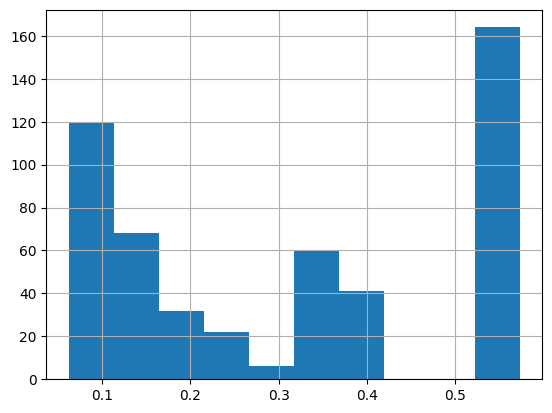

In [ ]:
# Copy of the original data
# Drop the segment_id column for normalization
data_only = signature_df
# Perform row-wise min-max normalization
normalized = data_only.sub(data_only.min(axis=1), axis=0)
normalized = normalized.div(data_only.max(axis=1) - data_only.min(axis=1), axis=0)
# Compute the row-wise mean of the normalized values (single summary value per row)
data_only['signature_score'] = normalized.mean(axis=1)
data_only['signature_score'].hist()

In [ ]:

# Copy of the original data
# Drop the segment_id column for normalization
data_only = signature_df
# Perform row-wise min-max normalization
normalized = data_only.sub(data_only.min(axis=1), axis=0)
normalized = normalized.div(data_only.max(axis=1) - data_only.min(axis=1), axis=0)
# Compute the row-wise mean of the normalized values (single summary value per row)
data_only['signature_score'] = normalized.mean(axis=1)
data_only['signature_score'].hist()
import pandas as pd
import numpy as np

# Step 1: Work on a copy of the data
signature_df = data_only.copy()

# Step 2: Create a new column "signature_id" starting from 1
signature_df = signature_df.reset_index(drop=True)
signature_df['signature_id'] = signature_df.index + 1

# Step 3: Define thresholds from 0.10 to 0.95 with a step of 0.05
thresholds = np.round(np.arange(0.10, 1.00, 0.10), 2)

# Step 4: Prepare the results DataFrame
results = []

# Step 5: Iterate over thresholds and compute true/false anomaly counts
for threshold in thresholds:
    anomaly_list = []

    for i in range(len(signature_df) - 1):
        current_score = signature_df.loc[i, 'signature_score']
        next_score = signature_df.loc[i + 1, 'signature_score']
        similarity = 1 - abs(current_score - next_score)

        if similarity < threshold:
            anomaly_list.append(signature_df.loc[i + 1, 'signature_id'])

    is_anomaly_series = signature_df['signature_id'].isin(anomaly_list)
    true_count = is_anomaly_series.sum()
    false_count = len(is_anomaly_series) - true_count

    results.append({
        'threshold': threshold,
        'True': true_count,
        'False': false_count
    })

results_df = pd.DataFrame(results)
results_df

threshold  True  False
0        0.1     0    513
1        0.2     0    513
2        0.3     0    513
3        0.4     0    513
4        0.5     0    513
5        0.6     2    511
6        0.7     4    509
7        0.8    12    501
8        0.9    34    479

In [ ]:
chunks_df

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0                1.83140          -6.1860         -6.71810     -0.30241   
1                0.64395          -9.7968          0.51660      0.15584   
2                0.62573          -9.9946          0.53778      0.44898   
3                1.05010         -13.7080          0.48135     -0.25603   
4                0.38267          -9.8734         -1.19820      0.33024   
...                  ...              ...              ...          ...   
1349995          1.30160          -6.7753         -7.23200      0.54545   
1349996         -0.13797          -7.9056         -6.39670     -0.47310   
1349997          3.25840          -8.5366         -5.14420      0.52134   
1349998          0.62900          -6.3746         -7.76040      0.45455   
1349999          1.18820          -7.1561         -6.70010      0.49722   

         gyroscope_y  gyroscope_z  activity   subject        drift Segment_ID  
0          -0.234520    -1.058900       0.0  subject8  psedo drift      0.0_0  
1          -0.255160     0.884090       0.0  subject1  psedo drift      0.0_0  
2          -0.714820     0.449900       0.0  subject9  psedo drift      0.0_0  
3          -0.540340    -0.884090       0.0  subject2  psedo drift      0.0_0  
4          -0.437150     0.125740       0.0  subject9  psedo drift      0.0_0  
...              ...          ...       ...       ...          ...        ...  
1349995    -0.181990    -0.903730       4.0  subject7  psedo drift     4.0_21  
1349996    -0.936210    -0.062868       4.0  subject1  psedo drift     4.0_21  
1349997    -0.416510    -0.742630       4.0  subject9  psedo drift     4.0_21  
1349998    -0.071295    -0.901770       4.0  subject9  psedo drift     4.0_21  
1349999    -0.225140    -0.833010       4.0  subject9  psedo drift     4.0_21  

[1350000 rows x 10 columns]

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

# Step 1: Preprocessing
# Assuming your input DataFrame is called `df`

# 1.1 Drop rows with missing values (or fill them if needed)
df=chunks_df
df = df.dropna().reset_index(drop=True)

# 1.2 Optional: Normalize/standardize sensor values (if you want all on the same scale)
from sklearn.preprocessing import StandardScaler

sensor_columns = [col for col in df.columns if col not in ['subject', 'activity','drift','Segment_ID']]
scaler = StandardScaler()
df[sensor_columns] = scaler.fit_transform(df[sensor_columns])

# Step 2: Rolling Feature Extraction

# Define feature functions
def mean(x): return np.mean(x)
def std(x): return np.std(x)
def mad(x): return np.median(np.abs(x - np.median(x)))
def maximum(x): return np.max(x)
def minimum(x): return np.min(x)
def sma(x): return np.sum(np.abs(x))

# Step 3: Apply rolling window and extract features
window_size = 50  # typically 1–2 seconds of data at 25–50Hz sampling

for column in sensor_columns:
    df[f'{column}_mean'] = df[column].rolling(window=window_size).apply(mean, raw=True)
    df[f'{column}_std'] = df[column].rolling(window=window_size).apply(std, raw=True)
    df[f'{column}_mad'] = df[column].rolling(window=window_size).apply(mad, raw=True)
    df[f'{column}_max'] = df[column].rolling(window=window_size).apply(maximum, raw=True)
    df[f'{column}_min'] = df[column].rolling(window=window_size).apply(minimum, raw=True)
    df[f'{column}_sma'] = df[column].rolling(window=window_size).apply(sma, raw=True)

# Step 4: Remove initial rows with NaN due to rolling window
df = df.dropna().reset_index(drop=True)
# Step 1: Load the scaler and model
scaler = joblib.load('/content/drive/My Drive/Early Drift Detection/scaler.pkl')
model1 = load_model("/content/drive/My Drive/Early Drift Detection/pamap2_cnn_model.h5")

# Step 2: Feature list
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']

# Step 3: Prepare input data
X_new = df[features].values
X_new_scaled = scaler.transform(X_new)
X_new_ready = X_new_scaled.reshape(-1, len(features), 1)

# Step 4: Prepare labels (ensure correct shape even if only 1 or 2 classes present)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['activity'].values)
y_true = to_categorical(y_encoded, num_classes=5)  # Force 5-class one-hot encoding

# ⚠️ Step 5: Trigger dummy prediction to initialize the model
_ = model1.predict(np.zeros((1, len(features), 1)))

# Step 6: Now safely evaluate
loss, accuracy = model1.evaluate(X_new_ready, y_true, verbose=1)
print(f"Loss: {loss:.4f} | Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
42186/42186 ━━━━━━━━━━━━━━━━━━━━ 186s 4ms/step - accuracy: 0.0163 - loss: 4.5948
Loss: 5.6645 | Accuracy: 0.0706


**real drift**
---

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy, skew, kurtosis

df = df_real_drift

# Function to compute the signature of one segment  ── unchanged ──
def compute_signature(segment):
    signature = {}
    exclude_cols = {'activity', 'drift', 'subject'}
    feature_cols = [col for col in segment.columns if col.lower() not in exclude_cols]

    for col in feature_cols:
        x = segment[col].values

        if np.isnan(x).all():
            signature[f'{col}_mean'] = np.nan
            signature[f'{col}_var'] = np.nan
            signature[f'{col}_entropy'] = np.nan
            signature[f'{col}_skew'] = np.nan
            signature[f'{col}_kurt'] = np.nan
            continue

        clean_x = x[~np.isnan(x)]
        hist, _ = np.histogram(clean_x, bins=10, density=True)
        hist += 1e-12
        H = entropy(hist, base=2)

        signature[f'{col}_mean'] = np.nanmean(x)
        signature[f'{col}_var'] = np.nanvar(x)
        signature[f'{col}_entropy'] = H
        signature[f'{col}_skew'] = skew(clean_x)
        signature[f'{col}_kurt'] = kurtosis(clean_x)

    return signature

# Parameters
chunk_size  = 5000
signatures  = []
segment_ids = []

# NEW list to collect every complete chunk  ── ***single addition*** ──
chunk_frames = []

# Process by activity  ── original loop logic ──
for activity_label, group in df.groupby('activity'):
    group = group.reset_index(drop=True)
    for i in range(0, len(group), chunk_size):
        chunk = group.iloc[i:i+chunk_size]
        if len(chunk) < chunk_size:
            continue                       # skip incomplete chunks

        # ---- new line to save the chunk ----
        chunk_frames.append(chunk.assign(Segment_ID=f"{activity_label}_{i // chunk_size}",
                                         activity=activity_label))

        sig = compute_signature(chunk)
        sig['activity']   = activity_label
        sig['Segment_ID'] = f"{activity_label}_{i // chunk_size}"
        signatures.append(sig)

# Final DataFrame of signatures  ── unchanged ──
signature_df = pd.DataFrame(signatures).set_index('Segment_ID')

# NEW combined DataFrame with all complete chunks
chunks_df = pd.concat(chunk_frames, ignore_index=True)

In [ ]:
signature_df

accelerometer_x_mean  accelerometer_x_var  \
Segment_ID                                              
0.0_0                  -4.733484            24.290221   
0.0_1                  -4.700360            23.102898   
0.0_2                  -4.683442            23.657720   
0.0_3                  -4.627464            23.262541   
0.0_4                  -4.678475            22.321334   
...                          ...                  ...   
4.0_86                 -8.723192            20.426713   
4.0_87                 -8.760521            21.305362   
4.0_88                 -8.690149            19.543004   
4.0_89                 -8.739661            19.822720   
4.0_90                 -8.815936            20.193394   

            accelerometer_x_entropy  accelerometer_x_skew  \
Segment_ID                                                  
0.0_0                      1.929993             -0.645687   
0.0_1                      1.797729             -0.522412   
0.0_2                      1.672439             -0.539674   
0.0_3                      1.925470             -0.477175   
0.0_4                      1.572266             -0.425440   
...                             ...                   ...   
4.0_86                     1.975369             -0.146672   
4.0_87                     1.602558             -0.502501   
4.0_88                     1.888662             -0.204589   
4.0_89                     1.881312             -0.278608   
4.0_90                     1.633498             -0.339881   

            accelerometer_x_kurt  accelerometer_y_mean  accelerometer_y_var  \
Segment_ID                                                                    
0.0_0                   1.999735              5.204277            87.960621   
0.0_1                   1.551032              5.012134            87.312655   
0.0_2                   2.333270              4.842565            96.179182   
0.0_3                   1.047703              4.931729            86.929379   
0.0_4                   1.707812              5.126692            92.689797   
...                          ...                   ...                  ...   
4.0_86                  2.339474              3.668901            10.029526   
4.0_87                  4.857357              3.646277            10.020812   
4.0_88                  2.833518              3.610081             9.427594   
4.0_89                  2.859274              3.612918             9.972154   
4.0_90                  3.593623              3.685005            10.037047   

            accelerometer_y_entropy  accelerometer_y_skew  \
Segment_ID                                                  
0.0_0                      1.233627              1.032853   
0.0_1                      1.296967              1.314412   
0.0_2                      0.993124              1.685455   
0.0_3                      1.264515              1.379833   
0.0_4                      1.049082              1.196772   
...                             ...                   ...   
4.0_86                     1.750943              0.103727   
4.0_87                     1.674934              0.423422   
4.0_88                     2.017873              0.066006   
4.0_89                     1.867446              0.213272   
4.0_90                     1.612706              0.399313   

            accelerometer_y_kurt  ...  gyroscope_y_var  gyroscope_y_entropy  \
Segment_ID                        ...                                         
0.0_0                  15.132573  ...         0.428169             1.868933   
0.0_1                  21.505697  ...         0.416716             1.887493   
0.0_2                  26.747062  ...         0.428010             1.756851   
0.0_3                  19.716936  ...         0.425181             2.072487   
0.0_4                  17.176588  ...         0.405719             1.779559   
...                          ...  ...              ...                  ...   
4.0_86                

In [ ]:
chunks_df

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0               -3.19652          1.32963         0.180163    -0.810851   
1               -1.58774         12.98870         2.782070    -0.503451   
2               -3.33493         10.48080         0.839991     0.139797   
3                    NaN              NaN              NaN          NaN   
4                4.41126          7.41909         0.466015    -0.360173   
...                  ...              ...              ...          ...   
2359995         -9.54323          3.67102         1.847620     0.688395   
2359996        -13.05710          4.48385         0.560644    -1.826200   
2359997         -8.08572          5.65302        -0.100095    -1.052330   
2359998        -13.00220          2.22528         2.608920     1.213920   
2359999         -9.46359          5.13870         0.573774    -1.410310   

         gyroscope_y  gyroscope_z  activity subject       drift Segment_ID  
0          -0.369657     2.809550       0.0       4  real drift      0.0_0  
1          -0.087713     3.639050       0.0       7  real drift      0.0_0  
2           0.038218    -1.309430       0.0       7  real drift      0.0_0  
3                NaN          NaN       0.0       2  real drift      0.0_0  
4           0.000885     0.367403       0.0       2  real drift      0.0_0  
...              ...          ...       ...     ...         ...        ...  
2359995    -0.268001    -0.881814       4.0       7  real drift     4.0_90  
2359996     1.136840     1.725230       4.0       2  real drift     4.0_90  
2359997     1.932420    -0.613753       4.0       3  real drift     4.0_90  
2359998     0.640664    -1.257570       4.0       4  real drift     4.0_90  
2359999     0.637574     1.371950       4.0       4  real drift     4.0_90  

[2360000 rows x 10 columns]

<Axes: >

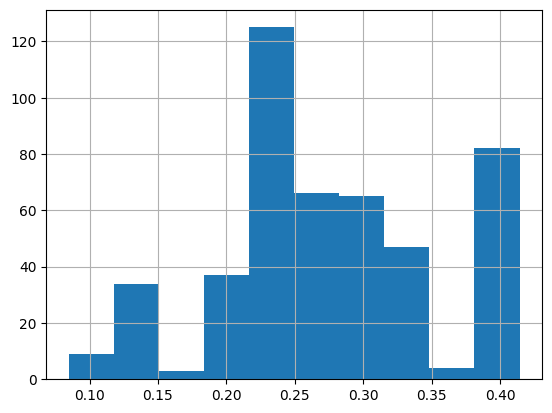

In [ ]:
# Copy of the original data
# Drop the segment_id column for normalization
data_only = signature_df
# Perform row-wise min-max normalization
normalized = data_only.sub(data_only.min(axis=1), axis=0)
normalized = normalized.div(data_only.max(axis=1) - data_only.min(axis=1), axis=0)
# Compute the row-wise mean of the normalized values (single summary value per row)
data_only['signature_score'] = normalized.mean(axis=1)
data_only['signature_score'].hist()

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Work on a copy of the data
signature_df = data_only.copy()

# Step 2: Create a new column "signature_id" starting from 1
signature_df = signature_df.reset_index(drop=True)
signature_df['signature_id'] = signature_df.index + 1

# Step 3: Define thresholds from 0.10 to 0.95 with a step of 0.05
thresholds = np.round(np.arange(0.10, 1.00, 0.10), 2)

# Step 4: Prepare the results DataFrame
results = []

# Step 5: Iterate over thresholds and compute true/false anomaly counts
for threshold in thresholds:
    anomaly_list = []

    for i in range(len(signature_df) - 1):
        current_score = signature_df.loc[i, 'signature_score']
        next_score = signature_df.loc[i + 1, 'signature_score']
        similarity = 1 - abs(current_score - next_score)

        if similarity < threshold:
            anomaly_list.append(signature_df.loc[i + 1, 'signature_id'])

    is_anomaly_series = signature_df['signature_id'].isin(anomaly_list)
    true_count = is_anomaly_series.sum()
    false_count = len(is_anomaly_series) - true_count

    results.append({
        'threshold': threshold,
        'True': true_count,
        'False': false_count
    })

results_df = pd.DataFrame(results)
results_df

threshold  True  False
0        0.1     0    472
1        0.2     0    472
2        0.3     0    472
3        0.4     0    472
4        0.5     0    472
5        0.6     0    472
6        0.7     0    472
7        0.8     7    465
8        0.9    16    456

**pseudo_drift**
---

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy, skew, kurtosis

df = df_pseudo_drift

# Function to compute the signature of one segment  ── unchanged ──
def compute_signature(segment):
    signature = {}
    exclude_cols = {'activity', 'drift', 'subject'}
    feature_cols = [col for col in segment.columns if col.lower() not in exclude_cols]

    for col in feature_cols:
        x = segment[col].values

        if np.isnan(x).all():
            signature[f'{col}_mean'] = np.nan
            signature[f'{col}_var'] = np.nan
            signature[f'{col}_entropy'] = np.nan
            signature[f'{col}_skew'] = np.nan
            signature[f'{col}_kurt'] = np.nan
            continue

        clean_x = x[~np.isnan(x)]
        hist, _ = np.histogram(clean_x, bins=10, density=True)
        hist += 1e-12
        H = entropy(hist, base=2)

        signature[f'{col}_mean'] = np.nanmean(x)
        signature[f'{col}_var'] = np.nanvar(x)
        signature[f'{col}_entropy'] = H
        signature[f'{col}_skew'] = skew(clean_x)
        signature[f'{col}_kurt'] = kurtosis(clean_x)

    return signature

# Parameters
chunk_size  = 5000
signatures  = []
segment_ids = []

# NEW list to collect every complete chunk  ── ***single addition*** ──
chunk_frames = []

# Process by activity  ── original loop logic ──
for activity_label, group in df.groupby('activity'):
    group = group.reset_index(drop=True)
    for i in range(0, len(group), chunk_size):
        chunk = group.iloc[i:i+chunk_size]
        if len(chunk) < chunk_size:
            continue                       # skip incomplete chunks

        # ---- new line to save the chunk ----
        chunk_frames.append(chunk.assign(Segment_ID=f"{activity_label}_{i // chunk_size}",
                                         activity=activity_label))

        sig = compute_signature(chunk)
        sig['activity']   = activity_label
        sig['Segment_ID'] = f"{activity_label}_{i // chunk_size}"
        signatures.append(sig)

# Final DataFrame of signatures  ── unchanged ──
signature_df = pd.DataFrame(signatures).set_index('Segment_ID')

# NEW combined DataFrame with all complete chunks
chunks_df = pd.concat(chunk_frames, ignore_index=True)

In [ ]:
signature_df

accelerometer_x_mean  accelerometer_x_var  \
Segment_ID                                              
0.0_0                   1.362703            12.621036   
0.0_1                   1.294217            14.013921   
0.0_2                   1.402674            14.245890   
0.0_3                   1.407198            14.152791   
0.0_4                   1.398720            14.194574   
...                          ...                  ...   
4.0_17                  1.299301             2.091474   
4.0_18                  1.247518             2.139750   
4.0_19                  1.239046             2.082116   
4.0_20                  1.198532             2.155951   
4.0_21                  1.213324             2.087044   

            accelerometer_x_entropy  accelerometer_x_skew  \
Segment_ID                                                  
0.0_0                      1.424112              0.076289   
0.0_1                      1.425295             -0.636581   
0.0_2                      1.457385             -0.298949   
0.0_3                      1.464172             -0.279200   
0.0_4                      1.470134             -0.133589   
...                             ...                   ...   
4.0_17                     2.218844              0.079206   
4.0_18                     2.174757              0.055945   
4.0_19                     2.221487             -0.009374   
4.0_20                     2.083426             -0.018304   
4.0_21                     2.042645              0.049106   

            accelerometer_x_kurt  accelerometer_y_mean  accelerometer_y_var  \
Segment_ID                                                                    
0.0_0                  11.135889            -10.047852            12.732846   
0.0_1                  12.735331             -9.880692            13.245183   
0.0_2                  11.163997            -10.073400            13.746406   
0.0_3                  11.077262            -10.019074            13.537180   
0.0_4                  11.378267             -9.993086            14.049393   
...                          ...                   ...                  ...   
4.0_17                  0.799309             -8.358149             3.139249   
4.0_18                  1.056265             -8.390123             2.979893   
4.0_19                  0.754898             -8.376079             3.046221   
4.0_20                  0.782913             -8.382885             2.950975   
4.0_21                  1.065966             -8.377767             2.960484   

            accelerometer_y_entropy  accelerometer_y_skew  \
Segment_ID                                                  
0.0_0                      1.585764             -0.258995   
0.0_1                      1.545263              0.094071   
0.0_2                      1.896267             -0.159045   
0.0_3                      1.854947             -0.183641   
0.0_4                      1.540683              0.245817   
...                             ...                   ...   
4.0_17                     2.199943              0.863683   
4.0_18                     1.800757              0.828424   
4.0_19                     2.156831              0.917569   
4.0_20                     2.306255              0.865341   
4.0_21                     2.106533              0.841804   

            accelerometer_y_kurt  ...  gyroscope_y_var  gyroscope_y_entropy  \
Segment_ID                        ...                                         
0.0_0                   3.298320  ...         0.091337             1.236205   
0.0_1                   3.961857  ...         0.103819             1.375503   
0.0_2                   2.555124  ...         0.104870             0.543173   
0.0_3                   2.871589  ...         0.098934             1.348749   
0.0_4                   5.155939  ...         0.095268             1.525004   
...                          ...  ...              ...                  ...   
4.0_17                

In [ ]:
chunks_df

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0                1.83140          -6.1860         -6.71810     -0.30241   
1                0.64395          -9.7968          0.51660      0.15584   
2                0.62573          -9.9946          0.53778      0.44898   
3                1.05010         -13.7080          0.48135     -0.25603   
4                0.38267          -9.8734         -1.19820      0.33024   
...                  ...              ...              ...          ...   
1349995          1.30160          -6.7753         -7.23200      0.54545   
1349996         -0.13797          -7.9056         -6.39670     -0.47310   
1349997          3.25840          -8.5366         -5.14420      0.52134   
1349998          0.62900          -6.3746         -7.76040      0.45455   
1349999          1.18820          -7.1561         -6.70010      0.49722   

         gyroscope_y  gyroscope_z  activity   subject        drift Segment_ID  
0          -0.234520    -1.058900       0.0  subject8  psedo drift      0.0_0  
1          -0.255160     0.884090       0.0  subject1  psedo drift      0.0_0  
2          -0.714820     0.449900       0.0  subject9  psedo drift      0.0_0  
3          -0.540340    -0.884090       0.0  subject2  psedo drift      0.0_0  
4          -0.437150     0.125740       0.0  subject9  psedo drift      0.0_0  
...              ...          ...       ...       ...          ...        ...  
1349995    -0.181990    -0.903730       4.0  subject7  psedo drift     4.0_21  
1349996    -0.936210    -0.062868       4.0  subject1  psedo drift     4.0_21  
1349997    -0.416510    -0.742630       4.0  subject9  psedo drift     4.0_21  
1349998    -0.071295    -0.901770       4.0  subject9  psedo drift     4.0_21  
1349999    -0.225140    -0.833010       4.0  subject9  psedo drift     4.0_21  

[1350000 rows x 10 columns]

<Axes: >

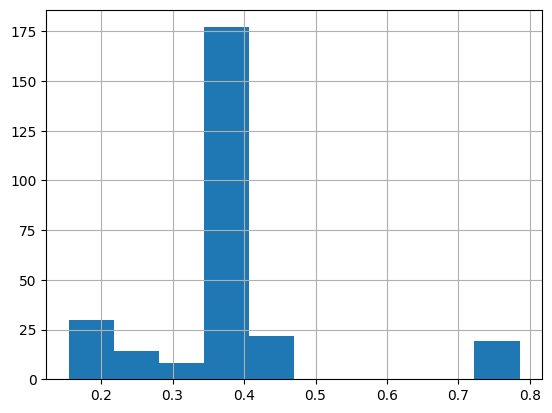

In [ ]:
# Copy of the original data
# Drop the segment_id column for normalization
data_only = signature_df
# Perform row-wise min-max normalization
normalized = data_only.sub(data_only.min(axis=1), axis=0)
normalized = normalized.div(data_only.max(axis=1) - data_only.min(axis=1), axis=0)
# Compute the row-wise mean of the normalized values (single summary value per row)
data_only['signature_score'] = normalized.mean(axis=1)
data_only['signature_score'].hist()

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Work on a copy of the data
signature_df = data_only.copy()

# Step 2: Create a new column "signature_id" starting from 1
signature_df = signature_df.reset_index(drop=True)
signature_df['signature_id'] = signature_df.index + 1

# Step 3: Define thresholds from 0.10 to 0.95 with a step of 0.05
thresholds = np.round(np.arange(0.10, 1.00, 0.10), 2)

# Step 4: Prepare the results DataFrame
results = []

# Step 5: Iterate over thresholds and compute true/false anomaly counts
for threshold in thresholds:
    anomaly_list = []

    for i in range(len(signature_df) - 1):
        current_score = signature_df.loc[i, 'signature_score']
        next_score = signature_df.loc[i + 1, 'signature_score']
        similarity = 1 - abs(current_score - next_score)

        if similarity < threshold:
            anomaly_list.append(signature_df.loc[i + 1, 'signature_id'])

    is_anomaly_series = signature_df['signature_id'].isin(anomaly_list)
    true_count = is_anomaly_series.sum()
    false_count = len(is_anomaly_series) - true_count

    results.append({
        'threshold': threshold,
        'True': true_count,
        'False': false_count
    })

results_df = pd.DataFrame(results)
results_df

threshold  True  False
0        0.1     0    270
1        0.2     0    270
2        0.3     0    270
3        0.4     0    270
4        0.5     0    270
5        0.6     2    268
6        0.7     2    268
7        0.8     4    266
8        0.9    42    228

**No drift**
---

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy, skew, kurtosis

df = df_no_drift

# Function to compute the signature of one segment  ── unchanged ──
def compute_signature(segment):
    signature = {}
    exclude_cols = {'activity', 'drift', 'subject'}
    feature_cols = [col for col in segment.columns if col.lower() not in exclude_cols]

    for col in feature_cols:
        x = segment[col].values

        if np.isnan(x).all():
            signature[f'{col}_mean'] = np.nan
            signature[f'{col}_var'] = np.nan
            signature[f'{col}_entropy'] = np.nan
            signature[f'{col}_skew'] = np.nan
            signature[f'{col}_kurt'] = np.nan
            continue

        clean_x = x[~np.isnan(x)]
        hist, _ = np.histogram(clean_x, bins=10, density=True)
        hist += 1e-12
        H = entropy(hist, base=2)

        signature[f'{col}_mean'] = np.nanmean(x)
        signature[f'{col}_var'] = np.nanvar(x)
        signature[f'{col}_entropy'] = H
        signature[f'{col}_skew'] = skew(clean_x)
        signature[f'{col}_kurt'] = kurtosis(clean_x)

    return signature

# Parameters
chunk_size  = 5000
signatures  = []
segment_ids = []

# NEW list to collect every complete chunk  ── ***single addition*** ──
chunk_frames = []

# Process by activity  ── original loop logic ──
for activity_label, group in df.groupby('activity'):
    group = group.reset_index(drop=True)
    for i in range(0, len(group), chunk_size):
        chunk = group.iloc[i:i+chunk_size]
        if len(chunk) < chunk_size:
            continue                       # skip incomplete chunks

        # ---- new line to save the chunk ----
        chunk_frames.append(chunk.assign(Segment_ID=f"{activity_label}_{i // chunk_size}",
                                         activity=activity_label))

        sig = compute_signature(chunk)
        sig['activity']   = activity_label
        sig['Segment_ID'] = f"{activity_label}_{i // chunk_size}"
        signatures.append(sig)

# Final DataFrame of signatures  ── unchanged ──
signature_df = pd.DataFrame(signatures).set_index('Segment_ID')

# NEW combined DataFrame with all complete chunks
chunks_df = pd.concat(chunk_frames, ignore_index=True)

In [ ]:
signature_df

accelerometer_x_mean  accelerometer_x_var  \
Segment_ID                                              
0.0_0                  -7.148161            14.430627   
0.0_1                  -7.098110            14.704943   
0.0_2                  -7.130637            14.679428   
0.0_3                  -7.112456            14.825508   
0.0_4                  -7.020854            15.732410   
...                          ...                  ...   
4.0_122                -5.136112            17.665060   
4.0_123                -5.324005            19.124760   
4.0_124                -5.123935            16.875253   
4.0_125                -5.137277            18.781849   
4.0_126                -5.111269            16.440570   

            accelerometer_x_entropy  accelerometer_x_skew  \
Segment_ID                                                  
0.0_0                      1.901505              2.173275   
0.0_1                      1.703463              2.098740   
0.0_2                      1.884992              2.173138   
0.0_3                      1.504599              2.173861   
0.0_4                      1.385605              2.080151   
...                             ...                   ...   
4.0_122                    1.436909              0.398664   
4.0_123                    1.268233             -0.659167   
4.0_124                    1.650432             -0.080105   
4.0_125                    1.383177             -0.149877   
4.0_126                    1.388067             -0.008910   

            accelerometer_x_kurt  accelerometer_y_mean  accelerometer_y_var  \
Segment_ID                                                                    
0.0_0                   3.876080              3.217891             9.008322   
0.0_1                   3.486629              3.240921             8.911772   
0.0_2                   3.847127              3.154888             9.042340   
0.0_3                   3.813917              3.172157             8.944481   
0.0_4                   3.332353              3.218320             8.929392   
...                          ...                   ...                  ...   
4.0_122                 7.397339              2.437900            14.139489   
4.0_123                12.603807              2.491051            15.584526   
4.0_124                 3.681683              2.557799            14.985867   
4.0_125                 6.659094              2.570867            13.778676   
4.0_126                 4.675903              2.528595            13.867412   

            accelerometer_y_entropy  accelerometer_y_skew  \
Segment_ID                                                  
0.0_0                      2.052063             -0.660830   
0.0_1                      1.713384             -0.610968   
0.0_2                      1.295976             -0.734347   
0.0_3                      1.673581             -0.781032   
0.0_4                      1.815315             -0.537262   
...                             ...                   ...   
4.0_122                    1.860120              0.041540   
4.0_123                    1.189355              0.065733   
4.0_124                    1.523457             -0.082329   
4.0_125                    1.803900              0.017140   
4.0_126                    1.596222              0.152651   

            accelerometer_y_kurt  ...  gyroscope_y_var  gyroscope_y_entropy  \
Segment_ID                        ...                                         
0.0_0                   2.919741  ...         0.130489             0.434390   
0.0_1                   3.121295  ...         0.103892             0.568756   
0.0_2                   4.223957  ...         0.106644             0.631546   
0.0_3                   3.939765  ...         0.103452             0.441053   
0.0_4                   2.788706  ...         0.111915             0.652653   
...                          ...  ...              ...                  ...   
4.0_122               

In [ ]:
chunks_df

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0               -9.14171          2.98255         1.586540     0.312682   
1               -9.02926          4.43037         2.353090    -0.630493   
2               -8.49230          5.05255         0.280715    -0.023936   
3               -9.44555         -1.02996         2.365270    -0.008385   
4               -9.04580          2.45686         2.282520    -0.131216   
...                  ...              ...              ...          ...   
2564995         -9.93627          3.53819         3.612600    -0.162146   
2564996         -4.93266          1.62946         6.696000    -0.116391   
2564997         -4.40989          7.94847         5.219990     0.513311   
2564998          1.41032          9.80829        10.381200     0.457287   
2564999         -5.66362          3.27003         7.064390    -0.065893   

         gyroscope_y  gyroscope_z  activity subject     drift Segment_ID  
0          -0.153008    -0.029028       0.0       7  No drift      0.0_0  
1           0.250859    -0.273974       0.0       4  No drift      0.0_0  
2           0.002010     0.015031       0.0       2  No drift      0.0_0  
3           0.004846    -0.013085       0.0       8  No drift      0.0_0  
4           0.063209     0.088302       0.0       4  No drift      0.0_0  
...              ...          ...       ...     ...       ...        ...  
2564995     0.348210     0.281766       4.0       8  No drift    4.0_126  
2564996     0.075302     0.272718       4.0       8  No drift    4.0_126  
2564997    -0.207498    -0.340680       4.0       5  No drift    4.0_126  
2564998    -0.034866     0.007592       4.0       7  No drift    4.0_126  
2564999    -0.016733     0.119163       4.0       1  No drift    4.0_126  

[2565000 rows x 10 columns]

<Axes: >

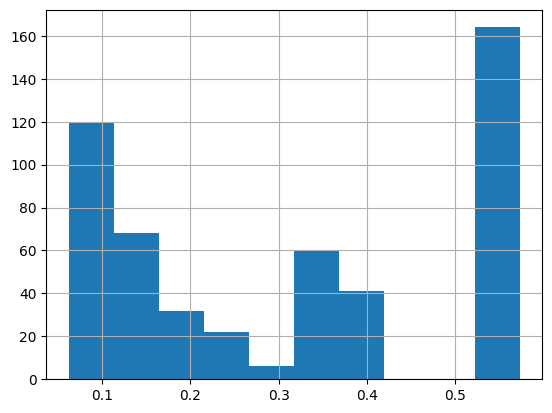

In [ ]:
# Copy of the original data
# Drop the segment_id column for normalization
data_only = signature_df
# Perform row-wise min-max normalization
normalized = data_only.sub(data_only.min(axis=1), axis=0)
normalized = normalized.div(data_only.max(axis=1) - data_only.min(axis=1), axis=0)
# Compute the row-wise mean of the normalized values (single summary value per row)
data_only['signature_score'] = normalized.mean(axis=1)
data_only['signature_score'].hist()

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Work on a copy of the data
signature_df = data_only.copy()

# Step 2: Create a new column "signature_id" starting from 1
signature_df = signature_df.reset_index(drop=True)
signature_df['signature_id'] = signature_df.index + 1

# Step 3: Define thresholds from 0.10 to 0.95 with a step of 0.05
thresholds = np.round(np.arange(0.10, 1.00, 0.10), 2)

# Step 4: Prepare the results DataFrame
results = []

# Step 5: Iterate over thresholds and compute true/false anomaly counts
for threshold in thresholds:
    anomaly_list = []

    for i in range(len(signature_df) - 1):
        current_score = signature_df.loc[i, 'signature_score']
        next_score = signature_df.loc[i + 1, 'signature_score']
        similarity = 1 - abs(current_score - next_score)

        if similarity < threshold:
            anomaly_list.append(signature_df.loc[i + 1, 'signature_id'])

    is_anomaly_series = signature_df['signature_id'].isin(anomaly_list)
    true_count = is_anomaly_series.sum()
    false_count = len(is_anomaly_series) - true_count

    results.append({
        'threshold': threshold,
        'True': true_count,
        'False': false_count
    })

results_df = pd.DataFrame(results)
results_df

threshold  True  False
0        0.1     0    513
1        0.2     0    513
2        0.3     0    513
3        0.4     0    513
4        0.5     0    513
5        0.6     2    511
6        0.7     4    509
7        0.8    12    501
8        0.9    34    479

**Similarly**
---

In [ ]:
# Step 1: Work on a copy of the data
signature_df = data_only.copy()

# Step 2: Create a new column "signature_id" starting from 1
signature_df = signature_df.reset_index(drop=True)
signature_df['signature_id'] = signature_df.index + 1

# Step 3: Define a similarity threshold (80%)
similarity_threshold = 0.10
# Step 4: Initialize anomaly list
anomaly_list = []

# Step 5: Compare each signature_score with the next one
for i in range(len(signature_df) - 1):
    current_score = signature_df.loc[i, 'signature_score']
    next_score = signature_df.loc[i + 1, 'signature_score']

    # Similarity = 1 - absolute difference (since both scores are in [0,1])
    similarity = 1 - abs(current_score - next_score)

    if similarity < similarity_threshold:
        # Add the next signature ID to the anomaly list
        anomaly_list.append(signature_df.loc[i + 1, 'signature_id'])

# Step 6: Add anomaly status to the dataframe
signature_df['is_anomaly'] = signature_df['signature_id'].isin(anomaly_list)
signature_df

accelerometer_x_mean  accelerometer_x_var  accelerometer_x_entropy  \
0                -1.062375            27.876071                 1.797215   
1                -1.089914            27.393587                 2.022411   
2                -1.060224            28.094246                 1.805838   
3                -0.967853            27.937536                 1.792720   
4                -1.075266            29.441276                 1.794561   
...                    ...                  ...                      ...   
1395             -6.122110            26.348231                 1.749761   
1396             -6.213381            25.540470                 1.906695   
1397             -6.198294            25.600821                 1.612395   
1398             -6.201840            25.519509                 1.864752   
1399             -6.119328            25.287686                 1.456486   

      accelerometer_x_skew  accelerometer_x_kurt  accelerometer_y_mean  \
0                -0.471352              2.163306             -5.347823   
1                -0.437854              1.345585             -5.256871   
2                -0.477734              1.852145             -5.413110   
3                -0.409564              1.492420             -5.319514   
4                -0.380601              1.630298             -5.442785   
...                    ...                   ...                   ...   
1395             -0.228322              1.632425              1.829460   
1396             -0.133105              1.104330              1.974349   
1397             -0.256081              2.324536              2.123933   
1398             -0.033108              1.065182              1.908632   
1399              0.091158              3.959024              1.855812   

      accelerometer_y_var  accelerometer_y_entropy  accelerometer_y_skew  \
0               65.829050                 1.299542              0.968032   
1               68.181802                 1.578747              1.344451   
2               68.608083                 1.204574              1.300141   
3               70.671106                 1.438761              1.495969   
4               70.341671                 1.449193              1.376373   
...                   ...                      ...                   ...   
1395            24.624777                 1.478202              0.112467   
1396            25.398747                 1.360984              0.646529   
1397            25.092319                 1.558240              0.472595   
1398            24.808877                 1.441057              0.255971   
1399            26.054351                 1.466612              0.331841   

      accelerometer_y_kurt  ...  gyroscope_y_kurt  gyroscope_z_mean  \
0                 3.652141  ...          4.277155         -0.111538   
1                 6.079656  ...          9.709234         -0.132137   
2                 6.573076  ...          3.352280         -0.136033   
3                 8.464289  ...         11.909224         -0.121059   
4                 8.068313  ...          3.991036         -0.125487   
...                    ...  ...               ...               ...   
1395              6.284857  ...          6.191493          0.012825   
1396             12.162238  ...          6.579203          0.001475   
1397              8.267028  ...          8.101275          0.017101   
1398              8.263178  ...          7.295626         -0.028668   
1399              7.368395  ...          6.945280          0.014253   

      gyroscope_z_var  gyroscope_z_entropy  gyroscope_z_skew  \
0            0.999560             1.527081          0.604546   
1            0.956213             1.555670          0.486118   
2            0.939722             1.566367          0.560844   
3            1.001019             1.615528          0.523584   
4            0.965335             1.448924          0.458399   
...               ...                  ...            

In [ ]:
signature_df['is_anomaly'].value_counts()

is_anomaly
False    1388
True       12
Name: count, dtype: int64

In [ ]:
# Step 1: Initialize list to store windows with high anomaly ratio
high_drift_windows = []

# Step 2: Define parameters
window_size = 5
drift_threshold = 0.2  # 10%

# Step 3: Slide over the dataframe in windows of 5 signature IDs
for start in range(0, len(signature_df), window_size):
    end = start + window_size
    window = signature_df.iloc[start:end]

    # Calculate anomaly ratio in this window
    if len(window) == 0:
        continue  # skip if empty

    anomaly_ratio = window['is_anomaly'].sum() / len(window)

    # If anomaly ratio > 10%, mark the window
    if anomaly_ratio > drift_threshold:
        high_drift_windows.extend(window['signature_id'].tolist())

# Step 4: Output the list of signature IDs with high drift
high_drift_windows

[681,
 682,
 683,
 684,
 685,
 701,
 702,
 703,
 704,
 705,
 1191,
 1192,
 1193,
 1194,
 1195]

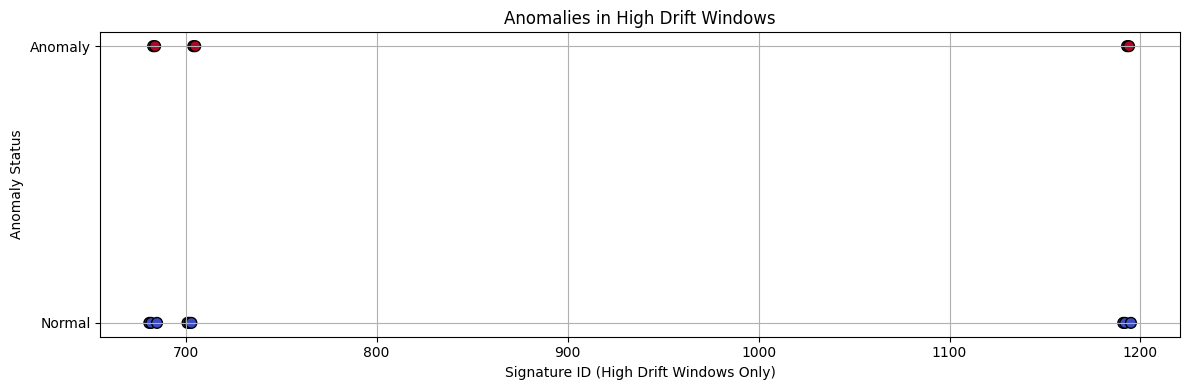

In [ ]:
import matplotlib.pyplot as plt
high_drift_df = signature_df[signature_df['signature_id'].isin(high_drift_windows)]

# Create a binary indicator for anomaly (1 = True, 0 = False)
high_drift_anomaly_binary = high_drift_df['is_anomaly'].astype(int)

# Create the plot for only high-drift windows
plt.figure(figsize=(12, 4))
plt.scatter(high_drift_df['signature_id'], high_drift_anomaly_binary,
            c=high_drift_anomaly_binary, cmap='coolwarm', s=60, edgecolors='k')

plt.yticks([0, 1], ['Normal', 'Anomaly'])
plt.xlabel('Signature ID (High Drift Windows Only)')
plt.ylabel('Anomaly Status')
plt.title('Anomalies in High Drift Windows')
plt.grid(True)
plt.tight_layout()
plt.show()

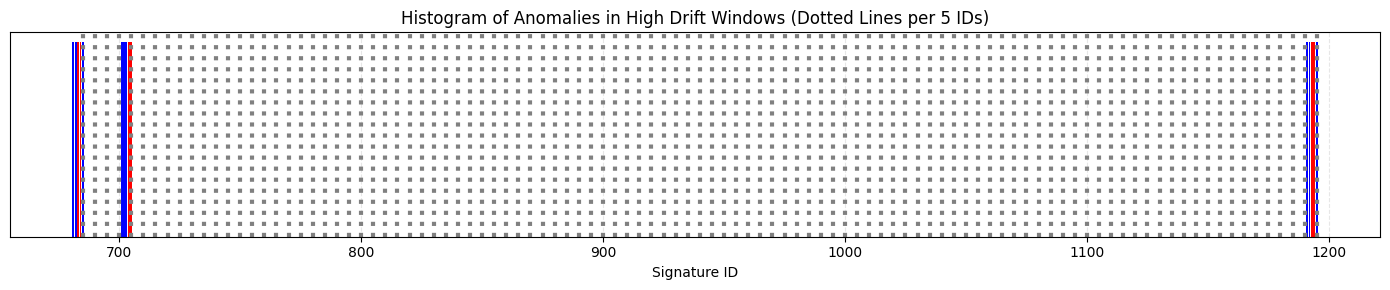

In [ ]:
import matplotlib.pyplot as plt

# Prepare binary anomaly vector (1 = Anomaly, 0 = Normal)
high_drift_df = signature_df[signature_df['signature_id'].isin(high_drift_windows)]
anomaly_flags = high_drift_df['is_anomaly'].astype(int)
x_labels = high_drift_df['signature_id']

# Create histogram-like bar plot
plt.figure(figsize=(14, 3))
colors = ['blue' if flag == 0 else 'red' for flag in anomaly_flags]
plt.bar(x_labels, [1]*len(anomaly_flags), color=colors, width=0.8)

# Add vertical dotted lines for every 5 signature IDs
min_id, max_id = x_labels.min(), x_labels.max()
for x in range(min_id, max_id + 1):
    if x % 5 == 0:
        plt.axvline(x=x, linestyle=':', color='gray', linewidth=3)

# Formatting
plt.xlabel('Signature ID')
plt.title('Histogram of Anomalies in High Drift Windows (Dotted Lines per 5 IDs)')
plt.yticks([])
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
data_only['signature_score'].hist()

In [ ]:
data_only

In [ ]:
# Copy of the original data

# Drop the segment_id column for normalization
data_only = signature_df

# Perform row-wise min-max normalization
normalized = data_only.sub(data_only.min(axis=1), axis=0)
normalized = normalized.div(data_only.max(axis=1) - data_only.min(axis=1), axis=0)

# Compute the row-wise mean of the normalized values (single summary value per row)
data_only['signature_score'] = normalized.mean(axis=1)


TypeError: '<=' not supported between instances of 'float' and 'str'

**New Signature for equal distribution**
---

**OLD code dont run signature**
---

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy, skew, kurtosis

# Use only the first 600,000 samples
df = pamap2_sample.iloc[:min(600000, len(pamap2_sample))].copy()
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle initially

# Track rows already used
used_indices = set()

# Target activity labels (dynamically detect from data)
target_activities = set(df['activity'].unique())

# Function to compute signature
def compute_signature(segment):
    signature = {}
    feature_cols = [col for col in segment.columns if col.lower() != 'activity']

    for col in feature_cols:
        x = segment[col].values
        if np.isnan(x).all():
            signature[f'{col}_mean'] = np.nan
            signature[f'{col}_var'] = np.nan
            signature[f'{col}_entropy'] = np.nan
            signature[f'{col}_skew'] = np.nan
            signature[f'{col}_kurt'] = np.nan
            continue
        clean_x = x[~np.isnan(x)]
        hist, _ = np.histogram(clean_x, bins=10, density=True)
        hist += 1e-12
        H = entropy(hist, base=2)
        signature[f'{col}_mean'] = np.nanmean(x)
        signature[f'{col}_var'] = np.nanvar(x)
        signature[f'{col}_entropy'] = H
        signature[f'{col}_skew'] = skew(clean_x)
        signature[f'{col}_kurt'] = kurtosis(clean_x)

    return signature

# Parameters
chunk_size = 3000
signatures = []
chunk_id = 0

# Keep track of rows remaining
remaining_df = df.copy()

while not remaining_df.empty:
    # Try to create one chunk that contains all activity types
    chunk_rows = []
    used_ids_in_chunk = set()

    for activity in target_activities:
        activity_rows = remaining_df[remaining_df['activity'] == activity]
        if not activity_rows.empty:
            selected = activity_rows.iloc[:chunk_size // len(target_activities)]
            chunk_rows.append(selected)
            used_ids_in_chunk.update(selected.index)

    # Combine collected rows for this chunk
    chunk = pd.concat(chunk_rows).reset_index(drop=True)

    # If chunk is too small, break
    if len(chunk) < chunk_size:
        break

    # Compute signature
    sig = compute_signature(chunk)
    signatures.append(sig)

    # Remove used rows
    remaining_df = remaining_df.drop(index=used_ids_in_chunk)

    chunk_id += 1

# Combine all signature statistics
signature_df = pd.DataFrame(signatures)
signature_df.index.name = 'segment_id'

In [ ]:
signature_df

accelerometer_x_mean  accelerometer_x_var  \
segment_id                                              
0                      -5.730387            41.882248   
1                      -5.702264            38.095951   
2                      -5.575727            38.744228   
3                      -5.631547            36.475723   
4                      -5.566645            37.264125   
...                          ...                  ...   
86                     -5.758888            41.300483   
87                     -5.811607            36.921543   
88                     -5.514970            39.932380   
89                     -5.648630            40.200401   
90                     -5.613404            42.803563   

            accelerometer_x_entropy  accelerometer_x_skew  \
segment_id                                                  
0                          1.544479             -0.873653   
1                          2.098192             -0.397630   
2                          1.953109             -0.475950   
3                          1.914281             -0.256690   
4                          1.885388             -0.191093   
...                             ...                   ...   
86                         1.680738             -0.885124   
87                         1.462106             -0.642742   
88                         1.776482             -0.538393   
89                         1.446483             -1.043949   
90                         1.468040             -1.177520   

            accelerometer_x_kurt  accelerometer_y_mean  accelerometer_y_var  \
segment_id                                                                    
0                       7.024936              5.275496            53.028232   
1                       2.591175              5.289055            51.984839   
2                       3.399939              5.305824            53.684394   
3                       2.308430              5.368139            50.170709   
4                       2.023343              5.252749            50.433576   
...                          ...                   ...                  ...   
86                      6.435262              5.371876            48.653218   
87                      6.941343              5.230219            52.395196   
88                      4.046702              5.326678            51.379522   
89                     10.574570              5.153590            47.140354   
90                     11.471992              5.494095            56.908837   

            accelerometer_y_entropy  accelerometer_y_skew  \
segment_id                                                  
0                          1.233891              2.409673   
1                          1.447552              2.695568   
2                          1.570942              2.742370   
3                          1.465705              2.484283   
4                          1.629923              2.654262   
...                             ...                   ...   
86                         1.480868              2.396607   
87                         1.263752              2.427664   
88                         1.675482              2.494490   
89                         1.484781              2.160082   
90                         1.478950              2.592857   

            accelerometer_y_kurt  ...  gyroscope_y_mean  gyroscope_y_var  \
segment_id                        ...                                      
0                      11.958488  ...          0.036427         1.022031   
1                      12.229255  ...          0.024582         0.993013   
2                      12.838501  ...          0.015615         1.082637   
3                      11.027971  ...          0.005438         1.027471   
4                      11.900975  ...          0.038586         1.067791   
...                          ...  ...               ...              ...   
86                     10.769532  ...         

In [ ]:
remaining_df

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
205007        -11.16150         3.685240         2.015760     0.054441   
205026        -12.27150         2.203380         0.811029     0.892124   
205027        -13.90890         3.036220        -0.832778     1.290040   
205029              NaN              NaN              NaN          NaN   
205035        -10.62350         3.172730         4.565720    -1.477270   
...                 ...              ...              ...          ...   
599995         -9.10527        -6.373760        -0.883029     1.082950   
599996         -9.13546         8.287460         5.032600     5.590760   
599997        -10.27080        -0.529661         2.428200    -1.239050   
599998         -7.31200         2.547360         5.425670     0.029575   
599999         -1.38813         6.836250         6.539090    -0.012235   

        gyroscope_y  gyroscope_z  activity  
205007    -0.016872    -0.801769         0  
205026    -0.899869     3.921010         0  
205027    -2.229680     2.644920         0  
205029          NaN          NaN         0  
205035     0.560239    -2.948960         0  
...             ...          ...       ...  
599995     1.213550    -2.133200         4  
599996    -2.737890     2.151580         1  
599997     1.229770    -0.801816         0  
599998    -0.026806     0.057415         2  
599999     0.044024    -0.015213         2  

[327000 rows x 7 columns]

In [ ]:
chunk['activity'].value_counts()

activity
0    600
1    600
2    600
3    600
4    550
Name: count, dtype: int64

In [ ]:
df_drift_balanced.dtypes

accelerometer_x    float64
accelerometer_y    float64
accelerometer_z    float64
gyroscope_x        float64
gyroscope_y        float64
gyroscope_z        float64
activity             int64
subject             object
drift               object
dtype: object

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy, skew, kurtosis
from collections import Counter

df = df_drift_balanced

# Define the function to compute the signature of one segment
def compute_signature(segment):
    signature = {}
    # Exclude 'activity', 'drift', 'subject' from processing
    exclude_cols = {'activity', 'drift', 'subject'}
    feature_cols = [col for col in segment.columns if col.lower() not in exclude_cols]

    for col in feature_cols:
        x = segment[col].values

        if np.isnan(x).all():
            signature[f'{col}_mean'] = np.nan
            signature[f'{col}_var'] = np.nan
            signature[f'{col}_entropy'] = np.nan
            signature[f'{col}_skew'] = np.nan
            signature[f'{col}_kurt'] = np.nan
            continue

        clean_x = x[~np.isnan(x)]
        hist, _ = np.histogram(clean_x, bins=10, density=True)
        hist += 1e-12  # avoid log(0)
        H = entropy(hist, base=2)

        signature[f'{col}_mean'] = np.nanmean(x)
        signature[f'{col}_var'] = np.nanvar(x)
        signature[f'{col}_entropy'] = H
        signature[f'{col}_skew'] = skew(clean_x)
        signature[f'{col}_kurt'] = kurtosis(clean_x)

    return signature

# Step: Process in chunks of 5000 samples
chunk_size = 5000
signatures = []

for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i+chunk_size].reset_index(drop=True)

    if len(chunk) < chunk_size:
        continue  # Skip incomplete chunk

    sig = compute_signature(chunk)

    # Add majority drift label from the chunk
    drift_counts = Counter(chunk['drift'])
    majority_drift = drift_counts.most_common(1)[0][0]
    sig['drift'] = majority_drift

    sig['segment_id'] = f"seg_{i // chunk_size}"
    signatures.append(sig)

# Combine all signature statistics into a single DataFrame
signature_df = pd.DataFrame(signatures)
signature_df.set_index('segment_id', inplace=True)

In [ ]:
# Re-import required libraries after code execution environment was reset
import pandas as pd
import numpy as np
from scipy.stats import entropy, skew, kurtosis

df = df_drift_balanced

# Take only the first 600000 samples (or limit to available rows)
df = df.iloc[:min(1000000, len(df))]

# Define the function to compute the signature of one segment
def compute_signature(segment):
    signature = {}
    # Exclude 'activity,'timestamp', 'subject' from processing
    exclude_cols = {'activity', 'drift', 'subject'}
    feature_cols = [col for col in segment.columns if col.lower() not in exclude_cols]
    for col in feature_cols:
        x = segment[col].values

        if np.isnan(x).all():
            signature[f'{col}_mean'] = np.nan
            signature[f'{col}_var'] = np.nan
            signature[f'{col}_entropy'] = np.nan
            signature[f'{col}_skew'] = np.nan
            signature[f'{col}_kurt'] = np.nan
            continue

        clean_x = x[~np.isnan(x)]
        hist, _ = np.histogram(clean_x, bins=10, density=True)
        hist += 1e-12  # avoid log(0)
        H = entropy(hist, base=2)

        signature[f'{col}_mean'] = np.nanmean(x)
        signature[f'{col}_var'] = np.nanvar(x)
        signature[f'{col}_entropy'] = H
        signature[f'{col}_skew'] = skew(clean_x)
        signature[f'{col}_kurt'] = kurtosis(clean_x)

    return signature


# Step: Process in chunks of 30000 samples
chunk_dfs = []
signatures = []
chunk_size = 5000
num_chunks = len(df) // chunk_size

for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i+chunk_size].reset_index(drop=True)
    chunk_dfs.append(chunk)
    sig = compute_signature(chunk)
    signatures.append(sig)

# Combine all signature statistics into a single DataFrame
signature_df = pd.DataFrame(signatures)
signature_df.index.name = 'segment_id'

Main Code
---

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy, skew, kurtosis

df = df_drift_balanced
df = df.iloc[:min(1000000, len(df))]

# Function to compute the signature of one segment
def compute_signature(segment):
    signature = {}
    # Exclude 'activity,'timestamp', 'subject' from processing
    exclude_cols = {'activity', 'drift', 'subject'}
    feature_cols = [col for col in segment.columns if col.lower() not in exclude_cols]

    for col in feature_cols:
        x = segment[col].values

        if np.isnan(x).all():
            signature[f'{col}_mean'] = np.nan
            signature[f'{col}_var'] = np.nan
            signature[f'{col}_entropy'] = np.nan
            signature[f'{col}_skew'] = np.nan
            signature[f'{col}_kurt'] = np.nan
            continue

        clean_x = x[~np.isnan(x)]
        hist, _ = np.histogram(clean_x, bins=10, density=True)
        hist += 1e-12
        H = entropy(hist, base=2)

        signature[f'{col}_mean'] = np.nanmean(x)
        signature[f'{col}_var'] = np.nanvar(x)
        signature[f'{col}_entropy'] = H
        signature[f'{col}_skew'] = skew(clean_x)
        signature[f'{col}_kurt'] = kurtosis(clean_x)

    return signature

# Parameters
chunk_size = 5000
signatures = []
segment_ids = []

# Process by activity
for activity_label, group in df.groupby('activity'):
    group = group.reset_index(drop=True)
    for i in range(0, len(group), chunk_size):
        chunk = group.iloc[i:i+chunk_size]
        if len(chunk) < chunk_size:
            continue  # skip incomplete chunks
        sig = compute_signature(chunk)
        sig['activity'] = activity_label
        sig['Segment_ID'] = f"{activity_label}_{i // chunk_size}"
        signatures.append(sig)

# Final DataFrame of signatures
signature_df = pd.DataFrame(signatures)
signature_df.set_index('Segment_ID', inplace=True)

In [ ]:
signature_df['drift'].value_counts()

drift
No drift    1400
Name: count, dtype: int64

In [ ]:
chunk_dfs

[      accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
 0           -9.066940          3.43623          1.47067    -0.013872   
 1           -5.431840          5.31465          6.79155     0.287359   
 2           -3.957250          5.60645          6.77417     0.146078   
 3           -6.290030         -1.01155          2.95130    -0.706611   
 4           -5.556660          2.73734          6.99081    -1.373870   
 ...               ...              ...              ...          ...   
 4995        -3.216690          8.88192          4.58043    -0.868915   
 4996        -3.752530          5.94980          7.16095    -0.291635   
 4997         0.086316          9.07783          3.93647     0.707736   
 4998         5.898700          0.37291          7.58800     0.040816   
 4999        -7.087570          5.51740          2.57094     0.466854   
 
       gyroscope_y  gyroscope_z  activity   subject        drift  
 0        0.044784    -0.016881         0         7    

In [ ]:
signature_df.to_csv("pamap2_signature.csv")

In [ ]:
# Copy of the original data

# Drop the segment_id column for normalization
data_only = signature_df

# Perform row-wise min-max normalization
normalized = data_only.sub(data_only.min(axis=1), axis=0)
normalized = normalized.div(data_only.max(axis=1) - data_only.min(axis=1), axis=0)

# Compute the row-wise mean of the normalized values (single summary value per row)
data_only['signature_score'] = normalized.mean(axis=1)


In [ ]:
data_only

accelerometer_x_mean  accelerometer_x_var  \
Segment_ID                                              
0_0                    -1.587148            29.278998   
0_1                    -1.562209            29.144524   
0_2                    -1.698314            30.158190   
0_3                    -1.724260            28.991735   
0_4                    -1.843775            29.480213   
...                          ...                  ...   
4_35                   -5.468725            21.200758   
4_36                   -5.677742            22.185093   
4_37                   -5.756895            21.366793   
4_38                   -5.515198            22.466318   
4_39                   -5.681996            23.090792   

            accelerometer_x_entropy  accelerometer_x_skew  \
Segment_ID                                                  
0_0                        2.071323             -0.212320   
0_1                        2.110795             -0.196877   
0_2                        1.821857             -0.347990   
0_3                        2.167390             -0.140283   
0_4                        2.110569             -0.226600   
...                             ...                   ...   
4_35                       1.831316             -0.058176   
4_36                       1.826678             -0.430819   
4_37                       1.763905             -0.190198   
4_38                       1.814746             -0.166206   
4_39                       1.695793             -0.272167   

            accelerometer_x_kurt  accelerometer_y_mean  accelerometer_y_var  \
Segment_ID                                                                    
0_0                     0.485393             -4.696551            66.113870   
0_1                     0.488046             -4.533472            66.755461   
0_2                     1.678314             -4.484087            70.019815   
0_3                     0.645189             -4.468959            63.843189   
0_4                     0.282410             -4.394500            67.854398   
...                          ...                   ...                  ...   
4_35                    1.900474              2.157317            20.132807   
4_36                    2.347090              2.012254            20.410027   
4_37                    2.405742              2.190306            20.654718   
4_38                    2.993489              2.061743            20.192857   
4_39                    2.553013              2.107339            19.959071   

            accelerometer_y_entropy  accelerometer_y_skew  \
Segment_ID                                                  
0_0                        1.320373              1.163342   
0_1                        1.344255              0.734450   
0_2                        1.293705              1.058501   
0_3                        1.846172              0.645066   
0_4                        1.591189              0.862376   
...                             ...                   ...   
4_35                       1.654988             -0.539359   
4_36                       1.830697             -0.606089   
4_37                       1.818994             -0.581984   
4_38                       1.535098             -0.641398   
4_39                       1.808713             -0.567659   

            accelerometer_y_kurt  ...  gyroscope_y_entropy  gyroscope_y_skew  \
Segment_ID                        ...                                          
0_0                     7.478125  ...             1.595073          1.050726   
0_1                     3.016754  ...             1.218224          0.594839   
0_2                     7.045190  ...             1.744019          0.827347   
0_3                     0.932741  ...             0.658780          0.138827   
0_4                     3.328960  ...             1.433072          1.472177   
...                          ...  ...                  ...               ...   
4_35          

<Axes: >

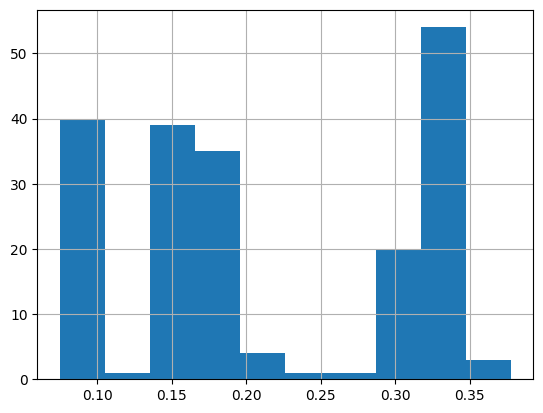

In [ ]:
data_only['signature_score'].hist()

**Label data and evaluate the model**
---

**Load The Model**

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model("/content/drive/My Drive/Early Drift Detection/pamap2_cnn_model.h5")

In [ ]:
# Group size (e.g., 5 segments per group)
group_size = 5

# Step 1: Group high drift indices
grouped_indices = [high_drift_windows[i:i + group_size] for i in range(0, len(high_drift_windows), group_size)]

# Step 2: Create dynamically named DataFrames like df_chunk_1, df_chunk_2, ...
for idx, group in enumerate(grouped_indices):
    selected_chunks = [chunk_dfs[i] for i in group if i < len(chunk_dfs)]
    combined_df = pd.concat(selected_chunks, ignore_index=True)

    # Dynamically create variable name like df_chunk_1, df_chunk_2, ...
    globals()[f'df_chunk_{idx + 1}'] = combined_df

In [ ]:
len(high_drift_windows)

15

In [ ]:
df_chunk_6

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
0            -7.756820         5.373910         2.907790    -0.013730   
1            -8.711010        -6.184420        -4.803470     0.970844   
2           -11.068200         1.643990         2.947750    -0.388899   
3           -26.762400        51.103700         4.200760     4.354530   
4            -9.041000         3.139760         2.280290     0.150080   
...                ...              ...              ...          ...   
24995        -0.790258         9.489510         2.536410     0.023624   
24996       -10.381500         0.427241        -0.963577     0.334158   
24997        -0.264820         8.330020         4.857430    -0.028547   
24998       -10.420600         2.445440         4.032390     1.828140   
24999        -3.685650         3.702790         6.284320     0.482296   

       gyroscope_y  gyroscope_z  activity  
0         0.028186    -0.012401         1  
1         1.269440    -0.537706         4  
2        -0.230260     0.613588         0  
3        -3.603800    -5.507320         4  
4         0.014785    -0.116815         1  
...            ...          ...       ...  
24995    -0.023036    -0.013567         2  
24996    -3.557610    -5.985330         4  
24997     0.000647    -0.000950         2  
24998     0.293243    -3.368970         0  
24999    -0.040205    -0.289727         3  

[25000 rows x 7 columns]

In [ ]:
combined_df=df_chunk_4

In [ ]:
combined_df['activity'].value_counts()

activity
3    5075
0    5042
1    5022
4    4979
2    4882
Name: count, dtype: int64

**Expert with truth gound truth**
---

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Preprocessing
# Assuming your input DataFrame is called `df`

# 1.1 Drop rows with missing values (or fill them if needed)
df=combined_df
df = df.dropna().reset_index(drop=True)

# 1.2 Optional: Normalize/standardize sensor values (if you want all on the same scale)
from sklearn.preprocessing import StandardScaler

sensor_columns = [col for col in df.columns if col not in ['subject', 'activity']]
scaler = StandardScaler()
df[sensor_columns] = scaler.fit_transform(df[sensor_columns])

# Step 2: Rolling Feature Extraction

# Define feature functions
def mean(x): return np.mean(x)
def std(x): return np.std(x)
def mad(x): return np.median(np.abs(x - np.median(x)))
def maximum(x): return np.max(x)
def minimum(x): return np.min(x)
def sma(x): return np.sum(np.abs(x))

# Step 3: Apply rolling window and extract features
window_size = 50  # typically 1–2 seconds of data at 25–50Hz sampling

for column in sensor_columns:
    df[f'{column}_mean'] = df[column].rolling(window=window_size).apply(mean, raw=True)
    df[f'{column}_std'] = df[column].rolling(window=window_size).apply(std, raw=True)
    df[f'{column}_mad'] = df[column].rolling(window=window_size).apply(mad, raw=True)
    df[f'{column}_max'] = df[column].rolling(window=window_size).apply(maximum, raw=True)
    df[f'{column}_min'] = df[column].rolling(window=window_size).apply(minimum, raw=True)
    df[f'{column}_sma'] = df[column].rolling(window=window_size).apply(sma, raw=True)

# Step 4: Remove initial rows with NaN due to rolling window
df = df.dropna().reset_index(drop=True)


import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

# Step 1: Load the scaler and model
scaler = joblib.load('/content/drive/My Drive/Early Drift Detection/scaler.pkl')
model1 = load_model("/content/drive/My Drive/Early Drift Detection/pamap2_cnn_model.h5")

# Step 2: Feature list
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']

# Step 3: Prepare input data
X_new = df[features].values
X_new_scaled = scaler.transform(X_new)
X_new_ready = X_new_scaled.reshape(-1, len(features), 1)

# Step 4: Prepare labels (ensure correct shape even if only 1 or 2 classes present)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['activity'].values)
y_true = to_categorical(y_encoded, num_classes=5)  # Force 5-class one-hot encoding

# ⚠️ Step 5: Trigger dummy prediction to initialize the model
_ = model1.predict(np.zeros((1, len(features), 1)))

# Step 6: Now safely evaluate
loss, accuracy = model1.evaluate(X_new_ready, y_true, verbose=1)
print(f"Loss: {loss:.4f} | Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
773/773 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2012 - loss: 8.5147
Loss: 8.6246 | Accuracy: 0.1987


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Load scaler and model
scaler = joblib.load('/content/drive/My Drive/Early Drift Detection/scaler.pkl')
model1 = load_model("/content/drive/My Drive/Early Drift Detection/pamap2_cnn_model.h5")
_ = model1.predict(np.zeros((1, 42, 1)))  # warm-up

# Feature list used by model
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']

# Rolling window stats
def mean(x): return np.mean(x)
def std(x): return np.std(x)
def mad(x): return np.median(np.abs(x - np.median(x)))
def maximum(x): return np.max(x)
def minimum(x): return np.min(x)
def sma(x): return np.sum(np.abs(x))

# Drift windows to evaluate
high_drift_windows = [55,66, 67, 68, 69, 70, 126, 127, 128, 129, 130, 156, 157, 158, 159, 160]

# Store accuracy per drifted chunk
accuracies = {}

for i in high_drift_windows:
    print(f"Processing drift chunk {i}...")
    try:
        df = chunk_dfs[i].copy()
    except IndexError:
        print(f"chunk_dfs[{i}] does not exist. Skipping.")
        accuracies[f'chunk_{i}'] = None
        continue

    # Drop NaNs
    df = df.dropna().reset_index(drop=True)

    # Identify sensor columns
    sensor_columns = [col for col in df.columns if col not in ['subject', 'activity']]

    # Standardize (temp scaler for rolling)
    scaler_temp = StandardScaler()
    df[sensor_columns] = scaler_temp.fit_transform(df[sensor_columns])

    # Rolling features
    window_size = 50
    for column in sensor_columns:
        df[f'{column}_mean'] = df[column].rolling(window=window_size).apply(mean, raw=True)
        df[f'{column}_std'] = df[column].rolling(window=window_size).apply(std, raw=True)
        df[f'{column}_mad'] = df[column].rolling(window=window_size).apply(mad, raw=True)
        df[f'{column}_max'] = df[column].rolling(window=window_size).apply(maximum, raw=True)
        df[f'{column}_min'] = df[column].rolling(window=window_size).apply(minimum, raw=True)
        df[f'{column}_sma'] = df[column].rolling(window=window_size).apply(sma, raw=True)

    df = df.dropna().reset_index(drop=True)

    if len(df) < 10:
        print(f"chunk_{i}: Not enough data after rolling window. Skipping.")
        accuracies[f'chunk_{i}'] = None
        continue

    # Prepare model input
    X = df[features].values
    X_scaled = scaler.transform(X)
    X_ready = X_scaled.reshape(-1, len(features), 1)

    # Prepare true labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(df['activity'].values)
    y_true = to_categorical(y_encoded, num_classes=5)

    # Evaluate
    loss, acc = model1.evaluate(X_ready, y_true, verbose=0)
    accuracies[f'chunk_{i}'] = acc
    print(f"chunk_{i} Accuracy: {acc:.4f}")

# Final summary
print("\n=== Drift Chunk Accuracy Summary ===")
for name, acc in accuracies.items():
    print(f"{name}: {'Skipped' if acc is None else f'{acc:.4f}'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Processing drift chunk 55...
chunk_55 Accuracy: 0.2028
Processing drift chunk 66...
chunk_66 Accuracy: 0.1981
Processing drift chunk 67...
chunk_67 Accuracy: 0.2001
Processing drift chunk 68...
chunk_68 Accuracy: 0.2004
Processing drift chunk 69...
chunk_69 Accuracy: 0.2035
Processing drift chunk 70...
chunk_70 Accuracy: 0.2073
Processing drift chunk 126...
chunk_126 Accuracy: 0.2057
Processing drift chunk 127...
chunk_127 Accuracy: 0.2005
Processing drift chunk 128...
chunk_128 Accuracy: 0.1956
Processing drift chunk 129...
chunk_129 Accuracy: 0.1967
Processing drift chunk 130...
chunk_130 Accuracy: 0.1948
Processing drift chunk 156...
chunk_156 Accuracy: 0.2022
Processing drift chunk 157...
chunk_157 Accuracy: 0.2112
Processing drift chunk 158...
chunk_158 Accuracy: 0.2059
Processing drift chunk 159...
chunk_159 Accuracy: 0.2046
Processing drift chunk 160...
chunk_160 Accuracy: 0.2077

=== Drift Chunk Accuracy Summary ===
chunk_55: 0.2028
chunk_

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Load scaler and model
scaler = joblib.load('/content/drive/My Drive/Early Drift Detection/scaler.pkl')
model1 = load_model("/content/drive/My Drive/Early Drift Detection/pamap2_cnn_model.h5")
_ = model1.predict(np.zeros((1, 42, 1)))  # warm-up

# Feature list used by model
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']

# Rolling window stats
def mean(x): return np.mean(x)
def std(x): return np.std(x)
def mad(x): return np.median(np.abs(x - np.median(x)))
def maximum(x): return np.max(x)
def minimum(x): return np.min(x)
def sma(x): return np.sum(np.abs(x))

# Drift windows to evaluate
high_drift_windows = [55, 66, 67, 68, 69, 70, 126, 127, 128, 129, 130, 156, 157, 158, 159, 160]

# Store accuracy and reports
accuracies = {}
reports = {}

for i in high_drift_windows:
    print(f"\nProcessing drift chunk {i}...")
    try:
        df = chunk_dfs[i].copy()
    except IndexError:
        print(f"chunk_dfs[{i}] does not exist. Skipping.")
        accuracies[f'chunk_{i}'] = None
        reports[f'chunk_{i}'] = "Skipped"
        continue

    df = df.dropna().reset_index(drop=True)
    sensor_columns = [col for col in df.columns if col not in ['subject', 'activity']]

    # Standardize
    scaler_temp = StandardScaler()
    df[sensor_columns] = scaler_temp.fit_transform(df[sensor_columns])

    # Rolling features
    window_size = 50
    for column in sensor_columns:
        df[f'{column}_mean'] = df[column].rolling(window=window_size).apply(mean, raw=True)
        df[f'{column}_std'] = df[column].rolling(window=window_size).apply(std, raw=True)
        df[f'{column}_mad'] = df[column].rolling(window=window_size).apply(mad, raw=True)
        df[f'{column}_max'] = df[column].rolling(window=window_size).apply(maximum, raw=True)
        df[f'{column}_min'] = df[column].rolling(window=window_size).apply(minimum, raw=True)
        df[f'{column}_sma'] = df[column].rolling(window=window_size).apply(sma, raw=True)

    df = df.dropna().reset_index(drop=True)

    if len(df) < 10:
        print(f"chunk_{i}: Not enough data after rolling window. Skipping.")
        accuracies[f'chunk_{i}'] = None
        reports[f'chunk_{i}'] = "Skipped"
        continue

    # Model input
    X = df[features].values
    X_scaled = scaler.transform(X)
    X_ready = X_scaled.reshape(-1, len(features), 1)

    # Prepare labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(df['activity'].values)
    num_classes = len(np.unique(y_encoded))
    y_true_cat = to_categorical(y_encoded, num_classes=num_classes)

    # Evaluate
    loss, acc = model1.evaluate(X_ready, y_true_cat, verbose=0)
    accuracies[f'chunk_{i}'] = acc
    print(f"chunk_{i} Accuracy: {acc:.4f}")
    y_pred_prob = model1.predict(X_ready)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = df['activity'].values.astype(int)

    # Predict for classification report
    #y_pred_prob = model1.predict(X_ready)
    #y_pred = np.argmax(y_pred_prob, axis=1)
    #y_true = np.argmax(y_true_cat, axis=1)

    report = classification_report(y_true, y_pred, labels=np.unique(y_true), zero_division=0)
    reports[f'chunk_{i}'] = report
    print("Classification Report:\n", report)

# Final summary
print("\n=== Drift Chunk Accuracy Summary ===")
for name, acc in accuracies.items():
    print(f"{name}: {'Skipped' if acc is None else f'{acc:.4f}'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step

Processing drift chunk 55...
chunk_55 Accuracy: 0.2028
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       947
           1       0.13      0.02      0.04      1012
           2       0.21      0.99      0.34       987
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       959

    accuracy                           0.20      4915
   macro avg       0.07      0.20      0.08      4915
weighted avg       0.07      0.20      0.08      4915


Processing drift chunk 66...
chunk_66 Accuracy: 0.1981
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.01      0.02       953
           1       0.09      0.01      0.03      1014
           2       0.20      0.98      0.33       965
           3 

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Load scaler and model once
scaler = joblib.load('/content/drive/My Drive/Early Drift Detection/scaler.pkl')
model1 = load_model("/content/drive/My Drive/Early Drift Detection/pamap2_cnn_model.h5")

# Warm up the model
_ = model1.predict(np.zeros((1, 42, 1)))  # Adjust if number of features is different

# Final feature list (must match training time)
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']

# Define rolling functions
def mean(x): return np.mean(x)
def std(x): return np.std(x)
def mad(x): return np.median(np.abs(x - np.median(x)))
def maximum(x): return np.max(x)
def minimum(x): return np.min(x)
def sma(x): return np.sum(np.abs(x))

# Save results
accuracies = {}

# Loop through all chunks
for i in range(1, 15):  # Assuming df_chunk_1 to df_chunk_14
    print(f"Processing df_chunk_{i}...")
    df = globals()[f'df_chunk_{i}'].copy()

    # Drop NaNs
    df = df.dropna().reset_index(drop=True)

    # Identify sensor columns (exclude 'activity')
    sensor_columns = [col for col in df.columns if col not in ['subject', 'activity']]

    # Standardize sensor columns
    scaler_temp = StandardScaler()
    df[sensor_columns] = scaler_temp.fit_transform(df[sensor_columns])

    # Rolling feature extraction
    window_size = 50
    for column in sensor_columns:
        df[f'{column}_mean'] = df[column].rolling(window=window_size).apply(mean, raw=True)
        df[f'{column}_std'] = df[column].rolling(window=window_size).apply(std, raw=True)
        df[f'{column}_mad'] = df[column].rolling(window=window_size).apply(mad, raw=True)
        df[f'{column}_max'] = df[column].rolling(window=window_size).apply(maximum, raw=True)
        df[f'{column}_min'] = df[column].rolling(window=window_size).apply(minimum, raw=True)
        df[f'{column}_sma'] = df[column].rolling(window=window_size).apply(sma, raw=True)

    df = df.dropna().reset_index(drop=True)

    # Skip if not enough data after preprocessing
    if len(df) < 10:
        accuracies[f'df_chunk_{i}'] = None
        print(f"df_chunk_{i}: Not enough data after rolling window. Skipping.")
        continue

    # Prepare input for model
    X_new = df[features].values
    X_new_scaled = scaler.transform(X_new)
    X_new_ready = X_new_scaled.reshape(-1, len(features), 1)

    # Prepare labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(df['activity'].values)
    y_true = to_categorical(y_encoded, num_classes=5)

    # Evaluate
    loss, acc = model1.evaluate(X_new_ready, y_true, verbose=0)
    accuracies[f'df_chunk_{i}'] = acc
    print(f"df_chunk_{i} Accuracy: {acc:.4f}")

# Summary
print("\n=== Accuracy Summary ===")
for name, acc in accuracies.items():
    print(f"{name}: {'Skipped' if acc is None else f'{acc:.4f}'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Processing df_chunk_1...
df_chunk_1 Accuracy: 0.2108
Processing df_chunk_2...
df_chunk_2 Accuracy: 0.2023
Processing df_chunk_3...
df_chunk_3 Accuracy: 0.2097
Processing df_chunk_4...
df_chunk_4 Accuracy: 0.1987
Processing df_chunk_5...
df_chunk_5 Accuracy: 0.2012
Processing df_chunk_6...
df_chunk_6 Accuracy: 0.2065
Processing df_chunk_7...


KeyError: 'df_chunk_7'

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

# Step 1: Load the scaler and model
scaler = joblib.load('/content/drive/My Drive/Early Drift Detection/scaler.pkl')
model1 = load_model("/content/drive/My Drive/Early Drift Detection/pamap2_cnn_model.h5")

# Step 2: Feature list
features = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z', 'gyroscope_x',
       'gyroscope_y', 'gyroscope_z', 'accelerometer_x_mean',
       'accelerometer_x_std', 'accelerometer_x_mad', 'accelerometer_x_max',
       'accelerometer_x_min', 'accelerometer_x_sma', 'accelerometer_y_mean',
       'accelerometer_y_std', 'accelerometer_y_mad', 'accelerometer_y_max',
       'accelerometer_y_min', 'accelerometer_y_sma', 'accelerometer_z_mean',
       'accelerometer_z_std', 'accelerometer_z_mad', 'accelerometer_z_max',
       'accelerometer_z_min', 'accelerometer_z_sma', 'gyroscope_x_mean',
       'gyroscope_x_std', 'gyroscope_x_mad', 'gyroscope_x_max',
       'gyroscope_x_min', 'gyroscope_x_sma', 'gyroscope_y_mean',
       'gyroscope_y_std', 'gyroscope_y_mad', 'gyroscope_y_max',
       'gyroscope_y_min', 'gyroscope_y_sma', 'gyroscope_z_mean',
       'gyroscope_z_std', 'gyroscope_z_mad', 'gyroscope_z_max',
       'gyroscope_z_min', 'gyroscope_z_sma']

# Step 3: Prepare input data
X_new = df[features].values
X_new_scaled = scaler.transform(X_new)
X_new_ready = X_new_scaled.reshape(-1, len(features), 1)

# Step 4: Prepare labels (ensure correct shape even if only 1 or 2 classes present)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['activity'].values)
y_true = to_categorical(y_encoded, num_classes=5)  # Force 5-class one-hot encoding

# ⚠️ Step 5: Trigger dummy prediction to initialize the model
_ = model1.predict(np.zeros((1, len(features), 1)))

# Step 6: Now safely evaluate
loss, accuracy = model1.evaluate(X_new_ready, y_true, verbose=1)
print(f"Loss: {loss:.4f} | Accuracy: {accuracy:.4f}")

In [ ]:
# Predict class probabilities
pred_probs = model1.predict(X_new_ready)
# Convert probabilities to predicted class labels
pred_labels = np.argmax(pred_probs, axis=1)

In [ ]:
pred_labels

In [ ]:
len(pred_classes)

In [ ]:
df['predicted_label'] =pred_labels

In [ ]:
df['predicted_label'].value_counts()

In [ ]:
df['activity'].value_counts()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# Step 1: Extract ground truth and predictions
y_true = df['activity']         # or whatever your column name is
y_pred = df['predicted_label']
# Print classification report
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n")
print(report)

In [ ]:
#without ground truth, you are detecting the change, if it exceeds the threshold(90 - 90)
#without ground truth, you are detecting the change, if it exceeds the threshold(90 - 0.4)
#without ground truth, you are detecting the change, if it exceeds the threshold(90 - 0.6)
#without ground truth, you are detecting the change, if it exceeds the threshold(90 - 0.7)
#without ground truth, you are detecting the change, if it exceeds the threshold(90 - 10)
#without ground truth, you are detecting the change, if it exceeds the threshold(90 - 70)